In [1]:
import pandas as pd
import numpy as np
import sys
import re
import matplotlib.pyplot as plt



In [2]:
skillType=pd.read_csv("/Users/yanan/Desktop/vqaPredict2/vizwiz/vizwiz_skill_typ_train.csv",engine="python")

skillType.head(3)

,qid,IMG,QSN,ANS_TYP,TXT,OBJ,COL,CNT,OTH,ANS1,ANS2,ANS3,ANS4,ANS5,ANS6,ANS7,ANS8,ANS9,ANS10
0,VizWiz_train_000000000000.jpg,VizWiz_train_000000000000.jpg,What's the name of this product?,other,1,1,0,0,0,basil leaves,basil leaves,basil,basil,basil leaves,basil leaves,basil leaves,basil leaves,basil leaves,basil
1,VizWiz_train_000000000001.jpg,VizWiz_train_000000000001.jpg,Can you tell me what is in this can please?,other,1,1,0,0,0,soda,coca cola,coca cola,unsuitable,unsuitable,coke 0,coca cola 0,coke 0,coca cola,coke
2,VizWiz_train_000000000002.jpg,VizWiz_train_000000000002.jpg,Is this enchilada sauce or is this tomatoes? ...,other,1,1,0,0,0,these tomatoes not enchilada sauce,tomatoes,tomatoes,tomatoes,tomatoes,crushed tomatoes,crushed tomatoes,tomatoes,tomatoes,tomatoes


In [3]:
textRecognition1=pd.read_csv("/Users/yanan/Desktop/vqaPredict2/vizwiz/vizwiz_train_text_recognition_1.csv", delimiter=";", engine="python",
                       error_bad_lines=False)
textRecognition2=pd.read_csv("/Users/yanan/Desktop/vqaPredict2/vizwiz/vizwiz_train_text_recognition_2.csv", delimiter=";", engine="python",
                       error_bad_lines=False)
textRecognition3=pd.read_csv("/Users/yanan/Desktop/vqaPredict2/vizwiz/vizwiz_train_text_recognition_3.csv", delimiter=";", engine="python",
                       error_bad_lines=False)
textRecognition=textRecognition1.append(textRecognition2,ignore_index=True)
textRecognition=textRecognition.append(textRecognition3,ignore_index=True)
print(len(textRecognition))
textRecognition.rename(columns={'handwritten_text,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,':'handwritten_text'}, inplace = True)
for i in range(0,len(textRecognition)):
    print(i)
    if textRecognition.loc[i,'handwritten_text']==None:
        textRecognition.loc[i,'handwritten_text']=""
    textRecognition.loc[i,'handwritten_text']=textRecognition.loc[i,'handwritten_text'].replace(',,', '')
    textRecognition.loc[i,'handwritten_text']=textRecognition.loc[i,'handwritten_text'].replace('],', ']')
textRecognition.head(3)

Skipping line 2150: ';' expected after '"'
Skipping line 42: Expected 4 fields in line 42, saw 7
Skipping line 60: Expected 4 fields in line 60, saw 8
Skipping line 157: Expected 4 fields in line 157, saw 5
Skipping line 207: Expected 4 fields in line 207, saw 6
Skipping line 210: Expected 4 fields in line 210, saw 5
Skipping line 275: Expected 4 fields in line 275, saw 5
Skipping line 293: Expected 4 fields in line 293, saw 5
Skipping line 341: Expected 4 fields in line 341, saw 7
Skipping line 357: Expected 4 fields in line 357, saw 5
Skipping line 376: Expected 4 fields in line 376, saw 5
Skipping line 469: Expected 4 fields in line 469, saw 6
Skipping line 478: Expected 4 fields in line 478, saw 5
Skipping line 494: Expected 4 fields in line 494, saw 5
Skipping line 496: Expected 4 fields in line 496, saw 6
Skipping line 504: Expected 4 fields in line 504, saw 5
Skipping line 512: Expected 4 fields in line 512, saw 5
Skipping line 523: Expected 4 fields in line 523, saw 6
Skipping 

7739
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
2

1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077
2078
2079
2080
2081
2082
2083
2084
2085
2086
2087
2088
2089
2090
2091
2092
2093
2094
2095
2096
2097
2098
2099
2100
2101
2102
2103
2104
2105
2106
2107
2108
2109
2110
2111
2112
2113
2114


3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705
3706
3707
3708
3709
3710
3711
3712
3713
3714
3715
3716
3717
3718
3719
3720
3721
3722
3723
3724
3725
3726
3727
3728
3729
3730
3731
3732
3733
3734
3735
3736
3737
3738
3739
3740
3741
3742
3743
3744
3745
3746
3747
3748
3749
3750
3751
3752
3753
3754
3755
3756
3757
3758
3759
3760
3761
3762
3763
3764
3765
3766
3767
3768
3769
3770
3771
3772
3773
3774
3775
3776
3777
3778
3779
3780
3781
3782
3783
3784
3785
3786
3787
3788
3789
3790
3791
3792
3793
3794
3795
3796
3797
3798
3799
3800
3801
3802
3803
3804
3805
3806
3807
3808
3809
3810
3811
3812
3813
3814
3815
3816
3817
3818
3819
3820
3821


5283
5284
5285
5286
5287
5288
5289
5290
5291
5292
5293
5294
5295
5296
5297
5298
5299
5300
5301
5302
5303
5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338
5339
5340
5341
5342
5343
5344
5345
5346
5347
5348
5349
5350
5351
5352
5353
5354
5355
5356
5357
5358
5359
5360
5361
5362
5363
5364
5365
5366
5367
5368
5369
5370
5371
5372
5373
5374
5375
5376
5377
5378
5379
5380
5381
5382
5383
5384
5385
5386
5387
5388
5389
5390
5391
5392
5393
5394
5395
5396
5397
5398
5399
5400
5401
5402
5403
5404
5405
5406
5407
5408
5409
5410
5411
5412
5413
5414
5415
5416
5417
5418
5419
5420
5421
5422
5423
5424
5425
5426
5427
5428
5429
5430
5431
5432
5433
5434
5435
5436
5437
5438
5439
5440
5441
5442
5443
5444
5445
5446
5447
5448
5449
5450
5451
5452
5453
5454
5455
5456
5457
5458
5459
5460
5461
5462
5463
5464
5465
5466
5467
5468
5469
5470
5471
5472
5473
5474
5475
5476
5477
5478
5479
5480
5481
5482


6956
6957
6958
6959
6960
6961
6962
6963
6964
6965
6966
6967
6968
6969
6970
6971
6972
6973
6974
6975
6976
6977
6978
6979
6980
6981
6982
6983
6984
6985
6986
6987
6988
6989
6990
6991
6992
6993
6994
6995
6996
6997
6998
6999
7000
7001
7002
7003
7004
7005
7006
7007
7008
7009
7010
7011
7012
7013
7014
7015
7016
7017
7018
7019
7020
7021
7022
7023
7024
7025
7026
7027
7028
7029
7030
7031
7032
7033
7034
7035
7036
7037
7038
7039
7040
7041
7042
7043
7044
7045
7046
7047
7048
7049
7050
7051
7052
7053
7054
7055
7056
7057
7058
7059
7060
7061
7062
7063
7064
7065
7066
7067
7068
7069
7070
7071
7072
7073
7074
7075
7076
7077
7078
7079
7080
7081
7082
7083
7084
7085
7086
7087
7088
7089
7090
7091
7092
7093
7094
7095
7096
7097
7098
7099
7100
7101
7102
7103
7104
7105
7106
7107
7108
7109
7110
7111
7112
7113
7114
7115
7116
7117
7118
7119
7120
7121
7122
7123
7124
7125
7126
7127
7128
7129
7130
7131
7132
7133
7134
7135
7136
7137
7138
7139
7140
7141
7142
7143
7144
7145
7146
7147
7148
7149
7150
7151
7152
7153
7154
7155


,qid,question,ocr_text,handwritten_text
0,VizWiz_train_000000000000.jpg,What's the name of this product?,"['b', 'sil', 'leaves', '0.62', 'oz', '(170)']",['NET WT O. 62 02 ( 179)']
1,VizWiz_train_000000000001.jpg,Can you tell me what is in this can please?,[],['^TAKE Three 1^']
2,VizWiz_train_000000000002.jpg,Is this enchilada sauce or is this tomatoes? ...,[],"['ESTI`', 'seamong']"


In [4]:
textRecognition_image=pd.read_csv("/Users/yanan/Desktop/vqaPredict2/vizwiz/api_features_train.csv", engine="python")
textRecognition_image.head(3)

,qid,adult,categories,descriptions,tags
0,VizWiz_train_000000000000.jpg,False,others_,a bottle of wine on a table,'bottle' 'indoor' 'table' 'sitting' 'wine'...
1,VizWiz_train_000000000001.jpg,False,others_,a kitchen with a sink and a microwave,'indoor' 'cabinet' 'kitchen' 'small' 'refr...
2,VizWiz_train_000000000002.jpg,False,others_,a can of soda,'bottle' 'sitting' 'table' 'orange' 'layin...


In [5]:
colorRecognition=pd.read_csv("/Users/yanan/Desktop/vqaPredict2/vizwiz/vizwiz_train_color_recognition.csv", delimiter=";", engine="python",error_bad_lines=False)
colorRecognition.head(3)

Skipping line 4546: Expected 5 fields in line 4546, saw 6
Skipping line 4816: Expected 5 fields in line 4816, saw 6


,qid,question,descriptions,tags,dominant_colors
0,VizWiz_train_000000000007.jpg,This item.,"[{'confidence': 0.3326841203874476, 'text': 'a...","['person', 'indoor', 'hand', 'small', 'sitting...",['Black']
1,VizWiz_train_000000000008.jpg,What color do these look?,[],"['indoor', 'table', 'food', 'sitting', 'small'...","['Black', 'Pink']"
2,VizWiz_train_000000000010.jpg,Is this.,"[{'confidence': 0.9337091944456669, 'text': 'a...","['person', 'indoor', 'electronics', 'cellphone...","['Black', 'White']"


In [23]:
Result = pd.merge(skillType,textRecognition, how='left', on='qid')
Result = pd.merge(Result,textRecognition_image,  how='left', on='qid')
Result = pd.merge(Result,colorRecognition,  how='left', on='qid')


Result['answer']=""
Result['accuracy']=0


Result.head(3)


,qid,IMG,QSN,ANS_TYP,TXT,OBJ,COL,CNT,OTH,ANS1,...,adult,categories,descriptions_x,tags_x,question_y,descriptions_y,tags_y,dominant_colors,answer,accuracy
0,VizWiz_train_000000000000.jpg,VizWiz_train_000000000000.jpg,What's the name of this product?,other,1,1,0,0,0,basil leaves,...,False,others_,a bottle of wine on a table,'bottle' 'indoor' 'table' 'sitting' 'wine'...,NaN,NaN,NaN,NaN,,0
1,VizWiz_train_000000000001.jpg,VizWiz_train_000000000001.jpg,Can you tell me what is in this can please?,other,1,1,0,0,0,soda,...,False,others_,a kitchen with a sink and a microwave,'indoor' 'cabinet' 'kitchen' 'small' 'refr...,NaN,NaN,NaN,NaN,,0
2,VizWiz_train_000000000002.jpg,VizWiz_train_000000000002.jpg,Is this enchilada sauce or is this tomatoes? ...,other,1,1,0,0,0,these tomatoes not enchilada sauce,...,False,others_,a can of soda,'bottle' 'sitting' 'table' 'orange' 'layin...,NaN,NaN,NaN,NaN,,0


In [24]:
for i in range(0,len(Result)):
    print(i)
    if Result.loc[i,'COL']==1: 
        Result.loc[i,'answer']=Result.loc[i,'answer']+str(Result.loc[i,'descriptions_y'])+str(Result.loc[i,'tags_y'])+str(Result.loc[i,'dominant_colors'])
        
    if Result.loc[i,'TXT']==1:   
        Result.loc[i,'answer']=Result.loc[i,'answer']+str(Result.loc[i,'handwritten_text'])+str(Result.loc[i,'ocr_text'])
    
Result.head(3)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077
2078
2079
2080
2081
2082
2083
2084
2085
2086
2087
2088
2089
2090
2091
2092
2093
2094
2095
2096
2097
2098
2099
2100
2101
2102
2103
2104
2105
2106
2107
2108
2109
2110
2111
2112
2113
2114
2115
2116
2117
2118
2119
2120
2121
2122
2123
2124
2125
2126
2127
2128
2129
2130
2131
2132
2133
2134
2135
2136
2137
2138
2139
2140
2141
2142
2143
2144
2145
2146
2147
2148
2149
2150
2151
2152
2153
2154
2155
2156
2157
2158


3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705
3706
3707
3708
3709
3710
3711
3712
3713
3714
3715
3716
3717
3718
3719
3720
3721
3722
3723
3724
3725
3726
3727
3728
3729
3730
3731
3732
3733
3734
3735
3736
3737
3738
3739
3740
3741
3742
3743
3744
3745
3746
3747
3748
3749
3750
3751
3752
3753
3754
3755
3756
3757
3758
3759
3760
3761
3762
3763
3764
3765
3766
3767
3768
3769
3770
3771
3772
3773
3774
3775
3776
3777
3778
3779
3780
3781
3782
3783
3784
3785
3786
3787
3788
3789
3790
3791
3792
3793
3794
3795
3796
3797
3798
3799
3800
3801
3802
3803
3804
3805
3806
3807
3808
3809
3810
3811
3812
3813
3814
3815
3816
3817
3818
3819
3820
3821
3822
3823
3824
3825
3826
3827
3828
3829
3830
3831
3832
3833
3834
3835
3836
3837
3838
3839
3840
3841
3842
3843
3844
3845
3846
3847
3848
3849
3850
3851
3852
3853
3854
3855
3856
3857
3858
3859
3860
3861
3862
3863
3864
3865
3866
3867
3868
3869
3870
3871
3872
3873
3874


5394
5395
5396
5397
5398
5399
5400
5401
5402
5403
5404
5405
5406
5407
5408
5409
5410
5411
5412
5413
5414
5415
5416
5417
5418
5419
5420
5421
5422
5423
5424
5425
5426
5427
5428
5429
5430
5431
5432
5433
5434
5435
5436
5437
5438
5439
5440
5441
5442
5443
5444
5445
5446
5447
5448
5449
5450
5451
5452
5453
5454
5455
5456
5457
5458
5459
5460
5461
5462
5463
5464
5465
5466
5467
5468
5469
5470
5471
5472
5473
5474
5475
5476
5477
5478
5479
5480
5481
5482
5483
5484
5485
5486
5487
5488
5489
5490
5491
5492
5493
5494
5495
5496
5497
5498
5499
5500
5501
5502
5503
5504
5505
5506
5507
5508
5509
5510
5511
5512
5513
5514
5515
5516
5517
5518
5519
5520
5521
5522
5523
5524
5525
5526
5527
5528
5529
5530
5531
5532
5533
5534
5535
5536
5537
5538
5539
5540
5541
5542
5543
5544
5545
5546
5547
5548
5549
5550
5551
5552
5553
5554
5555
5556
5557
5558
5559
5560
5561
5562
5563
5564
5565
5566
5567
5568
5569
5570
5571
5572
5573
5574
5575
5576
5577
5578
5579
5580
5581
5582
5583
5584
5585
5586
5587
5588
5589
5590
5591
5592
5593


7075
7076
7077
7078
7079
7080
7081
7082
7083
7084
7085
7086
7087
7088
7089
7090
7091
7092
7093
7094
7095
7096
7097
7098
7099
7100
7101
7102
7103
7104
7105
7106
7107
7108
7109
7110
7111
7112
7113
7114
7115
7116
7117
7118
7119
7120
7121
7122
7123
7124
7125
7126
7127
7128
7129
7130
7131
7132
7133
7134
7135
7136
7137
7138
7139
7140
7141
7142
7143
7144
7145
7146
7147
7148
7149
7150
7151
7152
7153
7154
7155
7156
7157
7158
7159
7160
7161
7162
7163
7164
7165
7166
7167
7168
7169
7170
7171
7172
7173
7174
7175
7176
7177
7178
7179
7180
7181
7182
7183
7184
7185
7186
7187
7188
7189
7190
7191
7192
7193
7194
7195
7196
7197
7198
7199
7200
7201
7202
7203
7204
7205
7206
7207
7208
7209
7210
7211
7212
7213
7214
7215
7216
7217
7218
7219
7220
7221
7222
7223
7224
7225
7226
7227
7228
7229
7230
7231
7232
7233
7234
7235
7236
7237
7238
7239
7240
7241
7242
7243
7244
7245
7246
7247
7248
7249
7250
7251
7252
7253
7254
7255
7256
7257
7258
7259
7260
7261
7262
7263
7264
7265
7266
7267
7268
7269
7270
7271
7272
7273
7274


8802
8803
8804
8805
8806
8807
8808
8809
8810
8811
8812
8813
8814
8815
8816
8817
8818
8819
8820
8821
8822
8823
8824
8825
8826
8827
8828
8829
8830
8831
8832
8833
8834
8835
8836
8837
8838
8839
8840
8841
8842
8843
8844
8845
8846
8847
8848
8849
8850
8851
8852
8853
8854
8855
8856
8857
8858
8859
8860
8861
8862
8863
8864
8865
8866
8867
8868
8869
8870
8871
8872
8873
8874
8875
8876
8877
8878
8879
8880
8881
8882
8883
8884
8885
8886
8887
8888
8889
8890
8891
8892
8893
8894
8895
8896
8897
8898
8899
8900
8901
8902
8903
8904
8905
8906
8907
8908
8909
8910
8911
8912
8913
8914
8915
8916
8917
8918
8919
8920
8921
8922
8923
8924
8925
8926
8927
8928
8929
8930
8931
8932
8933
8934
8935
8936
8937
8938
8939
8940
8941
8942
8943
8944
8945
8946
8947
8948
8949
8950
8951
8952
8953
8954
8955
8956
8957
8958
8959
8960
8961
8962
8963
8964
8965
8966
8967
8968
8969
8970
8971
8972
8973
8974
8975
8976
8977
8978
8979
8980
8981
8982
8983
8984
8985
8986
8987
8988
8989
8990
8991
8992
8993
8994
8995
8996
8997
8998
8999
9000
9001


10405
10406
10407
10408
10409
10410
10411
10412
10413
10414
10415
10416
10417
10418
10419
10420
10421
10422
10423
10424
10425
10426
10427
10428
10429
10430
10431
10432
10433
10434
10435
10436
10437
10438
10439
10440
10441
10442
10443
10444
10445
10446
10447
10448
10449
10450
10451
10452
10453
10454
10455
10456
10457
10458
10459
10460
10461
10462
10463
10464
10465
10466
10467
10468
10469
10470
10471
10472
10473
10474
10475
10476
10477
10478
10479
10480
10481
10482
10483
10484
10485
10486
10487
10488
10489
10490
10491
10492
10493
10494
10495
10496
10497
10498
10499
10500
10501
10502
10503
10504
10505
10506
10507
10508
10509
10510
10511
10512
10513
10514
10515
10516
10517
10518
10519
10520
10521
10522
10523
10524
10525
10526
10527
10528
10529
10530
10531
10532
10533
10534
10535
10536
10537
10538
10539
10540
10541
10542
10543
10544
10545
10546
10547
10548
10549
10550
10551
10552
10553
10554
10555
10556
10557
10558
10559
10560
10561
10562
10563
10564
10565
10566
10567
10568
10569
10570
1057

11882
11883
11884
11885
11886
11887
11888
11889
11890
11891
11892
11893
11894
11895
11896
11897
11898
11899
11900
11901
11902
11903
11904
11905
11906
11907
11908
11909
11910
11911
11912
11913
11914
11915
11916
11917
11918
11919
11920
11921
11922
11923
11924
11925
11926
11927
11928
11929
11930
11931
11932
11933
11934
11935
11936
11937
11938
11939
11940
11941
11942
11943
11944
11945
11946
11947
11948
11949
11950
11951
11952
11953
11954
11955
11956
11957
11958
11959
11960
11961
11962
11963
11964
11965
11966
11967
11968
11969
11970
11971
11972
11973
11974
11975
11976
11977
11978
11979
11980
11981
11982
11983
11984
11985
11986
11987
11988
11989
11990
11991
11992
11993
11994
11995
11996
11997
11998
11999
12000
12001
12002
12003
12004
12005
12006
12007
12008
12009
12010
12011
12012
12013
12014
12015
12016
12017
12018
12019
12020
12021
12022
12023
12024
12025
12026
12027
12028
12029
12030
12031
12032
12033
12034
12035
12036
12037
12038
12039
12040
12041
12042
12043
12044
12045
12046
12047
1204

14670
14671
14672
14673
14674
14675
14676
14677
14678
14679
14680
14681
14682
14683
14684
14685
14686
14687
14688
14689
14690
14691
14692
14693
14694
14695
14696
14697
14698
14699
14700
14701
14702
14703
14704
14705
14706
14707
14708
14709
14710
14711
14712
14713
14714
14715
14716
14717
14718
14719
14720
14721
14722
14723
14724
14725
14726
14727
14728
14729
14730
14731
14732
14733
14734
14735
14736
14737
14738
14739
14740
14741
14742
14743
14744
14745
14746
14747
14748
14749
14750
14751
14752
14753
14754
14755
14756
14757
14758
14759
14760
14761
14762
14763
14764
14765
14766
14767
14768
14769
14770
14771
14772
14773
14774
14775
14776
14777
14778
14779
14780
14781
14782
14783
14784
14785
14786
14787
14788
14789
14790
14791
14792
14793
14794
14795
14796
14797
14798
14799
14800
14801
14802
14803
14804
14805
14806
14807
14808
14809
14810
14811
14812
14813


,qid,IMG,QSN,ANS_TYP,TXT,OBJ,COL,CNT,OTH,ANS1,...,adult,categories,descriptions_x,tags_x,question_y,descriptions_y,tags_y,dominant_colors,answer,accuracy
0,VizWiz_train_000000000000.jpg,VizWiz_train_000000000000.jpg,What's the name of this product?,other,1,1,0,0,0,basil leaves,...,False,others_,a bottle of wine on a table,'bottle' 'indoor' 'table' 'sitting' 'wine'...,NaN,NaN,NaN,NaN,"['NET WT O. 62 02 ( 179)']['b', 'sil', 'leaves...",0
1,VizWiz_train_000000000001.jpg,VizWiz_train_000000000001.jpg,Can you tell me what is in this can please?,other,1,1,0,0,0,soda,...,False,others_,a kitchen with a sink and a microwave,'indoor' 'cabinet' 'kitchen' 'small' 'refr...,NaN,NaN,NaN,NaN,['^TAKE Three 1^'][],0
2,VizWiz_train_000000000002.jpg,VizWiz_train_000000000002.jpg,Is this enchilada sauce or is this tomatoes? ...,other,1,1,0,0,0,these tomatoes not enchilada sauce,...,False,others_,a can of soda,'bottle' 'sitting' 'table' 'orange' 'layin...,NaN,NaN,NaN,NaN,"['ESTI`', 'seamong'][]",0


In [25]:
Result.head(3)

,qid,IMG,QSN,ANS_TYP,TXT,OBJ,COL,CNT,OTH,ANS1,...,adult,categories,descriptions_x,tags_x,question_y,descriptions_y,tags_y,dominant_colors,answer,accuracy
0,VizWiz_train_000000000000.jpg,VizWiz_train_000000000000.jpg,What's the name of this product?,other,1,1,0,0,0,basil leaves,...,False,others_,a bottle of wine on a table,'bottle' 'indoor' 'table' 'sitting' 'wine'...,NaN,NaN,NaN,NaN,"['NET WT O. 62 02 ( 179)']['b', 'sil', 'leaves...",0
1,VizWiz_train_000000000001.jpg,VizWiz_train_000000000001.jpg,Can you tell me what is in this can please?,other,1,1,0,0,0,soda,...,False,others_,a kitchen with a sink and a microwave,'indoor' 'cabinet' 'kitchen' 'small' 'refr...,NaN,NaN,NaN,NaN,['^TAKE Three 1^'][],0
2,VizWiz_train_000000000002.jpg,VizWiz_train_000000000002.jpg,Is this enchilada sauce or is this tomatoes? ...,other,1,1,0,0,0,these tomatoes not enchilada sauce,...,False,others_,a can of soda,'bottle' 'sitting' 'table' 'orange' 'layin...,NaN,NaN,NaN,NaN,"['ESTI`', 'seamong'][]",0


In [26]:
#evaluate
n 			  = 2
accuracy     = {}
evalQA       = {}
evalAnsType  = {}
contractions = {"aint": "ain't", "arent": "aren't", "cant": "can't", "couldve": "could've", "couldnt": "couldn't", \
							 "couldn'tve": "couldn't've", "couldnt've": "couldn't've", "didnt": "didn't", "doesnt": "doesn't", "dont": "don't", "hadnt": "hadn't", \
							 "hadnt've": "hadn't've", "hadn'tve": "hadn't've", "hasnt": "hasn't", "havent": "haven't", "hed": "he'd", "hed've": "he'd've", \
							 "he'dve": "he'd've", "hes": "he's", "howd": "how'd", "howll": "how'll", "hows": "how's", "Id've": "I'd've", "I'dve": "I'd've", \
							 "Im": "I'm", "Ive": "I've", "isnt": "isn't", "itd": "it'd", "itd've": "it'd've", "it'dve": "it'd've", "itll": "it'll", "let's": "let's", \
							 "maam": "ma'am", "mightnt": "mightn't", "mightnt've": "mightn't've", "mightn'tve": "mightn't've", "mightve": "might've", \
							 "mustnt": "mustn't", "mustve": "must've", "neednt": "needn't", "notve": "not've", "oclock": "o'clock", "oughtnt": "oughtn't", \
							 "ow's'at": "'ow's'at", "'ows'at": "'ow's'at", "'ow'sat": "'ow's'at", "shant": "shan't", "shed've": "she'd've", "she'dve": "she'd've", \
							 "she's": "she's", "shouldve": "should've", "shouldnt": "shouldn't", "shouldnt've": "shouldn't've", "shouldn'tve": "shouldn't've", \
							 "somebody'd": "somebodyd", "somebodyd've": "somebody'd've", "somebody'dve": "somebody'd've", "somebodyll": "somebody'll", \
							 "somebodys": "somebody's", "someoned": "someone'd", "someoned've": "someone'd've", "someone'dve": "someone'd've", \
							 "someonell": "someone'll", "someones": "someone's", "somethingd": "something'd", "somethingd've": "something'd've", \
							 "something'dve": "something'd've", "somethingll": "something'll", "thats": "that's", "thered": "there'd", "thered've": "there'd've", \
							 "there'dve": "there'd've", "therere": "there're", "theres": "there's", "theyd": "they'd", "theyd've": "they'd've", \
							 "they'dve": "they'd've", "theyll": "they'll", "theyre": "they're", "theyve": "they've", "twas": "'twas", "wasnt": "wasn't", \
							 "wed've": "we'd've", "we'dve": "we'd've", "weve": "we've", "werent": "weren't", "whatll": "what'll", "whatre": "what're", \
							 "whats": "what's", "whatve": "what've", "whens": "when's", "whered": "where'd", "wheres": "where's", "whereve": "where've", \
							 "whod": "who'd", "whod've": "who'd've", "who'dve": "who'd've", "wholl": "who'll", "whos": "who's", "whove": "who've", "whyll": "why'll", \
							 "whyre": "why're", "whys": "why's", "wont": "won't", "wouldve": "would've", "wouldnt": "wouldn't", "wouldnt've": "wouldn't've", \
							 "wouldn'tve": "wouldn't've", "yall": "y'all", "yall'll": "y'all'll", "y'allll": "y'all'll", "yall'd've": "y'all'd've", \
							 "y'alld've": "y'all'd've", "y'all'dve": "y'all'd've", "youd": "you'd", "youd've": "you'd've", "you'dve": "you'd've", \
							 "youll": "you'll", "youre": "you're", "youve": "you've"}
manualMap    = { 'none': '0',
							  'zero': '0',
							  'one': '1',
							  'two': '2',
							  'three': '3',
							  'four': '4',
							  'five': '5',
							  'six': '6',
							  'seven': '7',
							  'eight': '8',
							  'nine': '9',
							  'ten': '10'
							}
articles     = ['a',
							 'an',
							 'the'
							]

 

periodStrip  = re.compile("(?!<=\d)(\.)(?!\d)")
commaStrip   = re.compile("(\d)(\,)(\d)")
punct        = [';', r"/", '[', ']', '"', '{', '}',
				'(', ')', '=', '+', '\\', '_', '-',
				'>', '<', '@', '`', ',', '?', '!']

def processPunctuation(inText):
		outText = inText
		for p in punct:
			if (p + ' ' in inText or ' ' + p in inText) or (re.search(commaStrip, inText) != None):
				outText = outText.replace(p, '')
			else:
				outText = outText.replace(p, ' ')	
		outText = periodStrip.sub("",
									 outText,
									 re.UNICODE)
		return outText
	
def processDigitArticle(inText):
		outText = []
		tempText = inText.lower().split()
		for word in tempText:
			word = manualMap.setdefault(word, word)
			if word not in articles:
				outText.append(word)
			else:
				pass
		for wordId, word in enumerate(outText):
			if word in contractions: 
				outText[wordId] = contractions[word]
		outText = ' '.join(outText)
		return outText

    
def setAccuracy(accQA, accAnsType):
		accuracy['overall']         = round(100*float(sum(accQA))/len(accQA), n)
		accuracy['perAnswerType']   = {ansType:  round(100*float(sum(accAnsType[ansType]))/len(accAnsType[ansType]), n) for ansType in accAnsType}
			
def setEvalQA(quesId, acc):
		evalQA[quesId] = round(100*acc,n)


def setEvalAnsType(quesId, ansType, acc):
		if ansType not in evalAnsType:
			evalAnsType[ansType] = {}
		evalAnsType[ansType][quesId] = round(100*acc, n)




In [32]:
accQA       = []
accAnsType  = {}

for i in range(0,len(Result)):
    print(i)
    resAns      = Result.loc[i,'answer']
    
    resAns      = resAns.replace('\n', ' ')
    resAns      = resAns.replace('\t', ' ')
    resAns      = resAns.strip()
    resAns      = processPunctuation(resAns)
    resAns      = processDigitArticle(resAns)
    print(resAns)
    gtAcc  = []
    gtAnswers = [str(Result.loc[i]['ANS1']),
                 str(Result.loc[i]['ANS2']),
                 str(Result.loc[i]['ANS3']),
                 str(Result.loc[i]['ANS4']),
                 str(Result.loc[i]['ANS5']),
                 str(Result.loc[i]['ANS6']),
                 str(Result.loc[i]['ANS7']),
                 str(Result.loc[i]['ANS8']),
                 str(Result.loc[i]['ANS9']),
                 str(Result.loc[i]['ANS10'])]
 
    if len(set(gtAnswers)) > 1: 
        for ansDic in gtAnswers:
            ansDic = processPunctuation(ansDic)
    for gtAnsDatum in gtAnswers:
        otherGTAns = [item for item in gtAnswers if item!=gtAnsDatum]
        matchingAns=[]
        for item in otherGTAns:
            if item.isdigit():
                item=' '+item+' '
            if item=="no" or item=="yes":
                item=' '+item+' '
            if item in resAns:
                matchingAns.append(item)
        acc = min(1, float(len(matchingAns))/3)
        gtAcc.append(acc)

    ansType     = Result.loc[i]['ANS_TYP']

    avgGTAcc = float(sum(gtAcc))/len(gtAcc)
    print(avgGTAcc)
    accQA.append(avgGTAcc)
    Result.loc[i,'accuracy']=avgGTAcc

    if ansType not in accAnsType:
        accAnsType[ansType] = []

    accAnsType[ansType].append(avgGTAcc)
    setEvalQA(Result.loc[i]['qid'], avgGTAcc)
    setEvalAnsType(Result.loc[i]['qid'], ansType, avgGTAcc)


setAccuracy(accQA, accAnsType)
print("Done computing accuracy")



0
'net wt o 62 02 179 ' 'b' 'sil' 'leaves' '0.62' 'oz' '170 '
0.0
1
'^take 3 1^'
0.0
2
'esti ' 'seamong'
0.0
3
'click here to start download ' '1 3 6 n' 'case insensitive' 'submit' 'please enter above code and hit submit ' this is to make sure you're human * 'click here to start download' '.1' 'at&t' 'submit' '4:49' 'pm' 'click' 'to' 'case' 'insensitive' 'click' 'to' 'stut' 'loads' 'updates'
0.0
4
'olar garden light*' 'olar garden light' ' lives up your petboy' ' loweryees' 'icchieve cable jan gooua' 'soqua fancy lidude *' 'advice senses ious ^ mice del' 'we wake legal awwhere' 'bj' 'ofofne' 'powek' 'lfghtfng' 'olar' 'garden' 'light' 'brighten' 'up' 'your' 'patios' 'deckingdriveways' '&' 'flowerbeds' 'stainless' 'steel' 'construction' 'rechargeable' 'ixaa' '600mah' '600mah' 'battery' 'included' 'white' 'led' 'light' 'for' 'brighter' 'output' 'auto' 'sensor' 'turns' 'on' 'when' 'dark' 'easy' 'assembly' 'and' 'installation' 'no' 'wiring' 'install' 'anywhere'
0.3
5

0.0
6
'equate' 'compar

86
'confidence': 0.5970227573755813 'text': 'an empty bottle sitting on table' 'bottle' 'indoor' 'table' 'sitting' 'banana' 'food' 'counter' 'open' 'laying' 'wine' 'empty' 'desk' 'glass' 'black' 'kitchen' 'sandwich' 'computer' 'phone' 'brown' 'domino' 'sugar'
0.3
87
'value pan' 'value' 'golden sweet*' ' new' 'whole ker' 'amanikin duke'
0.0
88

0.0
89

0.0
90

0.0
91
' nseal'
0.0
92
nannan
0.4
93
'confidence': 0.5399626832406367 'text': 'a close up of box' 'indoor' 'small' 'sitting' 'refrigerator' 'box' 'table' 'microwave' 'white' 'bed' 'cat' 'laying' 'holding' 'food' 'man' 'grey'
0.0
94
'maggel' 'body care' 'melllie welke' '^kend vivifiant vigocazador*' 'mildeen' 'body' 'care' 'badzout' '•' 'sel' 'de' 'bain' '•' 'sal' 'de' 'baho' 'marine' '•' 'marina' 'vivifient•' 'vigorizadof'
0.0
95

0.0
96
' '
0.0
97
'0: 0' 'u' 'd' 'timex' 'cec' 'timex'
0.0
98
'small' 'sitting' 'cup' 'table' 'red' 'front' 'little' 'black' 'dog' 'food' 'holding' 'man' 'standing' 'woman' 'white' 'grey' 'white'
0.0
99


173
'confidence': 0.39501403069014607 'text': 'a close up of cat' 'cat' 'looking' 'sitting' 'brown' 'close' 'sheep' 'head' 'gray' 'bird' 'grey' 'orange' 'apple' 'table' 'bear' 'holding' 'stuffed' 'standing' 'large' 'sleeping' 'white' 'laying' 'hat' 'room' 'bed' 'grey'
0.0
174
'vitamins ' 'lucern' 'fat' 'free' 'n '
0.0
175
'strition information 1 800 468 17 1 4 '
0.0
176
'b '
0.0
177
'confidence': 0.5410948670467779 'text': 'a close up of white wall' 'sitting' 'black' 'white' 'cat' 'standing' 'laying' 'green' 'suitcase' 'sleeping' 'room' 'luggage' 'living' 'man' 'grey'
0.8333333333333333
178

0.0
179
'gift card'
0.3
180
'full '
0.0
181
'adult all in 1 co' 'page'
0.0
182
'1:1 1'
0.0
183
' text' 'ta sauce'
0.3
184
'i el ees' '20^' ' 20 20' 'diet' ' eel cheeze' ' 20 20' ' 280' '|20 20' '20' '120 20' ' 2030 20' '20' '20 0' '20' '20' '20' '20' ' 20' 'in' ' god' '20' '2020' '20' ' 20' ' 20 0' '20' '20' 'vast^animal' '20' '20' '100' 'n' '1'
0.0
185
'confidence': 0.79012142881414 'text': 'a clo

275
'confidence': 0.8319981680653177 'text': 'a close up of plate of food' 'food' 'indoor' 'table' 'plate' 'sitting' 'sandwich' 'laying' 'close' 'half' 'white' 'fries' 'holding' 'red' 'phone' 'brown' ' anut sauce' ' chen in' ' uisine' 'an' 'ulslnø'
0.0
276
'confidence': 0.8626739986273582 'text': 'a blurry picture' 'blurry'
0.0
277
'confidence': 0.2751123506009187 'text': 'an orange box on table' 'orange' 'food' 'table' 'sitting' 'oranges' 'fruit' 'box' 'blue' 'sign' 'cake' 'player' 'white' 'orange' 'blue'
0.0
278
'save $40' '$259' '2909:' 'gateway 45.6 lap^ intel ' 'honour^ ^cessor soccer bar^' 'expect more pay less' 'our lowest prices' '12989' ' 80' 'save #' '3599' 'fre ' 'prster^isthist' '25 oh' 'healthy can^' 'kitchenaid' 'where poamay stem' 'sonic sinvest of aimjeans' 'yl' 'lowest' 'i' 'rices' 'of' 'the' 'holidays' '3599' '259' 'fre' 'de' 'da' 'krwßh' 'rtæsm'
0.0
279

0.0
280

0.0
281
'fast' 'knockdown'
0.0
282
' vegi ' 'lutidy' 'estum'
0.0
283
sainsbury's 'sainsburys'
0.533333333

360
'confidence': 0.6584184154599048 'text': 'a person in dark cloudy sky' 'outdoor' 'cloudy' 'clouds' 'street' 'man' 'dark' 'standing' 'front' 'water' 'field' 'large' 'flying' 'city' 'air' 'red' 'sign' 'riding' 'tree' 'traffic' 'white' 'sunset' 'sky' 'people' 'tall' 'tower' 'grey' 'black'
0.6666666666666665
361
'made with' ' onion & sto^'
0.0
362

0.0
363
'confidence': 0.8443802867592356 'text': 'a group of clouds in sky' 'outdoor' 'building' 'cloudy' 'clouds' 'grass' 'house' 'parked' 'sitting' 'front' 'large' 'small' 'train' 'white' 'flying' 'station' 'track' 'sky' 'red' 'blue' 'field' 'airplane' 'air' 'smoke' 'boat' 'group' 'people' 'plane' 'road' 'street' 'standing' 'grey' 'brown' 'white'
0.3
364
'6' ' ^mm' 'asted coff' 'fee'
0.0
365
'confidence': 0.30172368560167634 'text': 'a glass of beer on table' 'table' 'indoor' 'sitting' 'cup' 'small' 'cellphone' 'desk' 'food' 'wooden' 'laptop' 'phone' 'glass' 'laying' 'computer' 'plate' 'black' 'grey' 'brown'
0.0
366
'old spice' ' long last

0.4
444

0.0
445
're neu' 'botanicals' 're neu ' 'refneu ' 'botanicals' 'botanicals' ' am blend of spanking' 'bergamot and fresh ginger' 'clear musk boxes of white' 'a warm blend of sparkling' 'a warm blend of sparkling' 'za amic spicy mances' 'bergamot and fresh ginger' 'bergamot and fresh ginger' 'of recover and nutmeg' 'clean musk notes of white' 'clean musk notes of white*' 'tea amid spicy nuances' 'lea amid spicy nuances' 'of vetiver and nutmeg ' 'of vetiver and nutmeg' 'restoring' 'conditioner' 'revitalizing' 'nourishing' '125 4 02 97 mile' 'shampoo' 'lotion' '1.25 91 02 37 mile' '1 25 1 02 37 mile' 'so' 'tanicals' 'restoring' 'conditioner' 'botanicals' 'a' 'warm' 'of' 'sparkling' 'ser gamot' 'fresh' 'ginger' 'clean' 'musk' 'notes' 'of' 'white' 'tea' 'amid' 'spicy' 'nuances' 'of' 'vetiver' 'and' 'nutmeg' 'revitalizing' 'shampoo' '125noz137mle' 'botanicals' 'a' 'warm' 'blend' 'of' 'sparkling' 'bergamot' 'and' 'fresh' 'ginger' 'clean' 'musk' 'notes' 'of' 'white' 'tea' 'amid' 'spicy

522

0.0
523
'17:30 ^ fil for'
0.0
524
'velgee' 'eeb e' 'ogl '
0.0
525
'confidence': 0.4855099065618867 'text': 'a bottle next to cup of coffee' 'table' 'indoor' 'cup' 'food' 'sitting' 'coffee' 'bottle' 'doughnut' 'donut' 'computer' 'black' 'desk' 'glass' 'laptop' 'banana' 'keyboard' 'phone' 'hot' 'white' 'black' 'white'
0.0
526
'person' 'indoor' 'sitting' 'food' 'laying' 'man' 'gray' 'table' 'cat' 'holding' 'black' 'bed' 'eating' 'phone' 'standing' 'red' 'room' 'remote' 'grey'
0.0
527
'confidence': 0.8483408611926213 'text': 'a close up of feet' 'sitting' 'cat' 'man' 'white' 'gray' 'feet' 'standing' 'laying' 'brown' 'close' 'black' 'room' 'holding' 'wearing' 'grey' 'table' 'suit' 'seat' 'living' 'blue' 'phone' 'sleeping' 'curtain' 'grey' 'black'
1.0
528

0.0
529
'livice jus de pomme' 'centrate fait de concentre' 'theits'
0.0
530
'confidence': 0.696249317803931 'text': 'a hand holding remote control' 'person' 'indoor' 'holding' 'hand' 'man' 'using' 'piece' 'black' 'small' 'sitting' 're

599
'indoor' 'red' 'table' 'sitting' 'half' 'food' 'apple' 'frisbee' 'banana' 'plate' 'white' 'holding' 'cake' 'man' 'pink' 'board' 'grey'
0.0
600
'confidence': 0.7560793329607018 'text': 'a close up of curtain' 'clothing' 'indoor' 'curtain' 'man' 'white' 'holding' 'shirt' 'wearing' 'purple' 'red' 'blue'
0.7
601
'cool' 'high' 'dehumidify' 'med' 'fan' 'low' 'mode' 'fan speed' 'cool' 'dehumidify' 'fan' 'mode' 'high' 'med' 'low' 'fan' 'speed'
0.2
602
'confidence': 0.2915192596234448 'text': 'a young man taking selfie' 'person' 'indoor' 'man' 'looking' 'young' 'bed' 'shirt' 'holding' 'wearing' 'boy' 'standing' 'hand' 'hat' 'head' 'white' 'mouth' 'yellow' 'table' 'laptop' 'large' 'remote' 'room' 'teeth' 'phone' 'brushing' 'video' 'brown' 'black'
0.4
603
'confidence': 0.43912645515094123 'text': 'a close up of oven' 'indoor' 'black' 'sitting' 'counter' 'table' 'white' 'kitchen' 'holding' 'man' 'standing' 'cat' 'computer' 'woman' 'oven' 'black' 'grey'
0.0
604
'confidence': 0.6939484486258904 

683
'paul mitch' 'eatree sp' 'shampoo' 'leaves har so ' 'no manageare' 'clauses hart & sch' 'rree' 'sp' 'snap' 'ipo'
0.0
684
'to at peak of perfection ' 'green' 'giant' ' ole kernel' 'matz dulce' 'de granos' 'si eet corn' 'enteros' 'of*net wt peso neto 15: 25 02^'
0.6
685
'glory' 'glory' 'seasoned' 'spinach'
0.7
686
'confidence': 0.5972293404372284 'text': 'a bottle next to cup of coffee' 'indoor' 'coffee' 'cup' 'sitting' 'bottle' 'table' 'food' 'small' 'kitchen' 'laptop' 'computer' 'counter' 'front' 'white' 'desk' 'keyboard' 'black' 'microwave' 'plate' 'sink' 'cat' 'mouse' 'refrigerator' 'phone' 'white' 'maproot ing ' 'still' 'dtpoffbd'
0.0
687

0.0
688
'we begin with good honest ingredients bar' 'grown carrots potatoes and onions then we' 'add naturally flavorful lower sodium sea sats' 'give you same delicious taste you have' come to expect from campbell's ' excellent source of vitamin a' 'credits tomato puree water tomato paste poulte are' 'tolutes & tomato juice green beans enriche

731
'specialties' 'oyåiity' 'liniabeans'
0.0
732
'confidence': 0.9110079003472611 'text': 'a close up of flower' 'indoor' 'table' 'flower' 'book' 'sitting' 'small' 'white' 'filled' 'displayed' 'stuffed' 'covered' 'vase' 'old' 'bear' 'red' 'group' 'grey' 'brown'
0.0
733
'confidence': 0.29951930791832143 'text': 'a screen shot of video game' 'thing' 'monitor' 'television' 'screen' 'man' 'hanging' 'people' 'meter' 'holding' 'video' 'group' 'phone' 'street' 'standing' 'black' 'brown' 'britney bitch'
0.0
734
'indoor' 'person' 'man' 'looking' 'bed' 'white' 'sitting' 'dark' 'face' 'mouth' 'blanket' 'wearing' 'shirt' 'laying' 'cat' 'large' 'woman' 'sleeping' 'black' 'holding' 'grey' 'young' 'head' 'teeth' 'baby' 'hat' 'red' 'phone' 'brushing' 'room' 'standing' 'night' 'black' 'grey'
0.4
735
'indoor' 'sitting' 'table' 'filled' 'desk' 'counter' 'food' 'holding' 'computer' 'kitchen' 'man' 'room' 'standing' 'black' 'grey'
0.0
736

0.0
737
'confidence': 0.6288910626871589 'text': 'a close up of red

828
'indoor' 'cup' 'microwave' 'food' 'kitchen' 'sitting' 'front' 'small' 'plate' 'counter' 'sink' 'white' 'table' 'blender' 'holding' 'oven' 'man' 'hot' 'stove' 'refrigerator' 'water' 'playing' 'white' 'grey' '20 0' ' 000' '160000' 'black'
0.0
829

0.0
830
'confidence': 0.9145962351909083 'text': 'a green plant in forest' 'outdoor' 'plant' 'tree' 'green' 'sitting' 'black' 'forest' 'large' 'bird' 'garden' 'group' 'standing' 'food' 'field' 'green' 'black'
0.2
831
'confidence': 0.6327456195194523 'text': 'a close up of person holding tattoo' 'person' 'abstract' 'indoor' 'tattoo' 'holding' 'close' 'food' 'black' 'front' 'monitor' 'hand' 'man' 'screen' 'phone' 'blue' 'red' 'standing' 'cat' 'remote' 'white' 'black' 'brown' 'blue' '8'
0.0
832
nannan
0.0
833
'non toxic*' '$ 5 ' 'more ' 'nontoxic'
0.0
834
nannan
0.0
835
'gourmet ' 'conte' 'rains ebay' 'gournnec' 'keep' 'frozenvcoo' 'oroughiy' ' 241' 'g '
0.0
836
'a' '$' '88' 'bicycle' ' oker' 'a'
0.0
837

0.0
838
' e st louis il' 'closed sunda

0.0
904

0.0
905

0.0
906

0.0
907
'over' '12.5 calories help slow it ' 'nutrition information per 100 m ' 'jol ^ willall sleptall' 'bule axedquall engineer hinguall ich' '1 20' 'seven up she chojin' ' carbohydrate' ' energy' 'gui isfall quali who ofjuly1 ~ call stail asedgeall els child' 'tup and tup logo are trademarks of 7 up international ' 'ball abu^ ^ ^ judge mall' 'balicall classictall is *^' 'ja yoo' '3.55'
0.0
908

0.0
909
'vibration with heat massage' '13 d foldable shiatsu an' ' mo 19 massage mechanic' 'b h1edit ' '3d' 'foldabe' 'shiatsu' 'an' 'vibration' 'with' 'h' 'at' 'massag' 'mc' 'massage' 'mechani'
0.0
910
'tome'
0.0
911
'1 749' 'indiglo' 'xawtx'
0.0
912
'confidence': 0.9441711584558828 'text': 'a bottle of wine' 'bottle' 'indoor' 'wine' 'table' 'sitting' 'food' 'desk' 'computer' 'glass' 'keyboard' 'beer' 'black' 'sandwich' 'counter' 'plate' 'red' 'kitchen' 'phone' 'laying' 'white' 'pizza' 'grey' 'black' 'white' 'grown in north coast vineyards where*' 'warm days quickl

968

0.0
969

0.0
970
'confidence': 0.6208598116571458 'text': 'a stack of flyers on table' 'indoor' 'table' 'sitting' 'desk' 'computer' 'black' 'laptop' 'wooden' 'laying' 'white' 'room' 'cat' 'mouse' 'phone' 'black' 'white' 'brown'
0.0
971

0.0
972
'in' 'shyd'
0.0
973
'bluemy ' 'lue moon'
0.0
974
' to fat free*' ' 321 2 0 3 9 0 26' '97%fatfree•' 'lealthy' 'hoice'
0.0
975
'confidence': 0.7187444700793042 'text': 'a box with phone' 'sitting' 'indoor' 'cellphone' 'phone' 'white' 'table' 'box' 'electronic' 'old' 'black' 'small' 'brown' 'plastic' 'device' 'counter' 'suitcase' 'laying' 'brown' 'white' 'galaxy sm' ' '
0.0
976

0.0
977
'confidence': 0.6338595003051594 'text': 'a close up of food' 'food' 'photo' 'sitting' 'fruit' 'black' 'table' 'plate' 'grey' 'white' 'now ~ heartier ~ same great' 'texture' 'taste' 'are' 'adam' '20^' 'microwavable' 'restrictions' 'enpouch' 'satbowl' '~ ~ aometer' 'momuzle on' ' highidol ' 'instant oatmeal' '1 le mus storage' '1 use cave men' 'au manga^' 'bowli

'indoor' 'blue' 'table' 'monitor' 'sitting' 'small' 'screen' 'white' 'holding' 'large' 'counter' 'desk' 'computer' 'food' 'man' 'keyboard' 'yellow' 'kitchen' 'water' 'sign' 'remote' 'room' 'clock' 'phone' 'ball' 'standing' 'video' 'blue' 'grey'
0.6
1037

0.0
1038

0.0
1039
'fruit' 'grey' 'black'
0.1
1040
'indoor' 'sitting' 'black' 'table' 'computer' 'holding' 'bed' 'white' 'seat' 'laying' 'phone' 'mouse' 'remote' 'cat' 'grey'
0.6
1041
'last lima beans*' 'mixed used' 'all neural no preservatives' 'mixed vegetables' 'carrots corn green beans peas ' 'vitamin a' ' good source*' 'good source fiber' 'vgetables' 'peas' 'peservatlves' 'good' 'source' 'fiber' 'good' 'source' 'vitamin' 'a'
1.0
1042
'confidence': 0.9202229871954876 'text': 'a car parked on side of road' 'outdoor' 'car' 'road' 'street' 'snow' 'parked' 'red' 'stop' 'light' 'sitting' 'man' 'traffic' 'sign' 'side' 'truck' 'cloudy' 'riding' 'lot' 'driving' 'covered' 'white' 'parking' 'standing' 'hydrant' 'black' 'grey' 'white'
0.0
104

1132

0.0
1133

0.0
1134

0.0
1135

0.0
1136

0.0
1137
'$12 2428 '
0.0
1138
'premium' 'flavored' ' soungu e' ' cetois' 'southern max ' 'boy ' icedtea's 'makes 2 quarts of amazin' 'flavored black tea' ' steep teabag no i' '2u jlu' 'qum' 'eel' 'yoe18' 'pa lonely'
1.0
1139
'confidence': 0.6701590309618954 'text': 'a close up of person' 'person' 'clothing' 'indoor' 'man' 'white' 'wearing' 'close' 'shirt' 'mirror' 'cat' 'black' 'closed' 'standing' 'shower' 'young' 'woman' 'brushing' 'suit' 'table' 'teeth' 'laying' 'holding' 'blue' 'phone' 'sleeping' 'room' 'bed' 'grey'
1.0
1140
'active ingredient' 'does much^ring arerise ria on skin' 'warning' 'men using brian^ ^ ^bed out of eyes in case of contact with eyes flush' 'mmm^ ^ near & add^act which broken skin do not inhale or ingest' 'm as^ ^ ^ ^^ ^ skin irritation develops ' '^^^^men case of accidental ingestion seek' 'myand ^one of caract & poison control center immediately' directions 's thoroughly with product and allow to dry without ' dan

0.0
1194

0.0
1195
'indoor' 'thing' 'object' 'sitting' 'white' 'table' 'pair' 'light' 'room' 'grey'
0.0
1196
'confidence': 0.3642384565884708 'text': 'a close up of bicycle' 'bicycle' 'indoor' 'table' 'cable' 'sitting' 'mouse' 'laying' 'yellow' 'brown'
0.0
1197
'mean per^^ ^ pre^' ' con' 'crewdel^' 'ceanspray' 'cranberry' 'juice' 'cocktail'
0.2
1198
'pilla kitchen'
0.0
1199

0.0
1200

0.0
1201
'indoor' 'person' 'sitting' 'table' 'holding' 'computer' 'laptop' 'food' 'cat' 'laying' 'stuffed' 'man' 'baby' 'phone' 'bear' 'brush' 'playing' 'white' 'bed' 'grey'
0.0
1202
'confidence': 0.7010088703333044 'text': 'a close up of curtain' 'indoor' 'sitting' 'laying' 'table' 'curtain' 'covered' 'pair' 'cat' 'white' 'bed' 'lying' 'blanket' 'man' 'suitcase' 'sleeping' 'luggage' 'room' 'phone' 'grey'
0.2
1203

0.0
1204
'wesliza' 'natural lemon flavor' 'icedtea' 'lemon' 'änestea'
0.3
1205
'2141^' 'century ' 'cvs' 'high potency' 'mega' 'multi' 'cf' 'vi' 'wry' 'potency' 'mega' 'm' 'ulti'
0.3
1206

0.0
1

0.0
1297
'confidence': 0.5143178237978411 'text': 'a group of plastic bottles' 'indoor' 'toiletry' 'thing' 'sitting' 'table' 'lotion' 'counter' 'plastic' 'row' 'different' 'water' 'group' 'brown' 'grey' 're neu ' 'repneu' 'repneu' 'botanicals' 'botanicals' 'botanicals' 'a warm blend of sparkling' 'among blend of sparkling' 'bergamot and fresh ginger ' 'a warm blend of sparkling' 'bergamot and fresh ginger' 'clean musk notes of white' 'bergamot and fresh ginger ' 'clean musk notes of white' 'tea amid spicy nuances' 'clean musk notes of white' 'yes amid spicy nuances' 'of vetiver and nutmeg ' 'tea amid spicy nuances' 'of veover and nutmeg' 'of vetiver and nutmeg ' 'nourishing' 'restoring' 'lotion' 'conditioner' 'revitalizing' 'shampoo' '125 #1 02 37 me' '1 25 1 1 02 37 mile' '1 25 #1 02 37 mile' 'nourishing' 'lotion' 'botanicals' 'a' 'warm' 'blend' 'of' 'sparkling' 'bergamot' 'and' 'fresh' 'ginger' 'clean' 'musk' 'notes' 'of' 'white' 'tea' 'amid' 'spicy' 'nuances' 'vetiver' 'and' 'nutmeg

1337

0.0
1338
'indoor' 'table' 'sitting' 'white' 'large' 'room' 'red' 'laying' 'black' 'white' 'food in many' 'communities' 'from chick ' 'golden brop' 'may' 'ainstay is' 'appetizer shad' our's is quite mow 'and crisp of on' 'chopped parsley and ' amount of garlic so that's 'really flavortal because ' 'protein from chickys' 'vegetarians in particular base' 'fondness fortalied' 'try falafel in pita pocket ' 'your favorite hummus or *' 'quarter falafel and serveory' 'a bed of greens with crunchy' 'diced cucumber and chopped' 'tomatoes drizzle with your' 'dressing of choice ' 'flour' 'niacitv' 'jin' 'rd' 'er ' 'iely' 'by:' 'minutes' 'olors' 'communitiese' 'from' 'chice' 'i 'golden' 'bro' 'mainstay' 'appetiøeéite' 'ours' 'on' 'cri' 'chopped' 'really' 'flavorful' 'protein' ' rtm' 'vegetarians' 'in' '•' 'fondness' 'try' 'falafel' 'in' 'a' 'your' 'favorite' 'quarter' 'the' 'fala el' 'andsetqs' 'a' 'bed' 'of' 'greens' 'diced' 'cucumber' 'drizzle' 'tomatoes' 'dressing' 'of' 'choice'
0.3
1339
'

1383
'confidence': 0.6741566243343258 'text': 'a close up of logo' 'indoor' 'sitting' 'laying' 'black' 'small' 'cat' 'close' 'table' 'yellow' 'white' 'bed' 'hat' 'shirt' 'phone' 'grey' 'black' 'white'
0.3
1384
'c' 'sensitive skin' 'hair removal cream' 'aloe vera & vitamin e' '5 minutes' 'moisturiser complex' ' 400 ml 400 9 ne*' 'sensitive' 'skin' 'hair' 'removal' 'cream' 'aloe' 'vera' '&' '5' 'minutes'
0.5333333333333333
1385
'confidence': 0.7875135116703378 'text': 'a close up of white fabric' 'clothing' 'white' 'black' 'fabric' 'photo' 'close' 'covered' 'laying' 'bed' 'sleeping' 'man' 'phone' 'woman' 'black' 'grey'
0.0
1386
' o' ' sole bowl ' 'or until' 'sol' ' ok ello' 'woefully' 'ate any' 'ner ' ' mecycles' 'irantee ' 'ction quary' 'of' 'roan o'
0.0
1387

0.0
1388
'confidence': 0.43597527295400973 'text': 'a blue and white shirt' 'clothing' 'sitting' 'sweater' 'black' 'laying' 'white' 'table' 'head' 'phone' 'sleeping' 'man' 'holding' 'blue' 'shirt' 'hat' 'standing' 'grey' 'black'
1

1430

0.0
1431
'sav anyold' 'singapore' 'rssrort'
0.0
1432

0.0
1433
'10754'
0.0
1434

0.0
1435

0.0
1436
' 1 '
0.0
1437

0.0
1438
don't cry over ' says' 'iiåf' don't 'cry'
0.0
1439
'confidence': 0.5449838340872879 'text': 'a close up of newspaper' 'text' 'newspaper' 'grey' 'black'
0.0
1440

0.0
1441

0.0
1442
'vellve slag' kellogg's 'special' 'fruit & yog '
0.0
1443
' hafid' 'not only' 'kaey ning' '5 ' ' olson' 'töbe' 'cittcken'
0.0
1444
nannan
0.0
1445

0.0
1446

0.0
1447
'confidence': 0.528120775376621 'text': 'a person lying on bed' 'indoor' 'person' 'bed' 'laying' 'blanket' 'white' 'sitting' 'man' 'sleeping' 'black' 'lying' 'shirt' 'wearing' 'covered' 'dog' 'pair' 'baby' 'young' 'cat' 'table' 'woman' 'bag' 'grey'
0.5333333333333332
1448
'workers' ' only' all natural healing day that's ' calories' ' wholesome real che' 'her treat ' ' all usa ingredients' ' will cheese & foul' '•' '411' 'v' 'e 'dte•ts' '00' 'teats'
0.0
1449

0.0
1450
' ought ^ ^ 380^' '80 %' 'sale' ' will ' 'c1xvr' 

1514
'confidence': 0.5613527589717265 'text': 'a glass bottle with blue can' 'bottle' 'indoor' 'table' 'sitting' 'glass' 'wine' 'counter' 'cup' 'food' 'banana' 'can' 'blue' 'computer' 'kitchen' 'water' 'plate' 'white' 'blender' 'laying' 'grey' 'white' ' canola oil' '$10 m& ala omera 3' 'pet betamraz' 'around serving' '* ov ' 'dian' 'total fat ^' '14%' 'sodium 180ing' 's fat 0 50' '3% total carto 89' 'trans fat 09' 'dietary fiber og' 'pomjunsat fat 2.50' 'sugars &g' 'monounsaturated' 'protein og' 'cholesterol sing' '1%' 'vitamin 096 vitamin c 0% calcium 0% iron o' 'bowlaol sugar cider vinegar distilled vinegar egg' 'equagum' 'canyou salt maltodextrin xanthan gum mustard' 'eng' 'onehoods com' 'catoriaquality' 'o' '17 766 7 1 0 74 73 ^' '4:4570' 'total' 'sugars' 'bg' 'protü' 'oq' 'nmatf4 n—' '5mg' '•' ' tamin' '•' 'calcium' 'distued' '77661' '01413'
0.0
1515

0.0
1516
' anita' 'made to' 'stray' '7 min*' 'millet of fish' '27 04 12 4 ' 'o' 'crumbed' 'fillet' 'of' 'fish' pane' 'menu' 'number

1562

0.0
1563

0.0
1564
'confidence': 0.45811744313087954 'text': 'a close up of person lying on bed' 'person' 'indoor' 'necktie' 'bed' 'shirt' 'man' 'laying' 'wearing' 'white' 'blanket' 'close' 'neck' 'black' 'sleeping' 'lying' 'blue' 'young' 'cat' 'grey'
0.3
1565
'join today ' '^typesdueto gozimon ' 'cook thopoints ' ' 2:09 ' '$ 1000' 'leancuisine' '^ cuisine' 'tortilla' 'crusted fish ' 'with rice poblano peppers &' 'com in sour cream sauce' 'on con for' 'no preservatives' '$ 10 00' 'lean cuisine ' ' car clubmeted' 'leancuis' 'sesame' 'chicken' 'k*nculslt' 'grysxedfiså' 'cui'
0.0
1566
'confidence': 0.9734775338352631 'text': 'a close up of sign' 'sign' 'book' 'text' 'bottle' 'food' 'pole' 'yellow' 'hanging' 'traffic' 'street' 'people' 'yellow' 'men are' 'from mars' 'women are' 'from venus' 'a practical guide for improving' 'communication and' 'getting what you want in your relationships' 'john gray' 'maps' 'women' 'rd' 'from' 'enus' 'a' 'practical' 'guide' 'for' 'improving' 'communi

1.0
1607

0.0
1608
'confidence': 0.6339829390622094 'text': 'a close up of sign' 'food' 'table' 'cake' 'sitting' 'donut' 'painted' 'birthday' 'sign' 'plate' 'graffiti' 'grey' 'red' ' enriched with*' ' made with' 'real nonfat' 'fnack' 'pace' 'puddi' 'made' 'nonfat'
0.0
1609
'confidence': 0.4510265955953181 'text': 'a close up of screen' 'indoor' 'table' 'sitting' 'small' 'computer' 'screen' 'laptop' 'wooden' 'room' 'laying' 'white' 'brown' 'black' 'grey'
0.0
1610

0.0
1611
'brand ' 'instant hand' 'sanitizer' 'rub onto hands until dry' 'automatic dispenser' 'place hands below' 'puren' 'b6tamhand' 'w4fflzer' 'rub' 'onto' 'hands' 'urtil' 'dry' 'automatic' 'dispenser' 'place' 'hands' 'below'
0.0
1612
'confidence': 0.8030780419339828 'text': 'a close up of red blanket' 'clothing' 'red' 'sitting' 'wearing' 'blanket' 'sweater' 'bed' 'fabric' 'close' 'white' 'laying' 'table' 'pair' 'black' 'neck' 'phone' 'cat' 'man' 'standing' 'stuffed' 'shirt' 'red' 'brown'
0.6
1613
'with peas & carrots' 'maca

1691
'alcoholic cordial' 'the phillips of bristol ' 'blaiskia' 'made from special herbs and' 'range of old english' 'spices and has evolved over' 'blackolio cordials stem*' 'testtai ' 'the centuries to produce*' 'from west country' 'a range of cordials' '69' ' adition of cordial recipes' 'fox connoisseur' 'the conn' shur's choice 'for best before end : see reverse*' 'manufactured and bottled in england on behalf*' 'of ir phillips & co ltd bristol bsis bar' '5 3% vol' 'j' 'sti'
0.7
1692
'90| do ' 'calories total fat bathing simm^' ' fea sealmy '
0.0
1693
'no artificial colours flavours or preservatives*' 'neglig'
0.0
1694

0.0
1695
'bonnwell' 'gravy' 'campådld'
0.5333333333333333
1696

0.0
1697

0.0
1698
'confidence': 0.9593552218545689 'text': 'a large body of water' 'water' 'outdoor' 'grass' 'lake' 'body' 'river' 'large' 'standing' 'sitting' 'group' 'herd' 'walking' 'bench' 'ocean' 'cloudy' 'field' 'bird' 'beach' 'boat' 'grazing' 'elephant' 'people' 'dog' 'sheep' 'parked' 'white' 'gre

1775

0.0
1776
'family favorite recipes' 'black bean salsa' ' 6 servings ' 1 can 26.5 02 bush's black 'beans hinised and drained' '1 cup corn canned or*' 'frozen thawed and drained' '$ cans diced tomatoes' '14.5 02 jalapeno of' 'green chile flavored ' '1 cup italian dressing' '12 cup chopped onion' 'chopped jalapeno 10 taste' 'tortilla chips' 'drain tomatoes and chop coarsely it hastrod mixall' 'ingredients together and marinate in refrigerator' 'for at least 1 1 2 hours serve with tortilla chips' ' time flavored are best ' 'life is hectic too busy for this recipe and and' 26.5 02 can of bush's black beans rinsed and ^already 'to 2 cups of your favorite salsal ' 'for more recipes visit : www bushbeans com' ' ^ ^ sea ' '139400 01882' 'favorite' 'tom•to«' 'a' 'onion' 'taste' 'tomatoes' 'and' 'chop' 'it' 'ingredients' 'together' 'mannatt' 'in' 'tot' 'at' 'least' '12' 'hours' 'lime' 'flavored' 'am' 'the' 'best' 'ijteshecti' 'toc' 'lhs' '26502' 'can' 'or' 'fotmort' b'ér• '•' 'covet' 'r' 'n 

0.0
1859
'confidence': 0.9871543901162751 'text': 'a plant in garden' 'outdoor' 'plant' 'flower' 'grass' 'sitting' 'garden' 'green' 'bench' 'pot' 'bushes' 'red' 'standing' 'white' 'broccoli' 'large' 'tree' 'wooden' 'holding' 'field' 'dirt' 'group' 'street' 'man' 'blue' 'green'
0.6
1860
' 1 dow s^ ^' 'zwø—'
0.0
1861
' durango co ' 'mouse' 'hopeband ' 'wnola pale ale' '00' '•' ' 'hhh' 'h3m
0.0
1862
'confidence': 0.3118931031822148 'text': 'a black pan on stove' 'indoor' 'table' 'sitting' 'red' 'food' 'black' 'pan' 'plate' 'counter' 'bowl' 'stove' 'kitchen' 'oven' 'white' 'pizza' 'black' 'red'
0.1
1863

0.0
1864
'confidence': 0.4631932734686857 'text': 'a hand holding toothbrush' 'person' 'holding' 'indoor' 'hand' 'man' 'mirror' 'front' 'toothbrush' 'using' 'woman' 'monitor' 'food' 'screen' 'teeth' 'remote' 'black' 'blue' 'brushing' 'young' 'phone' 'playing' 'kitchen' 'brush' 'video' 'sink' 'blurry' 'game' 'ball' 'grey' 'tridents'
0.2
1865
'confidence': 0.7765914558775422 'text': 'a can o

'confidence': 0.3090913009557522 'text': 'a close up of white wall' 'sitting' 'field' 'laying' 'large' 'white' 'red' 'cat' 'standing' 'room' 'yellow'
0.5999999999999999
1955
'eeds' 'to' 'check' '' 'ck' 'the' 'be' 'checked' 'fog' 'but' 'is' 'sert' 'dl' 'sk'
0.0
1956

0.0
1957
'confidence': 0.3948830532549756 'text': 'a close up of red apple' 'indoor' 'person' 'apple' 'food' 'small' 'table' 'sitting' 'fruit' 'red' 'little' 'close' 'bowl' 'holding' 'colorful' 'laying' 'pink' 'board' 'bed' 'brown' 'pink'
0.0
1958
'man' 'flying' 'cloudy' 'black' 'air' 'white' 'standing' 'large' 'plane' 'airplane' 'woman' 'holding' 'cat' 'kite' 'water' 'riding' 'group' 'street' 'people' 'room' 'jet' 'playing' 'trick' 'grey'
0.7333333333333333
1959
'let stand for 2 min began' ' microwave oven thinon thizz' 'conventional oven 30:450' 'main heat rez' ' s^eversole' 'bursts' 'best before 21.10 13' 'dell' 'peanuts sesame seeds tree nuts & c' ' australia' ' fish crustacea egg guter mix' 'may contain propos bee pote

2014
'pplement facts' '»plement' 'facts'
0.0
2015

0.0
2016

0.0
2017

0.0
2018

0.0
2019

0.0
2020
'confidence': 0.8501522133794231 'text': 'a close up of sign' 'sitting' 'photo' 'white' 'woman' 'man' 'clock' 'sign' 'street' 'people' 'standing' 'grey' 'logitech'
0.1
2021
'6 5be'
0.0
2022
'confidence': 0.6048656966934952 'text': 'a close up of bottle' 'indoor' 'table' 'bottle' 'sitting' 'green' 'small' 'holding' 'front' 'food' 'black' 'room' 'donut' 'desk' 'standing' 'large' 'yellow' 'computer' 'water' 'clock' 'remote' 'refrigerator' 'phone' 'white' 'man' 'yellow'
0.0
2023
'confidence': 0.45245721803172245 'text': 'a pizza sitting on top of wooden table' 'indoor' 'table' 'food' 'sitting' 'pizza' 'counter' 'donut' 'wooden' 'hot' 'laying' 'hotdog' 'desk' 'computer' 'dog' 'sandwich' 'red' 'covered' 'cheese' 'keyboard' 'kitchen' 'toppings' 'white' 'brown' 'yellow'
0.0
2024
'confidence': 0.7135109199991087 'text': 'a blue and white shirt' 'person' 'indoor' 'clothing' 'man' 'wearing' 'sittin

2108
'confidence': 0.5878676634914892 'text': 'a video game remote control' 'remote' 'electronics' 'control' 'sitting' 'table' 'television' 'game' 'surface' 'holding' 'black' 'video' 'wii' 'laying' 'cellphone' 'black' 'brown'
1.0
2109
'confidence': 0.8798549800049201 'text': 'a close up of red and white hat' 'clothing' 'headdress' 'hat' 'red' 'indoor' 'sitting' 'cat' 'front' 'wearing' 'white' 'orange' 'close' 'large' 'head' 'room' 'table' 'standing' 'bird' 'blurry' 'holding' 'bed' 'man' 'red'
0.3
2110
'confidence': 0.7347690580880973 'text': 'a close up of cell phone' 'indoor' 'sitting' 'cellphone' 'laying' 'phone' 'blue' 'table' 'small' 'lying' 'book' 'remote' 'black' 'bag' 'hand' 'camera' 'close' 'game' 'old' 'video' 'bed' 'computer' 'blue' 'grey'
0.3
2111
'confidence': 0.683150767934968 'text': 'a person lying on bed' 'bed' 'indoor' 'person' 'laying' 'white' 'blanket' 'sitting' 'black' 'man' 'shirt' 'young' 'lying' 'boy' 'little' 'wearing' 'holding' 'sleeping' 'laptop' 'woman' 'baby

0.0
2171
'confidence': 0.8484379314306248 'text': 'a dog looking at camera' 'dog' 'indoor' 'sitting' 'black' 'looking' 'standing' 'brown' 'small' 'front' 'table' 'white' 'large' 'cat' 'kitchen' 'red' 'man' 'grey' 'black' 'white'
0.0
2172

0.0
2173
'confidence': 0.5950409720918711 'text': 'a close up of hand holding book' 'indoor' 'book' 'bottle' 'sitting' 'food' 'laying' 'hand' 'close' 'cat' 'table' 'holding' 'brush' 'phone' 'black' 'brown' 'saloniw ni szaymousin' ' maginn dogggig' '^ is 1 ous ^'
0.0
2174
'confidence': 0.7351902232620351 'text': 'a close up of bottle' 'indoor' 'bottle' 'sitting' 'cellphone' 'food' 'table' 'phone' 'lit' 'water' 'laying' 'white' 'brown' 'black' '3'
0.0
2175
'confidence': 0.3300810302639812 'text': 'a cat sleeping on bed' 'indoor' 'person' 'bed' 'white' 'cat' 'sitting' 'laying' 'man' 'fabric' 'blanket' 'black' 'dog' 'sleeping' 'large' 'plate' 'head' 'table' 'room' 'grey' 'white'
0.0
2176
'indoor' 'table' 'sitting' 'cake' 'red' 'food' 'fruit' 'holding' 'cl

2244
'culinaryy' 'creations*'
0.0
2245
'confidence': 0.8716883023043371 'text': 'a cup of coffee sitting on top of wooden table' 'cup' 'coffee' 'table' 'indoor' 'sitting' 'doughnut' 'breakfast' 'wooden' 'donut' 'food' 'front' 'small' 'laptop' 'plate' 'glass' 'sandwich' 'desk' 'keyboard' 'computer' 'hot' 'phone' 'living' 'cat' 'room' 'grey' 'brown'
0.6
2246
'toll to | deep' 'capsp '
0.5
2247
'confidence': 0.3540272152610764 'text': 'a red book on table' 'indoor' 'sitting' 'book' 'red' 'monitor' 'computer' 'black' 'light' 'table' 'food' 'laying' 'cat' 'white' 'bed' 'room' 'sign' 'phone' 'black' 'red' 'twinings' 'london' 'esto 1706 216 strand london woz england*' theas that it you'r every woooo 'ugm az' '•' 'strand' 'london' '•o' 'teas' 'that' 'fit' 'your' 'every' 'moodtm' '' 'uilable' 'in' '10 ' 'varieties' 'of' 'black' 'green' 'and' 'herbal' 'k cup ' 'pack' 'a'
0.7999999999999999
2248
'wooden train set' 'home' 'by*^' ' ' '60' ' 3 ' 'uno' 'woodlan' 'train' 'sat' 'ome' 'by'
1.0
2249

0.0


2300
'confidence': 0.654947411495275 'text': 'a close up of hand' 'indoor' 'food' 'sitting' 'cake' 'small' 'hand' 'holding' 'table' 'close' 'woman' 'plate' 'baby' 'white' 'man' 'white' 'in1' ' 31 '
0.0
2301
'indoor' 'table' 'sitting' 'cup' 'plastic' 'food' 'box' 'wooden' 'small' 'lotion' 'glass' 'desk' 'red' 'bottle' 'counter' 'cake' 'blender' 'sandwich' 'phone' 'white' 'cat' 'kitchen' 'brown' '1 60 0^' 'had whatgram rid flea & tick*~' 'shathings for dogs with oatmeal' fox ther's information call our h162 24 lick 'boxcosts $ 1.860 275 1414' 'read thethree label before each use' 'use only on dogs' 'prhightary statements' 'nolarge to humans and domestic animals' 'hs fredrates bys^plastics avoid contact' '^ ^^ weask bands thoroughly with soap' '^fig and beare ha^ing shethinking ' ' forelegs of listing toilet sensitivities' '^ occur bathis your pet with mild soap and' 'stage^ ca wats if signs continues consult' 'whymestre hazards first is toxic to fish ' did me in eyes hotel by'sopenand^e 

2369
nannan
0.0
2370
'confidence': 0.46035992102950424 'text': 'a close up of cake' 'table' 'covered' 'red' 'sitting' 'cake' 'decorated' 'close' 'white' 'stop' 'snow' 'painted' 'food' 'fruit' 'plate' 'drawn' 'red' 'white'
0.0
2371
'confidence': 0.5287063715201387 'text': 'a red white and blue shoes' 'indoor' 'table' 'items' 'sitting' 'bag' 'white' 'desk' 'holding' 'shoes' 'kitchen' 'computer' 'red' 'room' 'covered' 'bed' 'water' 'laying' 'umbrella' 'phone' 'white' 'black'
0.0
2372

0.0
2373

0.0
2374
'eleven^owns ^ ^ ^ ^ ^ go 1go| go e' 'mavividlyones' ' voyage' 'veri æn' 'erizon' 'martphones' 'ce' 'as' 'fast' 'as' 'any' 'at&t' 'smartphone'
0.0
2375

0.0
2376
'x' '633' 'plastic dhol al p 6 1 3 j joall uliblue^' 'truecaller' 'x' 'v:yt' '633' 'truecaller'
0.0
2377

0.0
2378
'confidence': 0.4390549816789765 'text': 'a green ball' 'ball' 'green' 'cellphone' 'sweater' 'phone' 'pink' 'bag' 'table' 'purple' 'wearing' 'woman' 'luggage' 'suitcase' 'shirt' 'pink'
1.0
2379
'confidence': 0.6893249

2443

0.0
2444
'confidence': 0.2818459634714358 'text': 'a screen shot of computer' 'table' 'sitting' 'computer' 'laptop' 'white' 'monitor' 'blue' 'screen' 'large' 'desk' 'man' 'woman' 'water' 'holding' 'room' 'bed' 'player' 'blue'
0.1
2445
'in varvatos *'
0.2
2446
'waiinless' 'steel wires' 'removes fingerprints' 'streak free' '30 7 x 8 wipes'
0.0
2447
'indoor' 'table' 'sitting' 'orange' 'red' 'hat' 'computer' 'man' 'grey' 'black' 'holding' 'wooden' 'plate' 'desk' 'cat' 'laying' 'white' 'ball' 'stuffed' 'room' 'grey' 'orange'
0.7666666666666667
2448

0.0
2449
'w py' 'the devil'
0.3
2450
'confidence': 0.6312686373178011 'text': 'a bottle of beer on table' 'table' 'indoor' 'person' 'food' 'cup' 'beverage' 'sitting' 'bottle' 'coffee' 'beer' 'sandwich' 'pizza' 'glass' 'donut' 'desk' 'hot' 'banana' 'plate' 'black' 'computer' 'wooden' 'holding' 'remote' 'hotdog' 'keyboard' 'laptop' 'dog' 'kitchen' 'red' 'black' 'brown' 'pa ' 'comp'
0.0
2451
'http: feedburner c' 'term ' '| m faan burner .2 za

2518

0.0
2519
'confidence': 0.47750563193499157 'text': 'a cat looking at computer screen' 'indoor' 'person' 'laptop' 'cat' 'looking' 'sitting' 'computer' 'monitor' 'screen' 'front' 'black' 'man' 'white' 'desk' 'open' 'close' 'mirror' 'keyboard' 'blue' 'standing' 'laying' 'bed' 'white' 'brown'
0.9333333333333332
2520
'indoor' 'sitting' 'bed' 'table' 'small' 'holding' 'room' 'brown' 'shirt' 'red' 'standing' 'stuffed' 'white' 'remote' 'laying' 'grey'
0.0
2521

0.0
2522

0.0
2523
'indoor' 'bed' 'table' 'sitting' 'food' 'blanket' 'white' 'standing' 'room' 'holding' 'woman' 'baby' 'laying' 'large' 'man' 'sleeping' 'hat' 'bag' 'blue' 'people' 'black' 'green'
1.0
2524
'pure grace'
0.0
2525
'confidence': 0.5893245020243983 'text': 'a close up of computer' 'computer' 'table' 'desk' 'brown' 'yellow' 'grey'
0.7
2526
'confidence': 0.8558169915655034 'text': 'a close up of cell phone' 'cellphone' 'indoor' 'phone' 'sitting' 'table' 'old' 'white' 'counter' 'laying' 'white'
0.0
2527
'confidence': 0.8

2601
'in god we trust' 'clority' '151' 'in' 'gon' 'wru' 'trust'
0.0
2602
'confidence': 0.5829681345306469 'text': 'a lamp on table' 'table' 'indoor' 'desk' 'lamp' 'sitting' 'computer' 'laptop' 'keyboard' 'small' 'phone' 'light' 'lit' 'counter' 'living' 'room' 'wooden' 'white' 'holding' 'man' 'night' 'pizza' 'clock' 'black'
0.0
2603
'thefirst' ' response'
0.0
2604

0.0
2605
'confidence': 0.47604504402610054 'text': 'a person flying through air on cloudy day' 'cloudy' 'flying' 'dark' 'plane' 'man' 'clouds' 'airplane' 'large' 'gray' 'kite' 'standing' 'air' 'holding' 'black' 'white' 'woman' 'jet' 'blue' 'grey'
0.8333333333333334
2606
'professional'
0.0
2607

0.0
2608
'confidence': 0.5672208309190733 'text': 'a fabric surface' 'clothing' 'fabric' 'table' 'man' 'standing' 'many' 'large' 'vase' 'room' 'blue' 'grey'
0.0
2609

0.0
2610
'confidence': 0.4638016134648058 'text': 'a person lying on bed' 'person' 'bed' 'indoor' 'woman' 'laying' 'holding' 'lying' 'man' 'blanket' 'black' 'young' 'cat'

2670
'chandken ' 'microwave' 'heating' 'instructions' 'sellay s' 'o' 'chicken' 'v' 'satay' 's' 'micro eave'
0.3
2671
'chandken ' 'microwave' 'heating' 'instructions' 'sellay s' 'o' 'chicken' 'v' 'satay' 's' 'micro eave'
0.3
2672
'indoor' 'bed' 'sitting' 'red' 'room' 'table' 'white' 'black' 'bag' 'laying' 'standing' 'man' 'shirt' 'bedroom' 'white' 'brown'
0.6
2673
'indoor' 'bed' 'sitting' 'red' 'room' 'table' 'white' 'black' 'bag' 'laying' 'standing' 'man' 'shirt' 'bedroom' 'white' 'brown'
0.6
2674
'indoor' 'bed' 'sitting' 'red' 'room' 'table' 'white' 'black' 'bag' 'laying' 'standing' 'man' 'shirt' 'bedroom' 'white' 'brown'
0.6
2675
'indoor' 'bed' 'sitting' 'red' 'room' 'table' 'white' 'black' 'bag' 'laying' 'standing' 'man' 'shirt' 'bedroom' 'white' 'brown'
0.6
2676
'indoor' 'bed' 'sitting' 'red' 'room' 'table' 'white' 'black' 'bag' 'laying' 'standing' 'man' 'shirt' 'bedroom' 'white' 'brown'
0.6
2677

0.0
2678

0.0
2679

0.0
2680

0.0
2681

0.0
2682
'uui' '00'
0.0
2683
'uui' '00'
0.0
2

2756
'1 :'
0.0
2757
'17 8 9 10' 'october' 'e' o' '|21 22 23 | 24| 25| 26 27' '14| 15 16| 17 | 18| 19 | 20' 'w' ' ' '07' ' ' '2012' 'october' '2012' 'gøggbb'
0.0
2758
'17 8 9 10' 'october' 'e' o' '|21 22 23 | 24| 25| 26 27' '14| 15 16| 17 | 18| 19 | 20' 'w' ' ' '07' ' ' '2012' 'october' '2012' 'gøggbb'
0.0
2759
'17 8 9 10' 'october' 'e' o' '|21 22 23 | 24| 25| 26 27' '14| 15 16| 17 | 18| 19 | 20' 'w' ' ' '07' ' ' '2012' 'october' '2012' 'gøggbb'
0.0
2760
'17 8 9 10' 'october' 'e' o' '|21 22 23 | 24| 25| 26 27' '14| 15 16| 17 | 18| 19 | 20' 'w' ' ' '07' ' ' '2012' 'october' '2012' 'gøggbb'
0.0
2761
'17 8 9 10' 'october' 'e' o' '|21 22 23 | 24| 25| 26 27' '14| 15 16| 17 | 18| 19 | 20' 'w' ' ' '07' ' ' '2012' 'october' '2012' 'gøggbb'
0.0
2762
' ' '•ioc'
0.0
2763
' ' '•ioc'
0.0
2764
' ' '•ioc'
0.0
2765
' ' '•ioc'
0.0
2766
' ' '•ioc'
0.0
2767
nannannan
0.0
2768

0.0
2769
'confidence': 0.6113691985152533 'text': 'a close up of white wall' 'indoor' 'sitting' 'white' 'laying' 'cat' 'sink' 'tub

0.3
2838
'harvest' 'sensation' 'red beets' '7 16 4548 ' 'stowave to steam or roast 4 weeks until tender' 'mien toss together with all other ingredients ' had to salads marta or serve as slut cli'll warm or chill 'nutrition' 'facts' 'delicious & healthy for lunch or dinner ' 'microwave 3 1 2 mintues on high until tender ' 'serving size : 1 cup 1:360' 'amount serving' 'servings about : 3' 'total fat 09' '36dv*' 'calories 58' 'amount serving' 'saturated fat og' 'fat calories 2' 'trans fat 09' ' 0%' '096 total carb 130' 'persist daily values my are ' '15%' 'lee^mazzon adore grel ' 'cholesterol omg 0% sugars 99' 'sodium 106mg' '0% dietary fiber 49' 'ingredients : red beets' '75%0' '4% protein 29' 'vitamin 1% vitamin c 71% calcium 2%6 iron 6%' 'best if used by : 9 127 1 1' '258 61' 'product of :' '1001 x ' 'packed in los angeles' 'harvest sen' ' elegy^' ' ga under''feifd' 'with' ape'aze 'red' 'bé' 'serves' 'bons' 'red' 'beets' '14' 'olive' '01' '2' 'real' 'maple' 'syrup' 'sauté' 'steam' 'or'

2905
'confidence': 0.41880848315931507 'text': 'a glass with blue background' 'sitting' 'table' 'water' 'glass' 'man' 'blue' 'holding' 'mirror' 'board' 'cat' 'phone' 'grey'
0.0
2906
'kold noodles' 'our story' '^ ^ ^ lou^ ^ ^' 'great for ballad' 'a^' ' low in carl 's and calories and fat^ives' 'five high shergenes' 'kelp noodle chickens' 'cele or day ' 'boy wasabhi noodles'
0.0
2907
'loads' 'lavabias' ' cleaning' 'power'
0.0
2908
'ittaste ' 'smart' 'balance' 'all natural' 'real peanut butter ' 'smart' 'balance' roaa'7r ' ' 'itanlty'
0.3
2909

0.0
2910

0.0
2911
'book' 'sitting' 'text' 'indoor' 'table' 'doughnut' 'donut' 'apple' 'bear' 'food' 'laying' 'orange'
0.0
2912
'confidence': 0.8663855968480644 'text': 'a blue and white striped blanket' 'striped' 'indoor' 'clothing' 'white' 'sitting' 'blanket' 'fabric' 'zebra' 'bed' 'blue' 'neck' 'close' 'table' 'wearing' 'shirt' 'man' 'covered' 'red' 'standing' 'laying' 'cat' 'grey'
0.0
2913

0.0
2914
'confidence': 0.577395939924695 'text': 'a ca

0.3
2981
'the withgentle man ' 'red' 'wine' 'ci ' '19^pray &^ ^ ' ' which under excise duty lawby '
0.6
2982
'confidence': 0.877766421075781 'text': 'a hand holding cellphone' 'indoor' 'person' 'holding' 'hand' 'cellphone' 'table' 'sitting' 'phone' 'looking' 'room' 'using' 'young' 'front' 'woman' 'black' 'man' 'suit' 'living' 'food' 'wearing' 'playing' 'white' 'video' 'standing' 'cat' 'remote' 'brown' 'black'
0.7
2983

0.0
2984
'confidence': 0.6808413576187545 'text': 'a close up of person wearing black shirt' 'person' 'man' 'wearing' 'black' 'white' 'looking' 'sitting' 'woman' 'close' 'shirt' 'young' 'standing' 'holding' 'cat' 'phone' 'red' 'blue' 'hat' 'people' 'street' 'laying' 'black' 'white'
0.6666666666666666
2985
'indoor' 'dog' 'sitting' 'bed' 'wearing' 'brown' 'man' 'black' 'white' 'standing' 'holding' 'laying' 'grey'
0.2
2986
'confidence': 0.6149938125388803 'text': 'a close up of person' 'standing' 'gray' 'looking' 'front' 'grey' 'large' 'cat' 'wearing' 'man' 'elephant' 'mout

3058
'person' 'racket' 'holding' 'woman' 'player' 'small' 'green' 'white' 'black' 'wearing' 'blue' 'table' 'court' 'umbrella' 'young' 'teal' 'white'
0.5333333333333333
3059
'confidence': 0.7338233653127709 'text': 'a glass of orange juice' 'cup' 'table' 'indoor' 'food' 'orange' 'sitting' 'beverage' 'glass' 'dog' 'computer' 'counter' 'desk' 'keyboard' 'glasses' 'laptop' 'white' 'kitchen' 'plate' 'hot' 'pizza' 'hotdog' 'coffee' 'oranges' 'orange' 'white'
0.0
3060
'confidence': 0.6603474144154711 'text': 'a man wearing white shirt' 'person' 'man' 'indoor' 'shirt' 'wearing' 'looking' 'front' 'holding' 'young' 'standing' 'glasses' 'room' 'bed' 'white' 'head' 'neck' 'computer' 'black' 'white'
0.0
3061

0.0
3062

0.0
3063
'confidence': 0.9382005293854702 'text': 'a close up of food' 'food' 'indoor' 'plate' 'sitting' 'table' 'close' 'pasta' 'white' 'red' 'orange' 'brown'
0.0
3064
'confidence': 0.2983674994902865 'text': 'a birthday cake' 'thing' 'object' 'indoor' 'birthday' 'sitting' 'face' 'm

'50% juice' 'nutrition facts' 'serving size 8 fl oz 1240 ml ' 'servings per container about 6' ' mount per serving' 'calories 50 calories from fat 0' '% daily value* ' '90' 'total fat og' 'saturated fat og' '0 %' 'trans fat 09' '%0' 'cholesterol omg' 'sodium going' '3%' 'potassium 150mg' 'total carbohydrate 129' '4%' 'dietary fiber og' 'sugars 109' 'gives you powwow' 'protein 09' 'vitamin 15% vitamin c 70.0%' 'like preacher ^' 'the number of ^' 'calcium 2 |' ' fron 290' '$ 10%' 'jenny & office' ' 1 ' 'nutrition' 'facts' 'sargse8floz 240mu' 'serancs' 'perrvontaæ' 'about' '6' 'pet' 'serving' 'calories50' 'cabresfromfat0' '%' 'daiw' 'value*' 'totalfatog' 'saturated' 'fat' 'og' 'traæfat0g' 'cholesterol' 'omg' 'sodium' '60m9' 'total' 'carbohydrate' '129' 'fiber'
0.6
3147
'confidence': 0.36469929321447064 'text': 'a close up of banana' 'wearing' 'front' 'banana' 'dark' 'looking' 'close' 'food' 'light' 'shirt' 'red' 'man' 'blurry' 'white' 'yellow' 'room' 'blue' 'black' 'brown' 'white'
0.6
314

3222
'farm fresh' 'tomatoes'
0.0
3223

0.0
3224

0.0
3225
'confidence': 0.8790752108355702 'text': 'a close up of food on table' 'food' 'indoor' 'table' 'sitting' 'fruit' 'small' 'box' 'filled' 'plate' 'pizza' 'glass' 'banana' 'salad' 'white' 'yellow' 'brown'
0.0
3226
'luggage' 'suitcase' 'plane' 'grey' 'brown' '$14 1 # 1 0'
0.0
3227
'indoor' 'table' 'chair' 'sitting' 'food' 'room' 'white' 'large' 'brown' 'living' 'holding' 'plate' 'laying' 'cake' 'vase' 'man' 'standing' 'cat' 'kitchen' 'black' 'grey' 'brown'
0.0
3228

0.0
3229
'twinings' 'london' '$70 1706 216 strand london wicz england' 'herbal tea' '100% natural ingredients' 'pure peppermint' 'naturally caffeine free' 'a refreshing herbal tea' 'made using only 100%' 'pure peppermint ' 'i tea bag' '•' 'o' 'strand' 'london' 'herbal' 'tea' '100%' 'natural' 'ingredients' 'pure' 'peppermint' 'naturally' 'caffeine' 'free' 'a' 'refreshing' 'herbal' 'tea' 'made' 'using' 'only' '100%' 'pure' 'peppermint' '1' 'tea' 'bag'
1.0
3230
'nutrition ^

3305
'and^ flew weed' 'gry man'
0.0
3306
'confidence': 0.3380599891529923 'text': 'a close up of white wall' 'sitting' 'white' 'table' 'black' 'standing' 'man' 'large' 'computer' 'desk' 'doing' 'grey'
0.8333333333333333
3307

0.0
3308
'for thousands * ' 'stops squeaks' 'penetrates and ^ ' 'office chairs' 'drives out ma ' 'cleans and ex'
0.0
3309
'nail' 'rem' 'aceto' 'maximum' 'easily remo' 'from natural' 'delete & rep' 'nai' 'rem' 'acet' 'maximum' 'easily' 'remo' 'from' 'natural' 'delete' '&' 're'
0.0
3310
'better care about' 'and make difference ' 'selvroles' '^go cookies deuce cele lue * going *' 'elle need^ely oeuvre*' 'girl' 'scouts' 'speaking' 'on' 'issues' 'i' 'care' 'allows' 'me' ' 0' 'inspire' 'others' ' 0' 'involved' 'and' 'fim' 'samoaso' 'crisp' 'cookies' 'coated' 'in' 'caramel' 'sprinkled' 'with' 'toasted' 'coconut' 'and' 'striped' 'with' 'dark' 'chocolaty' 'coating'
0.0
3311

0.0
3312
'indoor' 'person' 'man' 'sitting' 'bed' 'curtain' 'sweater' 'striped' 'cat' 'laying' 'shir

3384
'confidence': 0.4800659582963538 'text': 'a red and white hat' 'red' 'sitting' 'table' 'standing' 'seat' 'computer' 'white' 'woman' 'pink' 'room' 'hat' 'man' 'red' 'white' 'pink'
0.0
3385
'indoor' 'sitting' 'small' 'white' 'black' 'display' 'table' 'room' 'clock' 'black' 'white' 'brown' 'and' '3 in ' 'set'
0.0
3386
'confidence': 0.3464525154436853 'text': 'a dog sitting on table' 'indoor' 'sitting' 'food' 'small' 'table' 'dog' 'glass' 'black' 'cat' 'plate' 'white' 'standing' 'clear' 'laying' 'black'
0.5333333333333333
3387

0.0
3388
' hilllib^ ^ ' 'after' 'are' 'told' 'we' 'should' 'not' 'judge' 'all' 'muslims' 'based' 'on' 'the' 'actions' 'of' 'a' 'few' isn't 'it' 'time' 'the' '80' 'million' 'gun' 'owners' 'in' 'america' 'get' 'the' 'same' 'treatment '
0.0
3389

0.0
3390
'love ave' 'lemon garlic' 'seasoned' 'vegetable blenz' 'broccoll green belks' 'yellow carrots' 'and red bell peppertiny' 'lemon garlic seasoning' 'grade a' 'liv—' 'lemon' 'garlic' 'seasoned' 'vegetable' 'a so' 'l

'gold' 'marlboro' 'origin ' 'las autoridades sanitarias advierten' 'fumar perjudical' 'gravemente su salud' 'vla de los que estan' 'a su alrededor' 'than' 'llarlhoro' 's' 'lbs' 'gutvridades' 'samiäfixs' '&$vieqten' 'fumar' 'perjudica' 'gravemente' 'su' 'salud' 'yla' 'de' 'los' 'que' 'estån' 'a' 'su' 'alrededor'
0.3
3435
' makes quarts' ' trans por' 'tooripe' ' natural flavor' '3 nos ' 'natural flavor with other'
0.0
3436
'smile' 'son' 'pickwick'
0.5333333333333333
3437
'confidence': 0.513642332036026 'text': 'a close up of piece of paper' 'blue'
0.1
3438
'green' 'o' 'works' '95% naturally derive ' '' 'tens' 'whites*' 'works' '95%' 'naturally' 'chlorine free' 'bleach'
0.5333333333333333
3439

0.0
3440

0.0
3441

0.0
3442

0.0
3443
'not swathpari sphipp al ^tary fiber' 'portant hay yathas air based on 2 00.0' pran't 'safe handling instructions' 'in product has prepared from inspected and passed meat and or poultry some food prod ' 'maintain bacteria that could cause illness if product is

3529
'confidence': 0.752986883028002 'text': 'a glass of wine' 'container' 'thing' 'indoor' 'glass' 'table' 'sitting' 'wine' 'counter' 'small' 'black' 'food' 'red' 'holding' 'white' 'standing' 'cup' 'plate' 'black'
0.3
3530
'confidence': 0.30870771151093107 'text': 'a hand holding remote control' 'indoor' 'person' 'holding' 'front' 'hand' 'sitting' 'man' 'remote' 'phone' 'food' 'lit' 'room' 'control' 'woman' 'table' 'light' 'mirror' 'desk' 'bed' 'standing' 'laying' 'cat' 'brown' 'black' '5'
0.0
3531

0.0
3532
'healthy' 'choice'
0.0
3533
'o' 'crumbed'
0.0
3534

0.0
3535

0.0
3536
'indoor' 'cat' 'sitting' 'small' 'table' 'stuffed' 'white' 'bed' 'black' 'bear' 'laying' 'food' 'dog' 'sleeping' 'playing' 'standing' 'room' 'brown' ' '
0.0
3537
'36^owning' 'on bobby pin on' 'definitions four' 'mini pins' '30:15 no' 'secure hold' 'teeth needey' '36' 'con p '' 'mini' 'pins' 'secure' 'hold'
0.7
3538
'rioin' ' nacion to attach calificado ' 'seniorto be p pectina' 'bodeans h'
0.0
3539
'cexited*' '

3603
'confidence': 0.6087370550123258 'text': 'a car parked in front of cloudy sky' 'outdoor' 'cloudy' 'clouds' 'car' 'parked' 'front' 'red' 'road' 'street' 'walking' 'riding' 'man' 'motorcycle' 'white' 'sign' 'field' 'sky' 'grey' 'white'
0.0
3604
'confidence': 0.7541211569742834 'text': 'an open laptop computer sitting on top of keyboard' 'indoor' 'electronics' 'computer' 'laptop' 'sitting' 'black' 'keyboard' 'open' 'black' 'white' 'leon' 'cantickstart ' 'contact & support ' 'privacy policy' 'if eth errorvient ' 'terms of service ' 'code' 'address ' 'dates' 'developer agreement*' 'blog' 'twitter' 'omoby' 'iq' 'image' 'recognition' 'platform' 'iq' 'recognition' 'capabilities' 'with' 'instatted' 'information' 'il' 'fast' 'and' 'effortless' '9m' '€6' '•nfotm•uon' 'reviews' 'prices' 'and' 'purchase' 'links' 'coo' 'for' 'å6&otd' ios' 'or' 'any' 'client' 'luage' 'that' 'teeogmoon' 'return' 'command' 'option'
0.9
3605
'confidence': 0.7936187375384246 'text': 'a person in blue shirt' 'person'

3650
'los'
0.0
3651

0.0
3652
'confidence': 0.7156597580180222 'text': 'a close up of logo' 'grey'
0.0
3653

0.0
3654
'3 '
0.0
3655

0.0
3656

0.0
3657

0.0
3658
'excexlence' 'from' 'tree'
0.0
3659

0.0
3660
'cations' 'soon^ ' 'potassium'
0.0
3661
'it theme' 'louimaeres' 'b' 'vacquievras' appellation vacquerry's controllers 'de caractere ' 'vacatléims' 'appellation' 'c'
0.0
3662
'confidence': 0.7165140260326444 'text': 'a group of clothes on bed' 'person' 'indoor' 'sitting' 'bag' 'brown' 'man' 'bed' 'laying' 'clothes' 'sleeping' 'young' 'holding' 'white' 'people' 'group' 'phone' 'luggage' 'grey' 'black'
0.5333333333333333
3663
' cd' '•a' 'to' 'enter' 'system' 'information' '•49 ' '•to' 'change' 'boot' 'devke' 'order ' 'to' 'vnte•i' 'setup' 'to' 9y'etem 'recovery' 'networv' 'boot' 'j' '4444444' 'ih'
0.0
3664
'includes all handy choice ^les' 'df letterhead' ' meee gerquig'
0.0
3665
'confidence': 0.9400805705315186 'text': 'an open laptop computer sitting on top of wooden table' 'laptop' 

3725
civillife's
0.0
3726

0.0
3727
'confidence': 0.8079993059485441 'text': 'a blue bowl on table' 'indoor' 'table' 'blue' 'sitting' 'cup' 'plate' 'food' 'small' 'desk' 'computer' 'pan' 'keyboard' 'bowl' 'mouse' 'black' 'white' 'water' 'holding' 'sandwich' 'blue' 'black'
0.5
3728
'confidence': 0.7925111345972393 'text': 'a red and white shirt' 'red' 'person' 'baseball' 'wearing' 'sweater' 'man' 'shirt' 'throwing' 'table' 'player' 'large' 'glasses' 'white' 'ball' 'game' 'field' 'hat' 'standing' 'holding' 'pitcher' 'room' 'cat' 'red' 'grey'
0.0
3729
'confidence': 0.5933260545144794 'text': 'a sunset in background' 'water' 'orange' 'sitting' 'man' 'dark' 'sunset' 'standing' 'large' 'red' 'table' 'holding' 'white' 'laptop' 'woman' 'television' 'field' 'flying' 'beach' 'kite' 'player' 'street' 'night' 'brown'
0.6666666666666666
3730
'c'
0.0
3731
'ramnen' 'noodle soup' 'maruchan ' ' see autry' '|nic soon' 'for sailed'
0.0
3732

0.0
3733

0.0
3734
'groans~ ' ' sinwa^ '
0.0
3735
' of'
0.0
373

3787
'nutritions'
0.0
3788
'bid' 'nine'
0.0
3789
'confidence': 0.314708561249612 'text': 'a bird flying in sky' 'outdoor' 'large' 'standing' 'front' 'flying' 'cloudy' 'water' 'man' 'white' 'field' 'airplane' 'plane' 'bird' 'rainbow' 'grazing' 'blue' 'grey' 'black'
0.5
3790
'evas' 'qwertyu iop' 'asd5ghékl' 'enter' 'shift'
0.0
3791
'confidence': 0.6644858247420581 'text': 'a close up of bottle next to cup of coffee' 'cup' 'indoor' 'table' 'coffee' 'sitting' 'drink' 'bottle' 'food' 'computer' 'doughnut' 'donut' 'keyboard' 'front' 'laptop' 'drinking' 'desk' 'small' 'plastic' 'glass' 'close' 'pair' 'orange' 'glasses' 'dog' 'phone' 'plate' 'black' 'green' 'brown'
0.0
3792
'indoor' 'table' 'sitting' 'piece' 'wooden' 'knife' 'board' 'desk' 'keyboard' 'food' 'computer' 'purple' 'laying' 'cutting' 'cake' 'dog' 'large' 'eating' 'cut' 'mouse' 'pizza' 'man' 'blue' 'plate' 'cat' 'standing' 'grey'
0.3
3793
'indoor' 'table' 'small' 'sitting' 'computer' 'food' 'plate' 'grey' 'brown' 'es' 'n pon1 9:30^#

0.0
3867
'confidence': 0.5143674417822012 'text': 'a close up of green field with trees in night sky' 'grass' 'outdoor' 'field' 'green' 'light' 'standing' 'water' 'sitting' 'red' 'night' 'street' 'traffic' 'stop' 'pole' 'grassy' 'large' 'yellow' 'sign' 'man' 'track' 'road' 'white' 'city' 'group' 'black'
0.5333333333333333
3868
'confidence': 0.536289708578184 'text': 'a person in blue shirt' 'person' 'indoor' 'blue' 'man' 'table' 'shirt' 'wearing' 'sitting' 'black' 'young' 'holding' 'using' 'purple' 'standing' 'laptop' 'hat' 'laying' 'suit' 'computer' 'white' 'woman' 'red' 'cat' 'black'
0.7666666666666667
3869
'confidence': 0.7208896824121244 'text': 'a close up of hand with blue shirt' 'person' 'indoor' 'blue' 'shirt' 'wearing' 'hand' 'man' 'close' 'striped' 'pair' 'holding' 'white' 'woman' 'black' 'neck' 'standing' 'cat' 'red' 'hat' 'blue'
0.5
3870
'trop wal p' 'tropical fund flavored ju' 'found ' puzle you'd 20in p
0.0
3871
'o'
0.0
3872
' er^anthe to go e le y'
0.0
3873

0.0
3874
' s

3953
'confidence': 0.6201928164406473 'text': 'a cat lying on floor' 'floor' 'indoor' 'sitting' 'cat' 'laying' 'white' 'dog' 'table' 'rug' 'brown' 'laptop' 'lying' 'standing' 'computer' 'playing' 'room' 'large' 'sleeping' 'living' 'kitchen' 'black' 'grey'
0.0
3954
'lowesavvy' 'wavez geneole' ' 2 ' ' romersong' 'out' 'rue' 'low' 'batt' 'wave' 'sensor' 'alarm'
0.0
3955
'confidence': 0.4810954849892995 'text': 'a close up of person in red shirt' 'red' 'sitting' 'man' 'cellphone' 'bed' 'sweater' 'wearing' 'phone' 'close' 'cat' 'table' 'shirt' 'suitcase' 'laying' 'white' 'red'
0.0
3956
'dental floss' 'premium' 'country sausage' ' coolsby 's good sausage ' '24 patties keep frozen' ' net wt 40 02 2 k l bs ' 'goolsbys' 'åmed' 'vueat' 'co' 'country' 'sausage' 't teyoocl' 'sceasaye' '24' 'patties' 'keep' 'frozen' '4001' 'lbs'
0.8333333333333334
3957

0.0
3958
'tomany' ' tequila'
0.1
3959
'indoor' 'person' 'man' 'cat' 'front' 'standing' 'feet' 'laying' 'bed' 'mirror' 'red' 'room' 'holding' 'playi

4035
'confidence': 0.5260427781417758 'text': 'a stack of flyers on table' 'indoor' 'sitting' 'table' 'food' 'small' 'computer' 'pizza' 'white' 'laying' ' 10.30 26 80 15.50 2 80' ' 18 sep' ' josen' 'classic' 'cumberland' 'pie'
0.5333333333333333
4036

0.0
4037
'confidence': 0.5389438626683357 'text': 'a glass with blue background' 'indoor' 'glass' 'sitting' 'water' 'white' 'man' 'large' 'room' 'standing' 'walking' 'holding' 'table' 'ball' 'blue' 'vase' 'playing' 'bus' 'bed' 'player' 'shower' 'grey'
0.3
4038
'confidence': 0.7921763662183116 'text': 'a close up of hand' 'person' 'indoor' 'man' 'sitting' 'woman' 'young' 'hand' 'holding' 'standing' 'room' 'playing' 'white' 'cat' 'black' 'white'
0.0
4039

0.0
4040

0.0
4041

0.0
4042
'confidence': 0.554838657392856 'text': 'a cup of coffee' 'indoor' 'cup' 'sitting' 'table' 'coffee' 'food' 'sink' 'small' 'filled' 'toothbrush' 'counter' 'donut' 'bowl' 'white' 'plate' 'glass' 'brush' 'water' 'dirty' 'black' 'brown'
0.1
4043
'mule team' 'drax' 

4120
'gospel'
0.0
4121

0.0
4122
'confidence': 0.3615462959292768 'text': 'a close up of street' 'sitting' 'cat' 'black' 'standing' 'man' 'holding' 'table' 'woman' 'young' 'white' 'cloudy' 'room' 'laying' 'board' 'food' 'dog' 'red' 'riding' 'playing' 'street' 'grey'
0.1
4123
'confidence': 0.3170110947892243 'text': 'a person sleeping on bed' 'person' 'indoor' 'bed' 'teeth' 'man' 'brushing' 'white' 'woman' 'young' 'little' 'holding' 'large' 'boy' 'mouth' 'girl' 'laying' 'standing' 'cat' 'sleeping' 'grey' 'black'
0.0
4124
'confidence': 0.6757840211740458 'text': 'a vintage photo of person' 'photo' 'old' 'man' 'table' 'white' 'sitting' 'young' 'boy' 'woman' 'black' 'room' 'vintage' 'people' 'covered' 'holding' 'riding' 'group' 'train' 'standing' 'graffiti' 'bed' 'snow' 'grey'
0.6
4125
'confidence': 0.29427555021759255 'text': 'a person in dark room' 'standing' 'dark' 'wearing' 'sitting' 'white' 'black' 'holding' 'man' 'woman' 'yellow' 'red' 'room' 'night' 'ball' 'black'
0.7
4126

0.0
4127

4209
'default' 'afdio' 'program' 'default' 'audio' 'progam' 'for' 'channels' 'audio' 'changes' 'will' 'take' 'effect' 'change' 'the' 'channel' ' stereo ' ' mono ' 'm' 'sap ' 'if' 'available'
0.0
4210
'jan 20 2 0 13' 'endicia com' 'usps media mail' '16 media mail rate' ' uspostage and feesbailey' 'mailed tothezip $ 300' '107 1 vo0690' 'o' 'ediå„ ail' 'rate' 'e' 'endiciacom' 'ouvpoæo' 'usps' 'm' 'mail'
1.0
4211
' new' 'product ' 'boraly' 'same great' 'look ' 'in' 'ves' 'bo' '20 mi' '|naturally' 'sate' 'tot' 'an' 'mag' 'n' 'at' 'u' 'rai' 'look' 'same' 'great' 'product' 'ves'
0.0
4212
'union'
0.0
4213
'confidence': 0.8283475744783366 'text': 'a vase with flower on plant' 'plant' 'indoor' 'flower' 'window' 'vase' 'table' 'sitting' 'small' 'white' 'green' 'glass' 'pot' 'dining' 'desk' 'red' 'filled' 'clear' 'holding' 'black' 'yellow' 'wooden' 'room' 'water' 'fruit' 'tree' 'living' 'palm' 'cat' 'blue' 'grey' 'white'
0.5999999999999999
4214
nannan
0.0
4215
'confidence': 0.5980796854044661 'tex

4301
'loze4dqq'
0.0
4302
'confidence': 0.7091284275558162 'text': 'a close up of person wearing hat' 'person' 'clothing' 'cellphone' 'phone' 'young' 'man' 'holding' 'sitting' 'shirt' 'boy' 'little' 'brown' 'hat' 'wearing' 'standing' 'close' 'head' 'mouth' 'bird' 'large' 'white' 'grey'
0.0
4303
'confidence': 0.7091284275558162 'text': 'a close up of person wearing hat' 'person' 'clothing' 'cellphone' 'phone' 'young' 'man' 'holding' 'sitting' 'shirt' 'boy' 'little' 'brown' 'hat' 'wearing' 'standing' 'close' 'head' 'mouth' 'bird' 'large' 'white' 'grey'
0.0
4304
'confidence': 0.7091284275558162 'text': 'a close up of person wearing hat' 'person' 'clothing' 'cellphone' 'phone' 'young' 'man' 'holding' 'sitting' 'shirt' 'boy' 'little' 'brown' 'hat' 'wearing' 'standing' 'close' 'head' 'mouth' 'bird' 'large' 'white' 'grey'
0.0
4305

0.0
4306

0.0
4307

0.0
4308
'test team' 'qoduse' 'ritisd'
0.0
4309
'test team' 'qoduse' 'ritisd'
0.0
4310
'test team' 'qoduse' 'ritisd'
0.0
4311

0.0
4312

0.0
431

4396
'nutrition information*' 'casteel can ' '8 luke'
0.0
4397

0.0
4398
'confidence': 0.38296970980515843 'text': 'a close up of person' 'building' 'man' 'sitting' 'floor' 'cat' 'holding' 'white' 'standing' 'black' 'table' 'woman' 'ball' 'playing' 'laying' 'pair' 'court' 'player' 'room' 'grey'
0.5
4399
'confidence': 0.5148838483394447 'text': 'a person sitting on leather chair' 'indoor' 'table' 'person' 'sitting' 'chair' 'brown' 'small' 'desk' 'wooden' 'holding' 'plate' 'man' 'leather' 'room' 'phone' 'bag' 'white' 'baseball' 'standing' 'brown' 'black'
0.0
4400
'confidence': 0.5057205041722797 'text': 'a remote control sitting on table' 'remote' 'indoor' 'table' 'sitting' 'control' 'desk' 'laying' 'computer' 'wooden' 'keyboard' 'phone'
0.0
4401
'supermarket ' 'store' '1 ' 'me mis more* '
0.0
4402
'confidence': 0.7160631303511245 'text': 'a close up of person' 'person' 'indoor' 'sitting' 'food' 'close' 'red' 'man' 'holding' 'blurry' 'brown' 'black' 'yellow'
0.0
4403
'confidence': 0.5278

4444

0.0
4445
'confidence': 0.45907056931300066 'text': 'a laptop computer sitting on top of table' 'indoor' 'sitting' 'table' 'computer' 'white' 'small' 'laptop' 'desk' 'box' 'book' 'keyboard' 'black' 'standing' 'mouse' 'room' 'bed' 'red' 'remote' 'laying' 'man' 'grey'
0.0
4446
'table' 'indoor' 'sitting' 'front' 'wine' 'man' 'glass' 'woman' 'green' 'standing' 'holding' 'wooden' 'food' 'white' 'room' 'people' 'white' 'brown' 'black'
0.0
4447
'situations' ' needed to keep job' 'ly^spoons of topping into' 'child seconds ' ' microwave at high' 'chunks stirand serve ' 'julimay behot' 'mrs richard' '^ks cheesecake ice' 'ninety of desserts or use'
0.0
4448
'$9: 26 16' ' belong #^'
0.0
4449
'confidence': 0.7447802442035364 'text': 'a can of soda' 'indoor' 'table' 'sitting' 'food' 'cup' 'coffee' 'small' 'painted' 'pair' 'green' 'counter' 'can' 'bowl' 'laying' 'glass' 'sandwich' 'cat' 'white' 'white' 'grey'
0.0
4450
'confidence': 0.30591806183426956 'text': 'a bag of luggage sitting on top of 

4541
'confidence': 0.8932360938061245 'text': 'a dog lying on bed' 'bed' 'indoor' 'dog' 'laying' 'brown' 'small' 'lying' 'pile' 'sleeping' 'blanket' 'holding' 'sitting' 'large' 'blue' 'baby' 'luggage' 'white' 'stuffed' 'playing' 'man' 'cat' 'white' 'blue'
0.3
4542
' f 10'
0.0
4543
'confidence': 0.3735764110689635 'text': 'a person sitting on bed' 'indoor' 'sitting' 'cup' 'table' 'filled' 'cat' 'laying' 'white' 'woman' 'dog' 'holding' 'phone' 'stuffed' 'bed' 'standing' 'bag' 'black' 'grey' 'brown'
0.5
4544
'confidence': 0.6770076124638059 'text': 'a close up of green field' 'grass' 'player' 'green' 'court' 'standing' 'ball' 'man' 'playing' 'field' 'woman' 'sitting' 'red' 'game' 'holding' 'water' 'wearing' 'large' 'laying' 'white' 'soccer' 'swinging' 'blue' 'people' 'green'
0.1
4545
'confidence': 0.8029522132686422 'text': 'a hand holding bottle' 'person' 'indoor' 'holding' 'hand' 'bottle' 'food' 'small' 'man' 'boy' 'front' 'young' 'child' 'little' 'table' 'baby' 'shirt' 'close' 'blue' '

4590
'confidence': 0.8268308724171447 'text': 'a bottle of wine sitting on top of wooden table' 'bottle' 'indoor' 'table' 'sitting' 'wine' 'food' 'beer' 'wooden' 'glass' 'computer' 'fruit' 'plate' 'green' 'kitchen' 'pizza' 'white' 'water' 'laying' 'orange' 'black'
0.5333333333333333
4591
' * luscious bite of brownie in every cup ' ' of our finest chocolate ' 'creamy caramel draped over essence' 'the classic combination of sweet ' 'borate caramel brownie' 'erons' 'bean' 'coffee' 'caramel' 'brownie' 'aasszc' 'combination' 'of' 'sweet' cream' 'caramel' 'draped' 'over' 'the' 'essence' 'out' 'finest' 'chocolate' 'one' 'of' 'brownie' 'in' 'every' 'cup' 'zaniunz'
0.0
4592
' allow my eyes for' ' great spirit' 'behold beauty' 'in every day permit' 'and teach my heart to' 'my hands to respect the' 'respect all people' 'things you have made' 'their ways ' 'regardless of' 'and' 'e' 'e' 'gavdless'
0.0
4593
'confidence': 0.6963131862037563 'text': 'a traffic light sitting on side of road' 'outdoor' 

4638
'confidence': 0.4556774314076168 'text': 'a close up of suitcase' 'indoor' 'sitting' 'small' 'table' 'black' 'suitcase' 'phone' 'white' 'luggage' 'black' 'brown' '52 kb toyggg ' '423:876' '$34 do' 'arrow' '$34' '00'
0.0
4639

0.0
4640
'zlib' 'con' 'pen' 'long' 'am ' 'wc^e wes ' 'pun' 'oom' '22 nd'
0.0
4641
' ord ' '13' 'doodle'
0.0
4642

0.0
4643
'heavy' 'som' '12' 'normal' '150' 'off' 'high & low at^' '5' 'heavy' '12 regular' ' light' 'hoy' ' 5' 'delicates' 'sam' 'high spin' 'rinse' 'cool pause' '9' 'down ' 'pull start' 'casual' 'push stof' 'permanent press' 'high & low agitation'
0.0
4644

0.0
4645

0.0
4646
'confidence': 0.5912025889865258 'text': 'a pair of legs wearing red blanket' 'indoor' 'sitting' 'laying' 'bed' 'pair' 'blanket' 'wearing' 'small' 'table' 'striped' 'white' 'red' 'lying' 'man' 'black' 'hair' 'neck' 'bag' 'plate' 'white' 'black' 'grey'
0.0
4647
'57 x 260 '
0.0
4648
'lead' 'duce' 'met hi bor' 'mind' 'oh' 'ney *'
0.0
4649
' cravings suggestion' 'u s ' ' signatu

4732
'confidence': 0.819822887325794 'text': 'a hand holding pink shirt' 'person' 'indoor' 'holding' 'red' 'looking' 'shirt' 'sitting' 'young' 'pink' 'little' 'front' 'girl' 'wearing' 'small' 'hand' 'woman' 'man' 'remote' 'phone' 'using' 'control' 'boy' 'video' 'screen' 'baby' 'food' 'cat' 'teeth' 'brushing' 'white' 'bed' 'wii' 'brush' 'playing' 'pink' 'red'
0.5333333333333333
4733
'100 mile' '5 053 458^4 1 1538 ' '1 1' '$ 25.00'
0.0
4734
'1704263' 'netinter' '28589 '
0.0
4735
'confidence': 0.6499270361332943 'text': 'a blue blanket' 'table' 'sitting' 'blue' 'yellow' 'blanket' 'bag' 'white' 'red' 'man' 'group' 'laying' 'grey'
0.6
4736
'time some schott ' 'in which time zone ball' 'america montevideo' 'america montreal' 'america montserrat' 'america massou' 'e*ich' ' ' '&ftet'
0.3
4737

0.0
4738
'confidence': 0.7383507401300725 'text': 'a person lying on bed' 'indoor' 'bed' 'person' 'laying' 'sitting' 'man' 'blanket' 'clothes' 'lying' 'sleeping' 'cat' 'white' 'remote' 'blue' 'shirt' 'co

4825
'indoor' 'table' 'sitting' 'computer' 'black' 'keyboard' 'desk' 'wooden' 'laptop' 'white' 'monitor' 'light' 'oven' 'kitchen' 'woman' 'standing' 'pizza' 'board' 'mouse' 'stove' 'night' 'black' 'grey'
0.6
4826

0.0
4827
'backcion'
0.0
4828
'butterball*' 'lactose free' 'sans lactose' 'rurkeyfranks' '*cissesfvméesåladinde' 'lacrosefree' 't.4crose'
0.3
4829
'clothing' 'cat' 'looking' 'man' 'sitting' 'sweater' 'standing' 'front' 'elephant' 'gray' 'head' 'black' 'laying' 'shirt' 'wearing' 'large' 'grey' 'bed' 'white' 'bird' 'sleeping' 'horse' 'blue' 'grey' 'white'
0.4666666666666666
4830

0.0
4831

0.0
4832
'confidence': 0.5869416653839953 'text': 'a stack of flyers on table' 'table' 'indoor' 'computer' 'sitting' 'wooden' 'desk' 'keyboard' 'board' 'laying' 'black' 'grey' 'white' 'm' 'return' 'shift' 'all' 'command' 'option' 'control' 'a' 'a' ' kross stairs ' ' lollzsequels sliv vanga i up simi studdsiva' 'sports' 'a8to9 do' 'len' 'wo *' '2 loos^' '1971% sats' ' computer' 'jin osin' 'lo h

4919

0.0
4920

0.0
4921

0.0
4922
nannan
0.0
4923

0.0
4924
'confidence': 0.5948826581279231 'text': 'a pair of white shoes' 'indoor' 'table' 'sitting' 'pair' 'small' 'black' 'shoes' 'white' 'laying' 'cat' 'holding' 'phone' 'standing' 'black'
0.0
4925

0.0
4926
'confidence': 0.7308538173044064 'text': 'a black dog lying on rug' 'indoor' 'black' 'dog' 'laying' 'standing' 'looking' 'rug' 'brown' 'sitting' 'cat' 'lying' 'feet' 'shoes' 'playing' 'kitchen' 'white' 'white' 'black'
0.0
4927
' dobbies' 'primula' 'vialli ' '18:38.52' 'far 21 1 1' '$: 4 99' it's 'our' 'nature' 'primui a' '4.99'
0.0
4928
'ondion' ' ison ' ' now'
0.0
4929
'confidence': 0.36200518296111517 'text': 'a close up of green screen' 'green' 'sitting' 'table' 'green' 'orange' '%' 'fojoy' 'mine' 'gee' 'tea' 'teabags' 'wraf'
0.7333333333333332
4930
'|made in china' '1 48 clear pockets' ' hangs on closet bar' size : 13.5' w x 28.5% h 'accessory organizer' '148 clear pockets' ' dy asthey cooper' ' solutions'
0.7
4931
' on' 't

5016
'confidence': 0.7495368283365031 'text': 'a close up of persons face' 'black'
0.3
5017
'confidence': 0.47331313814481246 'text': 'a close up of person' 'sitting' 'white' 'black' 'wearing' 'holding' 'man' 'woman' 'standing' 'cat'
0.0
5018
'con'
0.0
5019
'confidence': 0.8499887658544566 'text': 'a can of food' 'bottle' 'indoor' 'food' 'table' 'sitting' 'can' 'plate' 'banana' 'sandwich' 'bear' 'fries' 'red' 'brown'
0.0
5020

0.0
5021
'confidence': 0.5286158331746891 'text': 'a close up of green blanket' 'indoor' 'green' 'bed' 'table' 'sitting' 'blanket' 'large' 'head' 'room' 'white' 'dog' 'standing' 'laying' 'blue' 'black'
0.0
5022
'confidence': 0.6911544167375737 'text': 'a close up of stuffed animal' 'person' 'sitting' 'red' 'teddy' 'small' 'wearing' 'close' 'shirt' 'man' 'holding' 'bear' 'table' 'phone' 'stuffed' 'standing' 'white' 'baseball' 'ball' 'white' 'black'
0.3
5023
'the cornerstone of microsoft office system*' 's office 'professional edition 2003' 'the' 'cornerstone' 'ot'

5110

0.0
5111

0.0
5112

0.0
5113
'sante' 'omega' '3 6 0' ' 71 1612 1 1 1 1 1 7 1 1 1 1 1 1 1 0 1 121 1' 'as mer as buworriesbe of ' power be masnotions of' weber 'huiles pressce*' '240 pelu '
0.5333333333333333
5114
'sante' 'omega' '3 6 0' ' 71 1612 1 1 1 1 1 7 1 1 1 1 1 1 1 0 1 121 1' 'as mer as buworriesbe of ' power be masnotions of' weber 'huiles pressce*' '240 pelu '
0.5333333333333333
5115
'sante' 'omega' '3 6 0' ' 71 1612 1 1 1 1 1 7 1 1 1 1 1 1 1 0 1 121 1' 'as mer as buworriesbe of ' power be masnotions of' weber 'huiles pressce*' '240 pelu '
0.5333333333333333
5116
'sante' 'omega' '3 6 0' ' 71 1612 1 1 1 1 1 7 1 1 1 1 1 1 1 0 1 121 1' 'as mer as buworriesbe of ' power be masnotions of' weber 'huiles pressce*' '240 pelu '
0.5333333333333333
5117
' whimsy' 'o xye'
0.0
5118
' whimsy' 'o xye'
0.0
5119
' whimsy' 'o xye'
0.0
5120
' whimsy' 'o xye'
0.0
5121
' elecdy' 'benadr' 'allerg '
0.0
5122
' elecdy' 'benadr' 'allerg '
0.0
5123
' elecdy' 'benadr' 'allerg '
0.0
5124
' elecdy' '

5201
' 1:4 1 ' ' fin 1 17' 1 1's mood
0.0
5202
'llbean' 'l l bean' 'since 1912 | late summer 2012 | ll bean com' 'llbean' 'since' '1912' '|' 'late' 'summer' '2012' '|' 'llbeancom'
0.4666666666666666
5203
'confidence': 0.35736211198849455 'text': 'a close up of cup' 'thing' 'table' 'sitting' 'cup' 'food' 'orange' 'laying' 'white' 'plate' 'mug' 'coffee' 'black' 'chof ' 'piness' 'piano body wash' 'eblossom scent' 'ivea'
0.5
5204

0.0
5205
'cranberry' 'naturalis' 'cranberry blueberry' 'reduced calor ' 'juice cocktail' 'naturally*' 'from co entrate' 'sweetened with' '* 64 fl oz' '1 2 gal 1.89 l' 'cranberry' 'naturals' 'cranberry' 'blueberry' 'reduced' 'calor' 'juice' 'cocktail' 'from' 'co' 'naturally' 'sweetenéd' 'truvia' '64' 'fl' 'oz' 'gal' '1.891' 'no' 'high' 'fructose' 'corn' 'syrup' 'colors' 'flavors' 'or' 'sweeteners'
0.4666666666666667
5206
'28218313' '1 8:16' 'vinegar' '3 salt' '20%' 'better value ' 'than leading brand*''7öms' 'vin' 'car' 'potato' 'chi'
0.0
5207
'|~ 201 1001 ' 'remo

5298

0.0
5299
' f 197 73 355 f' 'did ldap' ' f197 ' '13773355' 'f'
0.0
5300
'9: 03 pm ' 'nov 2' 'alk' 'off' 'wild ' ' flash ' 've ' '7' '2' '3' 'pres' 'tuv' '8' 'wxyz' 'and pon*' 'o' '#'
0.0
5301
' sole' ' mede evolve' 'ncare' 'screen' 'id' 'spectrum' 'spf' '30' 'ector' 'solar' 'amplia' 'pr±cciån' 'solarfps30' 'r' 'resista' 'inutesjli' 'eba' 'de' 'ä'gua 'inutosj'
0.0
5302
' to' 'onoff' 'fan' 'set temp' '|16' 'o system on off' 'sensor stat doc' 'fan always on' 'fan auto off on' 'warmer' 'for desired temp' '7:2| current temp f ' 'temperature' 'cooler' 'noff' 'fan' 'to' 'system' 'onoff' 'fan' '' 'always' 'on' 'fan' 'auto' '' 'offon' 'for' 'desired' 'temp' 'current' 'temp' 'of' 'set' 'temp' 'warmer' 'cooler'
0.0
5303
^invisible booty's 'apply to pads before walking ' 'after walks wipe pads lightly to remove street residue ' ' provides protective barrier to shield pads from cold' 'alt and ice ' ' soothes moisturizes' '*^ lickable' 'ingredients soybean oil cornstarch cottonseed oil ' 'beesw

'look ' 'onion'
0.3
5393
'confidence': 0.754702589257238 'text': 'a close up of persons foot' 'indoor' 'sitting' 'table' 'black' 'close' 'laying' 'holding' 'pair' 'white' 'board' 'man' 'remote' 'plate' 'blue' 'black' 'brown' 'white'
0.2
5394
'confidence': 0.40901101244063737 'text': 'a book sitting on top of bookshelf' 'book' 'shelf' 'indoor' 'sitting' 'table' 'computer' 'desk' 'laptop' 'front' 'small' 'room' 'filled' 'office' 'keyboard' 'black' 'living' 'library' 'man' 'bookshelf' 'holding' 'cat' 'remote' 'clock' 'playing' 'video' 'grey' 'expect great' 'things from bank' '$8060 0 01 2001060' 'sell mind telovete s|no'
0.3
5395

0.0
5396
'envision' ' rindoris boot manager' 'failed' 'to' 'start' 'a' 'recent' 'or' 'chmge' 'be' 'üe' 'case' 'to' 'fix' 'üe' 'proble:' '1' 'insert' 'your' 'wind' 'insu11atim' 'disc' '•d' 'restart' 'yar' 'cjter' '2' 'goose' 'your' 'law' 'settings' '•d' 'üen' 'click' 'ext' '3' 'click' 'wafr' 'yar' 'cuter' 'if' 'yas' 'not' 'we 'tis' 'disc' 'cmact' 'yar' 'syste' 'c

5440

0.0
5441
'confidence': 0.6720891944997405 'text': 'a man sitting on couch' 'person' 'indoor' 'man' 'sitting' 'looking' 'room' 'laptop' 'black' 'wearing' 'living' 'table' 'white' 'glasses' 'laying' 'remote' 'holding' 'red' 'standing' 'cat' 'light' 'night' 'blue' 'brown' 'black'
0.0
5442
'confidence': 0.8506160255493039 'text': 'a close up of door' 'indoor' 'white' 'refrigerator' 'sitting' 'hanging' 'corner' 'door' 'mirror' 'black' 'sink' 'kitchen' 'large' 'room' 'shower' 'standing' 'red' 'grey' 'black'
0.0
5443
'78 1' 'whoous 1 love ' 'of belovely' 'breaks'
0.1
5444
'o' ' '
0.0
5445
'confidence': 0.49085076329738336 'text': 'a close up of sink' 'indoor' 'building' 'sitting' 'small' 'empty' 'blue' 'dirty' 'sink' 'wooden' 'half' 'brown' 'white' 'bowl' 'tub' 'room' 'shower'
0.3
5446
'qw' 'c' 'r' 'uuuuuæ'
0.0
5447
'confidence': 0.78270708973679 'text': 'a tree with snow on ground' 'outdoor' 'snow' 'grass' 'tree' 'small' 'side' 'covered' 'path' 'riding' 'sheep' 'bench' 'hill' 'water' '

5536
'confidence': 0.5332482273460579 'text': 'a night sky' 'night' 'dark' 'star' 'sky' 'black' 'lit' 'light' 'laptop' 'bed' 'computer' 'white' 'standing' 'large' 'room' 'cat' 'laying' 'black'
0.0
5537
'indoor' 'bed' 'cat' 'blanket' 'blue' 'small' 'man' 'laying' 'sitting' 'black' 'sleeping' 'dog' 'pair' 'covered' 'white' 'standing' 'room' 'grey'
0.0
5538
'chest moingestion' 'mucus relief' 'zeliggreens' 'mucus' 'relief' 'chu' 'ra•atrs'
0.7
5539
'vo' 'hot ch' 'seasonin' 'mezcla para' 'continento de' 'chile picante*' 'hot' 'seasonin' 'pata' 'oento' 'de' '«t•åe' 'pkante'
0.0
5540

0.0
5541
'with' 'white tea &' 'vitamin e pearls' 'runzers' 'with' 'white' 'tea' 'q' 'vitamin' 'e' 'pearls'
0.0
5542
'confidence': 0.6143902053580574 'text': 'a desk with laptop on table' 'indoor' 'table' 'sitting' 'room' 'desk' 'small' 'computer' 'white' 'laptop' 'black' 'bed' 'bedroom' 'television' 'living' 'laying' 'red' 'man' 'phone' 'kitchen' 'standing' 'grey' 'white'
0.0
5543
'a lives' east've 'eadernrt'
0.0

5634
'confidence': 0.4691629105786134 'text': 'a desktop computer sitting on top of suitcase' 'indoor' 'table' 'sitting' 'monitor' 'desk' 'computer' 'red' 'keyboard' 'television' 'mouse' 'cat' 'black' 'room' 'holding' 'hat' 'wooden' 'luggage' 'standing' 'large' 'game' 'video' 'desktop' 'man' 'young' 'laying' 'playing' 'white' 'suitcase' 'baseball' 'bed' 'stuffed' 'player' 'black' 'grey'
0.0
5635
'confidence': 0.5482221908507277 'text': 'a close up of glass door' 'indoor' 'looking' 'mirror' 'man' 'sitting' 'front' 'standing' 'door' 'reflection' 'black' 'woman' 'young' 'white' 'computer' 'laptop' 'suit' 'wearing' 'head' 'holding' 'cat' 'food' 'seat' 'glass' 'red' 'kitchen' 'teeth' 'train' 'sink' 'room' 'grey' 'white'
0.0
5636

0.0
5637

0.0
5638

0.0
5639
'confidence': 0.3959719537156834 'text': 'a person sitting on rug' 'indoor' 'table' 'living' 'sitting' 'rug' 'room' 'computer' 'laptop' 'woman' 'desk' 'laying' 'cake' 'holding' 'dog' 'man' 'covered' 'cat' 'standing' 'white' 'people' 'bl

5729
'all' 'natural'
0.0
5730
'confidence': 0.5121228720713709 'text': 'a group of glass bottles on table' 'table' 'sitting' 'glass' 'water' 'counter' 'small' 'food' 'kitchen' 'wooden' 'clear' 'group' 'standing' 'laying' 'white' 'plate' 'black' 'grey'
0.0
5731
' enriched with*' ' made with' 'real nonfat' 'fnack' 'pace' 'puddi' 'made' 'nonfat'
0.0
5732
'shine konservierungsstate laut gesetz' 'spargel cremesuppe' 'zutaten : wasser spargel 10 % ' 'satine 2 4 96 weizenmehl pflanzliches' 'felt pflanzliches ol butter 1 2 96 ' 'pflanzlichies ol gehartet modifiziente' 'starke jodiertes speisesalz zucker ' 'milchzucker verdickungsmittel ' 'guarkernmehl xanthan natriumalginat ' 'milcheiweib emulgator e 4 720 starke ' 'aroma enthalt milch sellerie ' 'hefeextrakit gewurze krauter ' 'antioxidationsmittel ' 'corbinsaure karamell ' '100salz' 'lille gegood' 'ing unsever qualilarsonout^' 'litle well' 'igan lebensmithersactress^' 'ar bis ence' ' deckel ' 'ohne' 'konservierungsslott•' 'laut' 'geseü' spar

5779
'confidence': 0.6958480512751404 'text': 'a silver and black shoes' 'thing' 'laying' 'black' 'lying' 'pair' 'sitting' 'shoes' 'bicycle' 'motorcycle' 'brown' 'leather' 'standing' 'silver' 'white' 'blue' 'hot' 'parked' 'grey' 'black' 'white'
0.0
5780

0.0
5781
'for proper operation set system' 'switch to off before removing batteries' 'su' 'filter' 'heat on cool' ' d' 'auto ' 'un ' 'do' 'pgmy' 'lik' 'fan' 'p #' ' day' 'for' 'proper' 'operation' 'set' 'the' 'system' 'si%ltch' 'to' 'off' 'before' 'removing' 'the' 'batteries'
0.0
5782
'indoor' 'sitting' 'monitor' 'mirror' 'counter' 'small' 'white' 'black' 'kitchen' 'table' 'computer' 'laptop' 'oven' 'stove' 'silver' 'reflection' 'stainless' 'man' 'clock' 'mouse' 'sink' 'black' 'grey' 'white'
0.4000000000000001
5783
'boimat' dr b' —
0.0
5784

0.0
5785

0.0
5786
'abd' 'other ivy' 'othe'
0.0
5787
'confidence': 0.3821335063669767 'text': 'a close up of remote control' 'indoor' 'sitting' 'blue' 'small' 'remote' 'control' 'computer' 'table' 

5875
'fren' 'gree' ' baby on and of can'
0.0
5876

0.0
5877
'confidence': 0.9623691263759934 'text': 'a close up of garden' 'outdoor' 'grass' 'garden' 'sitting' 'green' 'street' 'tree' 'sign' 'red' 'bushes' 'hill' 'white' 'green' 'grey' 'black'
0.6
5878

0.0
5879
'go' 'source' 'prote'
0.0
5880
'nustep ' 'time' '2 1: 14' 'steps' 'per minute' 'li' 'heart' 'rate' 'mets' 'diff' 'watts' 'workload' 'pelar' '1.10' 'calories*' 'steps' 'enter' 'average' 'time' 'heart' 'rate' 'enter' 'nustep&' 'mets' 'crones'
0.0
5881
'confidence': 0.7291978688778671 'text': 'a close up of white wall' 'sitting' 'black' 'white' 'man' 'old' 'table' 'red' 'room' 'standing' 'grey'
0.1
5882
' alluse'
0.0
5883
'confidence': 0.9466940110291845 'text': 'a green plant in garden' 'grass' 'outdoor' 'green' 'plant' 'field' 'house' 'tree' 'front' 'grassy' 'sitting' 'standing' 'garden' 'yard' 'lush' 'large' 'park' 'street' 'red' 'sign' 'man' 'old' 'grazing' 'people' 'brick' 'sheep' 'stop' 'parked' 'white' 'group' 'green' 'whi

5923
'confidence': 0.8135399260599441 'text': 'a car parked in parking lot' 'car' 'outdoor' 'snow' 'building' 'street' 'parking' 'parked' 'meter' 'lot' 'sidewalk' 'city' 'sitting' 'truck' 'old' 'standing' 'man' 'sign' 'traffic' 'group' 'black'
0.0
5924
'confidence': 0.8835436697643058 'text': 'a dog sitting on desk' 'dog' 'indoor' 'sitting' 'front' 'table' 'desk' 'small' 'living' 'white' 'standing' 'room' 'brown' 'laying' 'black' 'computer' 'playing' 'holding' 'remote' 'bed' 'black' 'grey' 'white'
0.3
5925
'confidence': 0.4493216688542794 'text': 'a necklace hanging on wall' 'indoor' 'sitting' 'small' 'white' 'computer' 'light' 'lamp' 'laptop' 'necklace' 'hanging' 'black' 'door' 'mirror' 'table' 'room' 'red' 'refrigerator' 'phone' 'mouse' 'air' 'man' 'grey' 'black'
0.6
5926
'confidence': 0.4588612855347059 'text': 'a pair of white shoes' 'indoor' 'sitting' 'small' 'table' 'laying' 'white' 'pair' 'black' 'brown' 'cat' 'food' 'dog' 'shoes' 'little' 'bed' 'stuffed' 'mouse' 'computer' 'bea

6020

0.0
6021

0.0
6022

0.0
6023
'food' 'green'
0.0
6024

0.0
6025

0.0
6026
'only natural' 'ingredients' 'chobani' 'greek yogurt' 'blueberry non fat'
1.0
6027
'kitchen' '1320 8 0' 'a red mondhers ' 'p^ hipp topping mall ' ' keep flat freezable' ' keep refrigerated*' ' 15 : 41' 'jan' 'skitchens'
0.0
6028
'confidence': 0.39322853110291467 'text': 'a pizza sitting on top of table' 'table' 'food' 'sitting' 'cup' 'pizza' 'counter' 'phone' 'glass' 'bowl' 'laying' 'plate' 'pan' 'red' 'sandwich' 'white' 'white' 'black'
0.0
6029
'confidence': 0.514650258708298 'text': 'a person with tiled floor' 'indoor' 'person' 'kitchen' 'woman' 'sitting' 'food' 'holding' 'hand' 'floor' 'young' 'standing' 'black' 'man' 'table' 'wearing' 'counter' 'stove' 'tiled' 'white' 'sink' 'large' 'cutting' 'red' 'water' 'oven' 'cat' 'pizza' 'white'
0.0
6030
'confidence': 0.6357383110962546 'text': 'a close up of sign' 'grass' 'child' 'man' 'baseball' 'old' 'field' 'player' 'young' 'street' 'large' 'sign' 'walking' 'cl

6113
'person' 'indoor' 'cake' 'sitting' 'little' 'small' 'girl' 'child' 'food' 'hand' 'table' 'holding' 'birthday' 'close' 'woman' 'colorful' 'young' 'someone' 'green' 'man' 'laying' 'white' 'teeth' 'phone' 'brown'
0.0
6114

0.0
6115

0.0
6116
' tarang' 'made in mexico' 'deer' 'tight' 'brewed and bottled by' 'cerveceria modelo s a' ' ded' 'mexico df' 'reg s s no 14:3458 b' 'tna' 'loø' 'o' 'corojj ' 'mexico' g' 'reg' 's' 's' ' ane'
0.0
6117
'alohashe' 'soy sauce' hawaii's favorite sing 'illohasho' 'soy' 'sauce' hawaii's 'favorite' 'net' '24' 'fl' 'oz' ' 1' '1 2'
0.5333333333333333
6118

0.0
6119

0.0
6120

0.0
6121
'c$ 10'
0.0
6122

0.0
6123
'confidence': 0.4869389432361421 'text': 'a close up of pink blanket' 'indoor' 'cake' 'sitting' 'laying' 'blanket' 'piece' 'lying' 'black' 'bed' 'chocolate' 'pink' 'covered' 'table' 'large' 'made' 'close' 'white' 'cat' 'banana' 'stuffed' 'sleeping' 'snow' 'hat' 'black' 'white' 'pink'
0.0
6124
'the game that ties you up in knots *' 'kwaster*'
0.3
612

6211
'try' 'slim pack' wrigley's 'slim' 'pack' wrigley's 'bagred'
0.0
6212
'confidence': 0.43383215979719664 'text': 'a blender sitting on kitchen counter' 'indoor' 'bottle' 'kitchen' 'sitting' 'refrigerator' 'food' 'counter' 'table' 'woman' 'standing' 'filled' 'young' 'man' 'sink' 'green' 'holding' 'blender' 'stove' 'white' 'black' 'grey' 'white'
0.0
6213
'netgear' 'winizit' 'netgeax'
0.1
6214
' lose' ' $0 100^ ' 'lasters' 'choice'
0.0
6215
' selection ' 'gourvil ' 'ooeled' 'goijivyiå '
0.0
6216
'rich & hearty' 'chicken & homestyle no ' 'rich ' 'hearty ' 'satisfying '
0.0
6217
'man' 'white' 'standing' 'walking' 'black' 'large' 'holding' 'water' 'player' 'woman' 'playing' 'ball' 'field' 'night' 'brown'
0.8333333333333333
6218

0.0
6219
nannan
0.0
6220
'been mostly'
0.0
6221
nature's blend 'super strength' 'vitamind' '2000 10' 'boo tablets' 'vitamin' '2000' 'w'
0.0
6222

0.0
6223
'confidence': 0.6057434470005187 'text': 'a shower curtain' 'curtain' 'furniture' 'indoor' 'shower' 'small' 

6307
'confidence': 0.5528576706699899 'text': 'a blurry photo of bed' 'bed' 'sitting' 'laying' 'cat' 'white' 'man' 'blurry' 'grey'
1.0
6308
'confidence': 0.5565127337554994 'text': 'a hand holding green bottle' 'person' 'indoor' 'green' 'food' 'holding' 'table' 'sitting' 'child' 'small' 'little' 'boy' 'hand' 'young' 'using' 'shirt' 'man' 'eating' 'cutting' 'plate' 'pizza' 'kitchen' 'green' 'brown'
0.0
6309
'ground' 'kerrbread' 'thyme' ' 1ccormick•' 'ground' 'thyme'
0.5
6310
'johnson' 'controls'
0.0
6311
'confidence': 0.7345432855164332 'text': 'a close up of door' 'indoor' 'door' 'white' 'mirror' 'sitting' 'shower' 'standing' 'green' 'man' 'phone' 'restroom' 'room' 'tiled' 'red' 'sink' 'suit' 'cat' 'black'
0.6
6312
'confidence': 0.8440757576684614 'text': 'a close up of sign' 'food' 'sign' 'black' 'holding' 'red' 'man' 'black' 'red' 'brown' '•zero'
0.0
6313
'carrie'
0.0
6314
'warray' 'caution : ' 'call' 'causes eye' 'and skin' 'irritation' 'reorder no ' 'head back panel carefully' 'no 

6403
'confidence': 0.7001134679486971 'text': 'a close up of sign' 'food' 'sitting' 'table' 'counter' 'plate' 'white' 'holding' 'sandwich' 'sign' 'blender' 'pizza' 'grey' '14' 'k 28 46' ' ads com' 'arlight mints r g' 'facts' '5 16 120be' 'scom' 'arlight' 'mints'
0.0
6404
'united we stand' 'kentucky 20.05' 'fail' 'divided we fa' 'kentu' 't' 'videi '
0.0
6405
'confidence': 0.39088649420754046 'text': 'a close up of text on white surface' 'text' 'food' 'black' 'white' 'grey' 'jb 4506 6873 a' 'day on bi dzqod ' 'b2 ' 'steve ' ' this noy is howl tinder ' 'for all debts public and private' 'jb 450668' 'treasurer of claimed shares ' 'series 20 09' 'tim^ gaither' 'secretary of treasury' 'jackson ' 'jbl5066873a' 'is' 'legal' 'tender' 'alv' 'descs' 'private' 'jb1450668' '*res' '2009' 't'
0.5333333333333333
6406
'indoor' 'table' 'sitting' 'plastic' 'small' 'blue' 'cake' 'water' 'piece' 'knife' 'wooden' 'surface' 'food' 'cutting' 'cut' 'pair' 'laying' 'desk' 'sandwich' 'plate' 'half' 'glass' 'comp

6452
'confidence': 0.8986341114359402 'text': 'a close up of sign' 'food' 'sign' 'sitting' 'wine' 'old' 'people' 'bottle' 'drawn' 'yellow' 'green'
0.0
6453
'indoor' 'table' 'sitting' 'desk' 'counter' 'computer' 'microwave' 'kitchen' 'laying' 'black' 'yellow' ' mostisogud is' ' rhizome powder' '17.5:07 sivu'
0.5
6454
'www gold medalflour com' 'cieducation ' 'expires on 1 14' 'gold' 'medal' ' with' 'all natural' 'wheat' 'tiny whichl in whole chain foodie like' 'way reduce risk of heart disease ' 'thial fay saturated fat and cholesterol ' 'other plant foods that are low in*' 'theeducation id' 'wwwgojdmedainourcojn' 'too' 'earn' 'cash' 'for' 'your' 'school' 'all' 'natural' 'voons' 'l c w' 'netwt5' 'lb' ' 226kg '
0.4
6455
' elle^ food ' 'panko' 'crispy bread crumbs' 'lemon pepper' 'progresso' 'panko' 'crispy' 'bread' 'crumbs'
0.7
6456
' r ' 'wberry' ' up' 'grage' 'a' 'food'
0.0
6457
nannan
0.0
6458
'confidence': 0.8283535897409116 'text': 'a large room' 'indoor' 'room' 'table' 'living' 'win

0.0
6543
'confidence': 0.5920090666830449 'text': 'a close up of yellow wall' 'indoor' 'yellow' 'table' 'sitting' 'pink' 'food' 'room' 'keyboard' 'cake' 'black' 'close' 'cat' 'colorful' 'plate' 'computer' 'red' 'laying' 'white' 'yellow' 'black'
0.0
6544
'table' 'indoor' 'cup' 'sitting' 'small' 'red' 'food' 'glass' 'wooden' 'white' 'phone' 'standing' 'kitchen' 'brown' 'white' 'fairtrade' 'cane sugar' 'fallttade' 'buual'
0.4
6545

0.0
6546
'confidence': 0.6776449849129232 'text': 'a close up of keyboard' 'black' 'keyboard' 'sitting' 'white' 'dark' 'table' 'standing' 'large' 'woman' 'man' 'room' 'people' 'black'
0.4
6547
'lime juice' 'whooni concentrate' 'jugo de limon' 'de concentrado'
1.0
6548
'confidence': 0.4051608021281751 'text': 'a hand holding toothbrush' 'indoor' 'person' 'woman' 'holding' 'mirror' 'hand' 'toothbrush' 'teeth' 'brushing' 'table' 'man' 'food' 'cat' 'brush' 'playing' 'blurry' 'game' 'brown'
0.0
6549
'confidence': 0.8188933309432868 'text': 'a hand holding bottle' 'i

6636

0.0
6637
'confidence': 0.8209118005176498 'text': 'a blurry image of man' 'indoor' 'person' 'man' 'looking' 'sitting' 'front' 'mirror' 'shirt' 'woman' 'laptop' 'reflection' 'young' 'table' 'bed' 'laying' 'cat' 'wearing' 'white' 'head' 'computer' 'standing' 'room' 'holding' 'blurry' 'sleeping' 'white' 'black'
0.3
6638
'confidence': 0.8466848421378952 'text': 'a large brown teddy bear sitting on top of stuffed animal' 'bear' 'teddy' 'indoor' 'sitting' 'stuffed' 'brown' 'front' 'table' 'holding' 'large' 'wearing' 'white' 'standing' 'yellow' 'bed' 'red' 'food' 'blue' 'yellow' ' ' 'base'
0.9333333333333333
6639
'confidence': 0.8531904599528805 'text': 'a close up of feet wearing blue and red shoes' 'person' 'blue' 'wearing' 'clothing' 'man' 'outdoor' 'jacket' 'sweater' 'cellphone' 'phone' 'glasses' 'legs' 'standing' 'shoes' 'feet' 'close' 'holding' 'shirt' 'pair' 'people' 'someone' 'suit' 'grey' 'talking' 'head' 'red' 'white' 'blue'
0.1
6640

0.0
6641
'auto stable precision sa' 'jimat

6733
'confidence': 0.3504452453143966 'text': 'a close up of person' 'indoor' 'white' 'table' 'man' 'black' 'holding' 'purple' 'red' 'laying' 'blue' 'purple' 'pink'
1.0
6734
'liz' 'crape' 'soda'
0.0
6735
' ' ' 10 18 4 8.8 24 ' 'mid ' ' 01 sef'
0.0
6736
'confidence': 0.7041750050791589 'text': 'a red and white shirt' 'person' 'clothing' 'indoor' 'red' 'wearing' 'boy' 'sitting' 'bed' 'child' 'table' 'shirt' 'little' 'young' 'food' 'orange' 'holding' 'man' 'laying' 'white' 'head' 'sleeping' 'phone' 'cat' 'red'
0.0
6737
'indoor' 'table' 'small' 'cake' 'sitting' 'holding' 'living' 'white' 'room' 'rug' 'man' 'cat' 'plate' 'laying' 'brown'
0.3
6738
'confidence': 0.32176021603649335 'text': 'a close up of person' 'table' 'sitting' 'pizza' 'bed' 'man' 'grey'
0.0
6739
'indoor' 'person' 'man' 'toothbrush' 'sitting' 'holding' 'table' 'sink' 'mirror' 'standing' 'white' 'young' 'yellow' 'red' 'teeth' 'kitchen' 'brush' 'room' 'blue' 'brushing' 'refrigerator' 'brown'
0.5333333333333333
6740
'equate' '

6829
'thiarthi'
0.0
6830
'dunkin ' 'donuts'
0.0
6831
'17.415 ' ' 2^2:3'
0.0
6832
'bags quart size 94 l' '2q & in x t in 20.3 cm x 17.8 cm ' 'market' 'while sdo' 'basicsty' 'suolivae ^es' 'easy open easy close' '20 bags quart size 94 l' '& in * 7 in 1 20 3 cm* 17.8 m ' 'cling wrap' 'bags' '•' 'quart' 'size' '•' '.94' 'l' 'sin' 'x' '71nf20.3cmx178cm' 'with' 'writeon' 'strip' 'storage' 'bags' 'bags' '•' 'quart' 'size' '•' '.94' 'l' '20' 'un' 'x' '7' 'in' '17.8' 'cm'
0.3
6833
'confidence': 0.6495498488765654 'text': 'a blurry image' 'food' 'blurry' 'sitting' 'white' 'grey' 'brown'
0.3
6834
' ' '909' '5' piyv'
0.0
6835
'confidence': 0.8970388668567042 'text': 'a man wearing suit and tie' 'necktie' 'person' 'indoor' 'shirt' 'wearing' 'man' 'striped' 'yellow' 'suit' 'white' 'dress' 'brown' 'black' 'young' 'curtain' 'neck' 'blue' 'pink' 'red' 'white'
0.5333333333333333
6836
'confidence': 0.589396565343293 'text': 'a flat screen tv sitting on top of television' 'monitor' 'indoor' 'sitting' 'tel

6923

0.0
6924
'éttäj 'b' 'cookics ' 'zigin'
0.0
6925
'éttäj 'b' 'cookics ' 'zigin'
0.0
6926
'éttäj 'b' 'cookics ' 'zigin'
0.0
6927
nannan
0.0
6928
'confidence': 0.8626739986273582 'text': 'a blurry picture' 'blurry'
0.0
6929
'confidence': 0.7124028837105149 'text': 'a remote control' 'indoor' 'remote' 'sitting' 'black' 'control' 'white' 'laying' 'table' 'lying' 'monitor' 'phone' 'television' 'computer' 'bed' 'cellphone' 'grey'
1.0
6930
may da cole | it's jou
0.0
6931
nannan
0.0
6932

0.0
6933

0.0
6934
'confidence': 0.8766563968548351 'text': 'a bowl of rice on plate' 'food' 'table' 'cup' 'plate' 'sitting' 'rice' 'coffee' 'spoon' 'bowl' 'filled' 'laptop' 'pasta' 'cheese' 'computer' 'broccoli' 'white' 'banana'
0.0
6935

0.0
6936
'con' 'myan' 'sepopo' 'wez'
0.0
6937
'indoor' 'sitting' 'table' 'computer' 'laptop' 'small' 'white' 'room'
0.0
6938

0.0
6939
'dollars' ' ^ mmissioner' '35' 'singapore' 'u' 'sjngäj ore'
0.1
6940
' seve' 'las vegas' 'butevendg '
0.0
6941
'confidence': 0.91595558

7015

0.0
7016
'confidence': 0.5707847820201252 'text': 'a red and white sign' 'indoor' 'red' 'sitting' 'table' 'motorcycle' 'phone' 'holding' 'white' 'mirror' 'sink' 'sign' 'plate' 'red' 'white' 'equated' 'everyday clean' 'creelelles res' 'equgce' 'evergdag' 'c c::' '•e' 'thick' 'mds' '00'
0.1
7017
'confidence': 0.6180258255289516 'text': 'a can next to cup of coffee' 'indoor' 'cup' 'bottle' 'coffee' 'table' 'sitting' 'food' 'computer' 'can' 'desk' 'keyboard' 'small' 'counter' 'kitchen' 'laptop' 'glass' 'white' 'grey' nannan
0.0
7018
'confidence': 0.42516223572975825 'text': 'a close up of painted wall' 'painted' 'covered' 'blue' 'white' 'room' 'white' 'red' 'blue'
0.0
7019
'confidence': 0.30916761122978814 'text': 'a bottle of water on table' 'indoor' 'table' 'desk' 'bottle' 'cup' 'sitting' 'small' 'sink' 'office' 'counter' 'computer' 'kitchen' 'paper' 'toothbrush' 'cluttered' 'little' 'young' 'laptop' 'refrigerator' 'green' 'water' 'standing' 'room' 'woman' 'man' 'playing' 'keyboard

7112

0.0
7113
'lille ^ say ' '50mng 30' 'from' 'our' 'family' 'to' 'yourstu' 'all' 'n' 'reciå' 'be' 'nines' 'qtyve' 'end' c*'ery
0.0
7114
'love'
0.0
7115

0.0
7116
' '
0.0
7117
'gee' 'blackberry' 'sage too'
0.0
7118
'5|2009' ' 60^0 0 010' 'q' 'one hundred' 'ryyallis'
0.0
7119
nannan
0.0
7120
'pollut ive*' palmolive' 'degreaser'
0.7
7121

0.0
7122

0.0
7123
'confidence': 0.4255312619573218 'text': 'a close up of person' 'cat' 'laying' 'man' 'grey'
0.0
7124

0.0
7125
'confidence': 0.3709804286828177 'text': 'a close up of bed' 'indoor' 'brown' 'bed' 'sitting' 'white' 'head' 'man' 'table' 'close' 'wooden' 'large' 'made' 'eating' 'laying' 'standing' 'cat' 'sleeping' 'white' 'brown'
0.3
7126
'seasoning' 'spaghetti' 'oninosv3s' 'lu3hovds'
0.6
7127
'confidence': 0.39056213802965967 'text': 'a close up of book' 'indoor' 'sitting' 'table' 'cellphone' 'food' 'phone' 'book' 'laying' 'banana' 'green' 'fruit' 'black' 'put good in' 'get good shit ' 'you can taste and feel these ward' 'in every drop

7197
'confidence': 0.7029939368968455 'text': 'a can of soda' 'bottle' 'table' 'photo' 'food' 'sitting' 'can' 'computer' 'laying' 'red' 'brown'
0.0
7198
'odd' 'good bet' 'hash'
0.0
7199
'congratulations ' you've won 6 swag we just want to make sure you're no 'mvg' 'en' 'v' 'and prevention on any health issue' head moxicare i'm relief cream 'wii monicathey' 'congratulations' you've 'won' '6' 'swag' 'we' 'just' 'want' 'to' 'make' 'sure' you're 'no' 'mvg' 'provontion' 'any' 'health' 'issue' 'ng0dnozjcar'
0.0
7200

0.0
7201

0.0
7202
' capsules certified 565 18' 'long quail' 'dietary supplement' 'herbal' ' women' 'root'
0.0
7203
' owneddese greens' 'llelellevelcell' ' antasyn' 'waivevary' 'wvoerd'
0.0
7204

0.0
7205

0.0
7206

0.0
7207

0.0
7208
' flub ellen ' '199:' 'sticks leg quarters' 'safeway chicken thighs'
0.0
7209
'aveeno' 'clinically proven to' 'relieve dry skin' 'moisturizers for 24 hours' 'fragrance free'
0.0
7210

0.0
7211

0.0
7212
'a dar' 'fina'
0.0
7213

0.0
7214
'confidence

0.0
7271
'confidence': 0.8583896897354775 'text': 'a window in dark room' 'window' 'indoor' 'blind' 'building' 'sitting' 'mirror' 'looking' 'room' 'dark' 'light' 'white' 'large' 'black' 'lit' 'table' 'sink' 'television' 'standing' 'bed' 'man' 'clock' 'black' 'grey' 'white'
0.0
7272
'indoor' 'cup' 'sitting' 'front' 'table' 'food' 'desk' 'holding' 'kitchen' 'laying' 'brown' 'black' 'post' 'chiever'
0.0
7273
'confidence': 0.2671215963828745 'text': 'a room with remote control' 'indoor' 'room' 'table' 'sitting' 'living' 'white' 'laptop' 'computer' 'desk' 'wooden' 'standing' 'bed' 'kitchen' 'air' 'man' 'remote' 'phone' 'bedroom' 'black' 'grey' 'white'
0.4666666666666666
7274
'confidence': 0.44512879220612683 'text': 'a sky view looking up at night' 'computer' 'laptop' 'sitting' 'monitor' 'light' 'dark' 'table' 'water' 'man' 'desk' 'standing' 'night' 'lit' 'air' 'white' 'large' 'flying' 'room' 'refrigerator' 'kitchen' 'phone' 'sky' 'grey' 'white'
0.8333333333333333
7275

0.0
7276
'ramen' 'no

7354
'confidence': 0.4178850442554055 'text': 'a hand holding cup' 'indoor' 'person' 'holding' 'sitting' 'table' 'front' 'hand' 'food' 'man' 'brown' 'black' 'phone' 'woman' 'standing' 'cup' 'brown' 'black' 'grey' 'the keys to city' 'at java city we are committed to' 'sourcing roasting and brewing #' 'perfect cup of coffee we select*' 'flow*' 'pinot' 'hot' 'fol' 'custom*' 'lame' 'caution hot' 'beverage' 'march of dimes ca'
0.0
7355
'confidence': 0.42335277855314557 'text': 'a close up of white wall' 'table' 'white' 'airplane' 'water' 'purple'
0.6
7356
'ductory brochure' 'ook' ' lukekilled ^ ^ ^ ^ ^odeetales' '*ductory' 'brochure' 'xavier' 'society' 'for' 'rtte' '23rd' 'street'
0.0
7357

0.0
7358
'^ mass '
0.0
7359

0.0
7360

0.0
7361
' op' 'farmer owned & natural' 'ilkfat' 'darigold' 'fat' 'milk'
0.0
7362
'euro' 'euro'
0.5333333333333333
7363
'james' 'redfield'
0.0
7364
'confidence': 0.7748855629674372 'text': 'a necklace on white surface' 'necklace' 'white' 'table' 'white' 'black'
0.3


7446
'confidence': 0.5674581003731052 'text': 'a book sitting on top of desk' 'indoor' 'table' 'sitting' 'desk' 'items' 'wooden' 'computer' 'book' 'cutting' 'mouse' 'keyboard' 'board' 'knife' 'laying' 'remote' 'game' 'video' 'phone' 'white'
0.0
7447

0.0
7448
'5 16' 'savid' 'roastin craft is t hough^' net weigh't 16 02 453 $9 1 '585 barber si athens c song ' 'net' 'weight' '0' 'shs' 'barber' 'st' '•' 'at' 'he il%'
0.0
7449
'la relief' 'benadryl' 'ves itches from insect bites & skin irritations' 'ext ' 'streng' 'itch stopping' '2% diphenhy' 'cream' 'hydrochlo' 'topical analgesic skin protectant' benadryl' 'the' 'histamine' 'blocker' 'tchesfrom 1nsect bites &skinjrritation' 'benadryl' ' 9' '90 0' 'diphenhy' ' ' 'hydrochl ' 'itch' 'stopping' 'cream' 'topical' 'analgesic' '•' 'skin' 'protectant'
0.0
7450
'confidence': 0.793230919955967 'text': 'a close up of cage' 'standing' 'sitting' 'player' 'court' 'game' 'ready' 'people' 'ball' 'cage' 'woman' 'plate' 'holding' 'large' 'table' 'man' 'ne

7542
'nutz ' 'facts' 'li powder' '1502 1270 safev ay 59^' f'ne 'spices' 'tili' 'powder'
0.0
7543
'confidence': 0.2794780887991211 'text': 'a close up of red curtain' 'sitting' 'food' 'table' 'laptop' 'bed' 'red' 'man' 'laying' 'curtain' 'standing' 'brown'
0.0
7544
'confidence': 0.9044120191936602 'text': 'a close up of food on plate' 'food' 'plate' 'indoor' 'table' 'piece' 'sitting' 'small' 'sandwich' 'cake' 'eaten' 'close' 'white' 'bowl' 'red' 'brown' 'red'
0.3
7545
'confidence': 0.5969816698523283 'text': 'a cat sitting on top of plate of food on table' 'indoor' 'table' 'sitting' 'food' 'plate' 'cat' 'wooden' 'bowl' 'holding' 'cake' 'white' 'fruit' 'laying' 'wine' 'broccoli' 'yellow' 'savoury' 'rissoles'
0.6000000000000001
7546

0.0
7547
'ready to serve do not add' 'sp heat ' we^ ^ care^ ^' 'asiapara servir ~ hoagiregular'
0.0
7548
'baked' 'whole grain' 'wheat crackers' ' scuit' 'original' 'i' '•cuit' 'original'
0.3
7549
'100% juice' ' let' 'delm' 'te' 'quali' '1000 0' 'sliced' 'peac

0.0
7635
'confidence': 0.4241319053772845 'text': 'a hand holding toothbrush' 'person' 'indoor' 'mirror' 'woman' 'holding' 'brushing' 'hand' 'man' 'teeth' 'black' 'toothbrush' 'white' 'wearing' 'hair' 'young' 'head' 'reflection' 'standing' 'yellow' 'blue' 'sink' 'phone'
0.0
7636
'confidence': 0.701380741666004 'text': 'a close up of food' 'indoor' 'food' 'sitting' 'table' 'plate' 'red' 'eaten' 'white' 'black' 'dirty' 'pizza' 'covered' 'pink' 'laying' 'sink' 'white' 'black'
0.0
7637
'confidence': 0.49267162889926447 'text': 'a close up of light' 'light' 'white' 'sitting' 'night' 'plane' 'large' 'water' 'airplane' 'flying' 'street' 'traffic' 'star' 'air' 'grey' 'white'
0.0
7638

0.0
7639

0.0
7640
'confidence': 0.8807650510332935 'text': 'a close up of computer keyboard' 'indoor' 'keyboard' 'sitting' 'computer' 'table' 'desk' 'mouse' 'black' 'laying' 'man' 'yellow' 'white' 'board' 'yellow'
0.5333333333333333
7641
'confidence': 0.8720204625668889 'text': 'a flat screen tv sitting on top o

7729

0.0
7730
'iijii' 'c' 'rack' 'e' 'rs'
0.0
7731

0.0
7732
'in '
0.0
7733
' ^ ^ ^ ^e '
0.0
7734
'confidence': 0.7647443293222891 'text': 'a bottle of wine' 'bottle' 'alcohol' 'beverage' 'food' 'wine' 'sitting' 'table' 'beer' 'black' 'glass' 'old' 'kitchen' 'refrigerator' 'sign' 'coffee' 'black' 'brown' thedon't notso
0.0
7735
'indoor' 'sitting' 'kitchen' 'small' 'refrigerator' 'white' 'open' 'counter' 'food' 'oven' 'table' 'sink' 'man' 'mirror' 'microwave' 'stove' 'woman' 'bus' 'large' 'standing' 'room' 'white' 'grey'
0.0
7736
'indoor' 'sitting' 'table' 'small' 'white' 'bowl' 'apple' 'black' 'keyboard' 'red' 'desk' 'holding' 'mirror' 'computer' 'food' 'white' 'grey'
0.3
7737
nannan
0.0
7738
' we ever'
0.0
7739
'confidence': 0.6808209274500736 'text': 'a bottle of wine' 'indoor' 'bottle' 'table' 'counter' 'wine' 'sitting' 'small' 'sink' 'kitchen' 'filled' 'view' 'black' 'lotion' 'glasses' 'wooden' 'mirror' 'refrigerator' 'holding' 'black' 'white' 'grey'
0.0
7740

0.0
7741
'confidence

7826
'confidence': 0.9124559462000192 'text': 'a bowl of fruit on plate' 'plate' 'food' 'indoor' 'white' 'fruit' 'sitting' 'bowl' 'dish' 'table' 'small' 'filled' 'meat' 'holding' 'brown' 'white' 'black'
0.0
7827
'confidence': 0.32844806723407766 'text': 'a stack of flyers on table' 'table' 'sitting' 'white' 'old' 'laying' 'bed' 'plate' 'room' 'grey'
0.0
7828
'sitting' 'black' 'white' 'standing' 'man' 'table' 'board' 'plane' 'bird' 'boat' 'airplane' 'room' 'grey' 'white'
1.0
7829
' miller' 'lemon '
0.3
7830

0.0
7831
'chamomile*' 'herbal' '01 ' tu01u '11d
0.3
7832

0.0
7833
'confidence': 0.9055781134899001 'text': 'a hand holding remote control' 'indoor' 'electronics' 'person' 'sitting' 'remote' 'black' 'holding' 'hand' 'dog' 'small' 'front' 'table' 'control' 'man' 'keyboard' 'cellphone' 'computer' 'laying' 'game' 'white' 'brown' 'black'
0.8333333333333333
7834
'confidence': 0.8511448942001587 'text': 'a close up of electronics' 'electronics' 'sitting' 'table' 'wooden' 'monitor' 'wood' 

7922
'confidence': 0.4983927597276918 'text': 'a person lying on blanket' 'indoor' 'person' 'cat' 'man' 'laying' 'sleeping' 'black' 'lying' 'white' 'remote' 'bed' 'blanket' 'head' 'dog' 'holding' 'mouth' 'wearing' 'reaching' 'control' 'large' 'bag' 'woman' 'playing' 'suitcase' 'standing' 'video' 'grey'
0.7999999999999999
7923
'kitchen' 'black' 'red' 'white' '8 88 8 8 8 8 8 8 8 8 8& & & &^vox 3 ' 'awake' ' black tea ' ' 10 cups' 'keurig' ' 1 1 1 0 3 1:31 157: 1 48 : 34 ' 'e ' 'packed ink cup portion packs' 'for use in keurig brewvers' 'zzzz' 't' 'azo' 'awake' '' 'black' 'tea' '' 'to' 'open' 'keurig'
1.0
7924
' on dstating' 'granola bars' ' sweele salty no ' ' naturevalley*'
0.0
7925
'indoor' 'sitting' 'table' 'bed' 'room' 'white' 'water' 'mirror' 'cat' 'computer' 'man' 'food' 'laying' 'grey' 'black'
0.5333333333333332
7926

0.0
7927

0.0
7928
'choice ' 'o' 'chicken' 'dijon'
0.0
7929
luck's 'audience souci e blasted' 'diinto beans' yeasongs what | don't 'man' 'larger ' 'fiber' 'southern'

8019
'com' 'stoneware ' ' tow cooker' 'oh' 'high'
0.0
8020

0.0
8021
nannan
0.0
8022
'confidence': 0.4261626470140596 'text': 'a laptop computer sitting on top of wooden table' 'indoor' 'table' 'sitting' 'desk' 'car' 'monitor' 'computer' 'black' 'wooden' 'laptop' 'player' 'green' 'keyboard' 'phone' 'white'
0.5333333333333333
8023
'confidence': 0.6728646026927964 'text': 'a dark room' 'dark' 'black' 'standing' 'looking' 'sitting' 'laptop' 'large' 'white' 'door' 'room' 'computer' 'screen' 'light' 'table' 'night' 'dog' 'cat' 'bed' 'man' 'field' 'flying' 'red' 'player' 'black'
0.3
8024
'confidence': 0.6848670001653073 'text': 'a desktop computer monitor sitting on top of desk' 'indoor' 'electronics' 'computer' 'table' 'sitting' 'monitor' 'desk' 'keyboard' 'mouse' 'laptop' 'black' 'desktop' 'wooden' 'cat' 'white' 'screen' 'video' 'player' 'plate' 'game' 'stuffed' 'playing' 'black' 'white'
0.0
8025
'confidence': 0.5185263837847673 'text': 'a person in blue blanket' 'indoor' 'bed' 'blue' 'zeb

8113
'confidence': 0.41789626721614753 'text': 'a person sitting in box' 'indoor' 'person' 'sitting' 'red' 'laptop' 'computer' 'white' 'table' 'man' 'box' 'refrigerator' 'open' 'black' 'shirt' 'holding' 'laying' 'white'
0.7
8114

0.0
8115
'confidence': 0.617005456256375 'text': 'a close up of bottle' 'indoor' 'sitting' 'table' 'food' 'desk' 'keyboard' 'glass' 'black' 'computer' 'bottle' 'white' 'phone' 'clock' 'black' 'white' 'beringer' 'california collection' '2009' 'california' 'moscato' 'since 18 76' 'beringer' 'california' 'collection' '2009' 'california' 'moscato' 'since' '1876'
0.8666666666666668
8116
'confidence': 0.6716428901210606 'text': 'a horse wearing red blanket' 'person' 'clothing' 'wearing' 'red' 'white' 'blanket' 'neck' 'man' 'hat' 'sweater' 'gray' 'horse' 'dressed' 'head' 'holding' 'tied' 'grey' 'phone' 'elephant' 'standing' 'colorful' 'hair' 'walking' 'woman' 'grey'
0.6
8117
' d '
0.0
8118

0.0
8119
'confidence': 0.4184621603621471 'text': 'a hand holding plastic cup

8206
'confidence': 0.4356726369932838 'text': 'a close up of sign' 'table' 'man' 'sitting' 'room' 'hanging' 'covered' 'large' 'blue' 'white' 'standing' 'sign' 'bed' 'kitchen' 'computer' 'airplane' 'skiing' 'street' 'plane' 'snow' 'riding' 'bedroom' 'people' 'umbrella' 'remote' 'smoke' 'laying' 'black' 'blue' 'mf 55 gby' '71' '03002' 'field' 'goo' 'mf55' 'gby'
0.0
8207
'confidence': 0.8042030544855738 'text': 'food on plate' 'plate' 'food' 'indoor' 'table' 'sitting' 'fruit' 'coffee' 'small' 'filled' 'black' 'holding' 'bowl' 'chocolate' 'brown' 'wooden' 'meat' 'hot' 'cake' 'pink' 'white' 'brown' 'black'
0.0
8208
'confidence': 0.43461260730867163 'text': 'a person sitting in box' 'person' 'indoor' 'sitting' 'man' 'holding' 'box' 'table' 'front' 'red' 'open' 'black' 'laptop' 'wearing' 'computer' 'white' 'standing' 'woman' 'young' 'phone' 'cat' 'shirt' 'pizza' 'room' 'white' 'black'
0.7
8209
'7 3 2 1 ' '8'
0.4
8210
'confidence': 0.6075783543755107 'text': 'a close up of painted wall' 'paint

8255
'havevayy'
0.0
8256
^ dad's by^ ' casually chocolate bars contain natural plant extracts' 'which have been proven to reduce bad cholesterol low ' 'the' 'cocouple ply' ' sub level of naturally' ' process' 'total fat 50' 'amount per serving' ' pianist fal do' ' servings per container 5' ' serving size & bar 20.8 ' 'nutrition facts' 'saturated fat 89' 'calories ^ calories from fat ' ' a^' ' *6 daily value s' '15^'
0.0
8257
'confidence': 0.8113582352406716 'text': 'a close up of person wearing suit and tie' 'person' 'wearing' 'man' 'suit' 'standing' 'brown' 'horse' 'close' 'white' 'hair' 'black' 'shoes' 'blue' 'phone' 'cat' 'grey' 'brown' 'black'
0.7666666666666667
8258
'confidence': 0.4818203165235572 'text': 'a close up of bicycle' 'indoor' 'bicycle' 'sitting' 'table' 'brown' 'black' 'small' 'laying' 'wooden' 'mouse' 'lying' 'white' 'shoes' 'desk' 'computer' 'cat' 'motorcycle' 'phone' 'black' 'grey'
0.0
8259

0.0
8260
'cquake ' 'tussin' 'ch' 'cough & cold ' 'equate' 'tussin' 'tussin

8303
'confidence': 0.6053874894002115 'text': 'a close up of person' 'person' 'black' 'white' 'sitting' 'holding' 'man' 'laying' 'close' 'cat' 'blue' 'bed' 'black' 'white'
0.8333333333333334
8304

0.0
8305
'969' 'ol' '17'
0.0
8306

0.0
8307
'sure gelike ' 'beef' 'stroganoff'
0.0
8308
'confidence': 0.8086252130375651 'text': 'a telephone on desk next to computer mouse and keyboard' 'computer' 'indoor' 'keyboard' 'desk' 'electronics' 'table' 'sitting' 'mouse' 'telephone' 'desktop' 'white' 'black' 'laptop' 'monitor' 'cellphone' 'remote' 'game' 'video' 'white' 'grey' ' to19 1' ' 199199090' ' 102020 0 0 0'
1.0
8309

0.0
8310

0.0
8311
'trition facts' 'leur nutritive' ' 125 ml par 125 ml' 'dml prepared 1 250 ml preparee*' 'vries calories 90' '%0 daily value' '% valeur quotidienne*' 'may sodium 480 my' 'hydrate glucides 190' 'lesteral | cholesterol omg' 'll lipides to' 'whel fibres' 'saturated i satures 0 9' ' loans trans d g' 'aslum | potassium 250 my' '7 %' '0 %' '20 %0' '2 %0' '25' 'de' 's

8399
nannan
0.0
8400
nannan
0.0
8401
nannan
0.0
8402
nannan
0.0
8403
nannan
0.0
8404
'indoor' 'cat' 'laying' 'bed' 'white' 'looking' 'black' 'lying' 'standing' 'blanket' 'table' 'sleeping' 'blue' 'large' 'woman' 'desk' 'room' 'mouth' 'man' 'dog' 'playing' 'blurry' 'white' 'grey' 'black'
0.9
8405
'indoor' 'cat' 'laying' 'bed' 'white' 'looking' 'black' 'lying' 'standing' 'blanket' 'table' 'sleeping' 'blue' 'large' 'woman' 'desk' 'room' 'mouth' 'man' 'dog' 'playing' 'blurry' 'white' 'grey' 'black'
0.9
8406
'indoor' 'cat' 'laying' 'bed' 'white' 'looking' 'black' 'lying' 'standing' 'blanket' 'table' 'sleeping' 'blue' 'large' 'woman' 'desk' 'room' 'mouth' 'man' 'dog' 'playing' 'blurry' 'white' 'grey' 'black'
0.9
8407
'indoor' 'cat' 'laying' 'bed' 'white' 'looking' 'black' 'lying' 'standing' 'blanket' 'table' 'sleeping' 'blue' 'large' 'woman' 'desk' 'room' 'mouth' 'man' 'dog' 'playing' 'blurry' 'white' 'grey' 'black'
0.9
8408
'indoor' 'cat' 'laying' 'bed' 'white' 'looking' 'black' 'lying' 'st

8496
'gen' 'ljiné'
0.0
8497
'7.720'
0.0
8498
'confidence': 0.6644433893010806 'text': 'a living room with couch and television' 'indoor' 'living' 'room' 'table' 'television' 'coffee' 'sitting' 'laptop' 'small' 'front' 'wooden' 'computer' 'place' 'furniture' 'holding' 'standing' 'desk' 'fireplace' 'remote' 'man' 'cat' 'video' 'white' 'black' 'brown'
0.0
8499

0.0
8500
' olri zo ' milk'sfavoritecookié 'oreo'
0.0
8501

0.0
8502

0.0
8503
'ws' 'ty report' 'iter started using windows installation disc remove installation disc and^' 'computer so that windows starts normally then insert installation dec and^' 'upgrade do not select custom advanced to perform upgrade custom^' 'installs new copy of windows and deletes your programs and settings ' 'ity' 'report' 'iter' 'started' 'using' 'the' 'installation' 'cli5c' 'pemcve' 'the' 'ccmputer' 'that' e'incicusvs 'starts' 'normally' 'then' 'insert' 'the' 'upgrade' 'cc' 'nct' 'select' 'custom' 'jacivanced' 'to' 'perform' '•n' 'installs' 'a' new' 'cop

8594

0.0
8595
'confidence': 0.741695534290387 'text': 'a piece of cake sitting on top of table' 'sitting' 'indoor' 'table' 'food' 'piece' 'paper' 'doughnut' 'dessert' 'small' 'banana' 'fork' 'topped' 'donut' 'plate' 'cheese' 'cake' 'fruit' 'yellow' 'white' 'orange' 'covered' 'sandwich' 'bed' 'laying' 'cut' 'holding' 'phone' 'white' 'grey'
0.0
8596
'illstone' 'flavored coffee' '100 % arabica coffee' 'artificially flavored' 'hazelnut cream' 'net wt 3 81 02 1089 ' 'azelnut' 'cream' 'artificially' 'flavored' 'flavored' 'coffee' '100%' 'arabica' 'coffee' 'artificially' 'flavored' 'hazelnut' 'cream' 'net' 'oz'
0.7
8597

0.0
8598
'vainedeal'
0.0
8599
'tra nal' 't' 'beef'
0.0
8600

0.0
8601
'indoor' 'thing' 'sitting' 'bed' 'table' 'man' 'large' 'holding' 'laying' 'white' 'cat' 'phone' 'grey' 'brown'
0.0
8602
'hims' 'hims'
0.3
8603
'stop' 'record' 'play' 'ls^' 'formay' ' systema wizard' ' press & hold ' 'o' 'dish' 'swap' 'pip' 'position'
0.0
8604
' wither tune see' 'ousse bitk' 'medium'
0.5333

8688
'joan ofarc' 'nutrition facts' 'distributed by otr' 'parsippany wid' 'serving size 1 2 cup 1279 ' 'www botoods some^' 'servings per container about 3' 'joan of arc dad^' 'as directed in your ^' 'and for serving' 'as side dish hedrite' 'calories $10 calories from fat of' 'empty contend ^' '% daily value*' 'heat until s^' 'total fat 09' '0%0' 'place contents^' 'saturated fat 09' '10%0' 'heat on high' 'trans fat 09' 'refrigerate ananise' 'cholesterol omg' '0%0' 'sodium 340mg' '14%' 'customer re^' 'total carbohydrate 209 7%' 'dietary flower 80' 'sixers 20' '25%' 'hersing' 'itemin 1 0% vitamin c 0%' ' ron 10%' 'to^ ^ values are based on 20200 calorie diet' 'curently desires jack reed kidney beans water' 'joanofarc' 'nutrition' 'facts' 'sze' '127g' 'ccrftainer' 'about' '3' '1' 'frryn' 'fat' 'o' 'deity' 'v' '•bue•' 'fat' ':xrzz' 'fat' 'cg' 'swum' '0%' 'wwwbqfooåsæ' 'at' 'r:' 'empty' 'heat' 'urti' 'place' 'he ' 'hlihbié' 'mau' 'total' 'cadohydrate' '200' '7%' '•' 'vttamin' 'c' '0%' 'iron'

8783
'put 35 135' 'nonfat yogurt' 'grade a' 'plain' ' '
0.0
8784
' dial' ' ' 'quse' 'enlarge' 'reduce' 'dial' 'se' 'exposi' 'ory' 'image' 'quality' 'hook' 'start' 'stop reset' 'd' 'juu ' ' vial' 'hook' 'set' 'start' 'reduc—' 'exposx' 'image' 'qualm' 'stopreset'
0.0
8785
'confidence': 0.6696010095011845 'text': 'a close up of remote control' 'black' 'sitting' 'table' 'laying' 'remote' 'holding' 'man' 'cat' 'standing' 'blue' 'white' 'white'
0.0
8786
'o dextrahigh & heavy' ' quick cycle' 'wwwarm high ' 'amicold medium normal low' ' stain cycle' ' 1' ' tub clean' 'dicold low' ' off' 'coldcold no spin & light ' 'spin' 'soil' 'option' 'speed' 'level' 'beeper' 'press & hold 3 sec' 'to set child lock' ' d motor' 'now' 'øou ckcycle' '•' 'sta ncycle' zz'øvspw 'i ght '•' 'off'
0.7333333333333332
8787
'confidence': 0.4673919350233167 'text': 'a close up of bag' 'game' 'strainer' 'white' 'bag' 'grey' 'white'
0.0
8788

0.0
8789

0.0
8790
'big' 'print'
0.0
8791
'look' ' ^relied'
0.0
8792
' beever' ' 

8879
'confidence': 0.44565778371925174 'text': 'a pink toothbrush' 'indoor' 'pink' 'person' 'toothbrush' 'sitting' 'red' 'holding' 'little' 'girl' 'cat' 'table' 'brush' 'young' 'man' 'mouth' 'teeth' 'wearing' 'purple' 'brushing' 'remote' 'laying' 'standing' 'kitchen' 'grey' 'pink'
0.0
8880

0.0
8881
'23' 'que' 'lyle'
0.0
8882
'23' 'que' 'lyle'
0.0
8883

0.0
8884

0.0
8885

0.0
8886
'confidence': 0.8892949919364888 'text': 'a sign on side of road' 'outdoor' 'road' 'street' 'side' 'sitting' 'stop' 'red' 'empty' 'man' 'sidewalk' 'hydrant' 'corner' 'sign' 'riding' 'standing' 'yellow' 'fire' 'parked' 'young' 'board' 'parking' 'city' 'motorcycle' 'white' 'laying' 'grey'
0.7
8887
'confidence': 0.8892949919364888 'text': 'a sign on side of road' 'outdoor' 'road' 'street' 'side' 'sitting' 'stop' 'red' 'empty' 'man' 'sidewalk' 'hydrant' 'corner' 'sign' 'riding' 'standing' 'yellow' 'fire' 'parked' 'young' 'board' 'parking' 'city' 'motorcycle' 'white' 'laying' 'grey'
0.7
8888
'confidence': 0.88929

8974

0.0
8975

0.0
8976
'plavin' 'a lance' 'inone roast' 'rain ' 'forestr' 'i' 'alliance' 't ' 'p' 'french' 'roast' 'coffee'
0.0
8977
'plavin' 'a lance' 'inone roast' 'rain ' 'forestr' 'i' 'alliance' 't ' 'p' 'french' 'roast' 'coffee'
0.0
8978
'plavin' 'a lance' 'inone roast' 'rain ' 'forestr' 'i' 'alliance' 't ' 'p' 'french' 'roast' 'coffee'
0.0
8979
'97% fat free*' ' callthy' 'cnoted' 'malthy' 'fat'
0.0
8980
'97% fat free*' ' callthy' 'cnoted' 'malthy' 'fat'
0.0
8981
'97% fat free*' ' callthy' 'cnoted' 'malthy' 'fat'
0.0
8982
'nogwo ' 'nachojcht'
0.0
8983
'nogwo ' 'nachojcht'
0.0
8984
'nogwo ' 'nachojcht'
0.0
8985

0.0
8986

0.0
8987

0.0
8988
nannannan
0.0
8989
'confidence': 0.44434932941375915 'text': 'food cooking in oven' 'indoor' 'cabinet' 'food' 'kitchen' 'oven' 'sitting' 'counter' 'microwave' 'stove' 'cooking' 'refrigerator' 'red' 'yellow' 'black' 'in any the^ ' 'enchilada sauce' 'salsa para enchiladas' 'traditional tradicional' 'since' '1917' 'enchilada' 'sauce' 'salsa' 'par

9070

0.0
9071

0.0
9072

0.0
9073
'confidence': 0.7203991015583164 'text': 'a desk with phone on table' 'indoor' 'table' 'sitting' 'cellphone' 'phone' 'desk' 'computer' 'small' 'monitor' 'keyboard' 'holding' 'laptop' 'black' 'mouse' 'wooden' 'white' 'black' 'brown'
0.0
9074

0.0
9075
'confidence': 0.5033674441784791 'text': 'a person wearing purple blanket' 'person' 'bed' 'woman' 'laying' 'blanket' 'wearing' 'man' 'holding' 'girl' 'pink' 'large' 'covered' 'standing' 'red' 'white' 'purple' 'cat' 'snow' 'purple'
0.3
9076

0.0
9077
'confidence': 0.9584066065153186 'text': 'a dog sitting on rug' 'dog' 'indoor' 'sitting' 'black' 'small' 'laying' 'looking' 'brown' 'large' 'lying' 'rug' 'table' 'wearing' 'living' 'white' 'brown'
0.7
9078
'confidence': 0.6746605329241092 'text': 'a hand holding bottle' 'indoor' 'person' 'bottle' 'holding' 'small' 'hand' 'table' 'mirror' 'sitting' 'woman' 'desk' 'food' 'man' 'sink' 'lotion' 'cat' 'phone' 'refrigerator' 'laying' 'white' 'standing' 'grey' 'that'

9167
'cannell ' 'beans' 'water'
0.3
9168

0.0
9169
'confidence': 0.5752520153278695 'text': 'a sandwich sitting on top of bed' 'indoor' 'sitting' 'food' 'table' 'white' 'black' 'room' 'plate' 'dog' 'holding' 'sandwich' 'man' 'bed' 'laying' 'white' 'grey' 'black'
0.0
9170
'confidence': 0.5998652320983682 'text': 'a blue and white shirt' 'indoor' 'blue' 'man' 'white' 'sweater' 'sitting' 'bed' 'shirt' 'dark' 'light' 'cat' 'black' 'large' 'night' 'standing' 'room' 'laying' 'water' 'white' 'black'
0.5
9171
'k ukay' 'spread a'
0.0
9172

0.0
9173
'confidence': 0.8386450701135593 'text': 'a close up of sign' 'sitting' 'food' 'table' 'light' 'red' 'sign' 'white' '00' '1100'
0.0
9174
'well' ' suggestions' 'find great recipes at ' 'ummm delmonte com' 'to' '$803 103.57' '8' 'please recycle' '2901m' 'be' 'fosierl' 'suggestions' 'qeat' 're•es' 'at:'
0.0
9175
'confidence': 0.9651309970253367 'text': 'a man walking down dirt road' 'outdoor' 'grass' 'road' 'man' 'building' 'street' 'motorcycle' 'riding

9265
'amade from'
0.0
9266
'chamomile flavor ' 'how with richer' 'walkies' 'chan' 'money' '2 iisiiål'
0.0
9267
'confidence': 0.5462787176677201 'text': 'a close up of food' 'food' 'black' 'grey' 'white' '100 %' 'real bacon' 'quick and' 'easy ' 'naturally wood' 'chick slice' 'flavoring' 'added' 'hormel' 'since 1891'
0.5
9268

0.0
9269
'flying' 'hoppis'
0.0
9270
'confidence': 0.776922653651633 'text': 'a close up of red blanket' 'red' 'indoor' 'table' 'sitting' 'topped' 'blanket' 'rug' 'white' 'covered' 'yellow' 'phone' 'laying' 'bed' 'cat' 'bag' 'plate' 'red' 'pink' 'white'
0.0
9271
'indoor' 'sitting' 'microwave' 'suitcase' 'oven' 'small' 'black' 'luggage' 'refrigerator' 'table' 'kitchen' 'laying' 'white' 'phone' 'black' 'v7' 'microsdhc card' 'carte microsdhc' 'microsdhc karte' 'bob' 'class &' 'operation voltage: ' '2 7v 3 6v ' ' he' 'microsdhc' 'card' 'carte' 'microsdhc' 'microsdhc' '' 'karte' 'class ' 'operation' 'voltage:' '2n36v' 'micro' 'adapter' 'www' 'v7' 'worldcom'
0.0
9272

0.0

9315

0.0
9316
'sitting' 'bicycle' 'plane' 'white' 'black' 'pole' 'standing' 'man' 'board' 'large' 'holding' 'baseball' 'street' 'woman' 'laying' 'bat' 'air' 'airplane' 'game' 'room' 'beach' 'teeth' 'riding' 'parked' 'player' 'ball' 'grey' 'white'
0.8
9317
'0 0' 'ans' '$52' 'fiesta lime' 'delivery' 'chicken with' 'seasoned rice' 'grilled white meat chicken' 'with zesty lime sauce' 'seasoned rice and' 'crisp tortilla strips' 'fiesta' 'chicygs' 'seasoned'
0.0
9318

0.0
9319
'confidence': 0.45887324504533783 'text': 'a stack of flyers on table' 'indoor' 'table' 'sitting' 'small' 'filled' 'food' 'bed' 'covered' 'laying' 'plate' 'white' 'brown' 'white'
0.0
9320
'eam of mushroom' 'densed sour' ' condens' 'me & champignon' 'd serving' 'don suggeree' '284^' 'mes sans nome' '10 1 azk'
0.0
9321

0.0
9322
'confidence': 0.800668355542627 'text': 'a close up of car' 'indoor' 'sitting' 'car' 'motorcycle' 'small' 'black' 'seat' 'table' 'parked' 'stove' 'desk' 'red' 'bus' 'mirror' 'train' 'standing' '

9412

0.0
9413
'confidence': 0.4896970502071933 'text': 'a close up of bottle' 'indoor' 'table' 'sitting' 'food' 'wooden' 'red' 'sign' 'laptop' 'desk' 'glass' 'computer' 'holding' 'room' 'bottle' 'white' 'phone' 'kitchen' 'brown' 'grey' 'white'
0.0
9414

0.0
9415

0.0
9416
7108'8 #
0.0
9417
'confidence': 0.5093784133070286 'text': 'a close up of red and white shirt' 'red' 'indoor' 'sitting' 'wearing' 'shirt' 'view' 'mirror' 'white' 'food' 'close' 'man' 'room' 'cup' 'blue' 'white' 'red' 'black'
0.1
9418
'confidence': 0.43757344661096914 'text': 'a pair of red shoes' 'indoor' 'pair' 'sitting' 'food' 'piece' 'laying' 'brown' 'shoes' 'cat' 'table' 'kite' 'holding' 'red' 'standing' 'yellow' 'playing' 'phone' 'grey'
0.0
9419
nannan
0.0
9420
'darlene' 'edgar'
0.5333333333333333
9421
'indoor' 'sitting' 'table' 'cat' 'food' 'laying' 'wooden' 'white' 'brown'
0.0
9422

0.0
9423

0.0
9424

0.0
9425
'confidence': 0.6036069877120734 'text': 'a hand holding green bottle' 'indoor' 'person' 'green' 'bo

9508
'confidence': 0.8268240902192756 'text': 'a close up of person' 'person' 'looking' 'brown' 'standing' 'snow' 'hair' 'wearing' 'holding' 'phone' 'young' 'woman' 'man' 'bird' 'white' 'sheep' 'cat' 'grey'
0.8333333333333333
9509
'06'
0.0
9510
'confidence': 0.7642359842262867 'text': 'a close up of sign' 'baseball' 'sitting' 'table' 'food' 'player' 'ball' 'bat' 'dog' 'hot' 'holding' 'sign' 'plate' 'man' 'hotdog' 'game' 'black' 'brown' 'ce '
0.0
9511
'cherry limeadealanizdusty' 'with other natural rainis ' 'sparkling' 'lorie' 'ling'
0.9333333333333333
9512
'confidence': 0.8633946119245197 'text': 'a room with wooden table' 'indoor' 'table' 'room' 'wooden' 'window' 'sitting' 'living' 'building' 'wood' 'white' 'large' 'kitchen' 'orange' 'brown'
0.0
9513
'superior' 'hummus' ' faith' 'thatle'
0.5333333333333333
9514

0.0
9515

0.0
9516
'confidence': 0.613347961103662 'text': 'a close up of reptile' 'reptile' 'shoes' 'cat' 'sitting' 'feet' 'small' 'striped' 'pair' 'legs' 'black' 'standing' 

9603
'confidence': 0.2816054987209947 'text': 'a person cutting pizza on table' 'indoor' 'person' 'table' 'man' 'sitting' 'food' 'pizza' 'dog' 'woman' 'desk' 'holding' 'living' 'room' 'cutting' 'wooden' 'computer' 'board' 'people' 'standing' 'brown'
0.4
9604

0.0
9605
'confidence': 0.8828930119683904 'text': 'a made bed in bedroom' 'bed' 'indoor' 'pillow' 'sitting' 'bedroom' 'room' 'hotel' 'made' 'blanket' 'laying' 'white' 'red' 'lamp' 'large' 'lying' 'table' 'head' 'laptop' 'night' 'covered' 'standing' 'board' 'sleeping' 'stuffed' 'bear' 'white'
0.2
9606
'live'
0.0
9607
'lint arno' 'andbe'
0.0
9608
'to' zivaizid any 217and ' slazo tty yo# 'bizon 3 1 74 937 sizlon sihl' 'th s' 'note' 'is' 'legal' 'tender' 'for' 'all' 'debts' 'public' 'and' 'private'
0.3
9609
'confidence': 0.6735152566581825 'text': 'a black pan on stove' 'indoor' 'black' 'sitting' 'food' 'kitchen' 'counter' 'bowl' 'table' 'small' 'stove' 'white' 'wooden' 'oven' 'computer' 'hot' 'pan' 'plate' 'dog' 'black' 'brown'
0.0
9

9696

0.0
9697
'confidence': 0.6832600601050205 'text': 'a close up of red blanket' 'indoor' 'sitting' 'red' 'wearing' 'green' 'blanket' 'small' 'laying' 'cat' 'bed' 'black' 'table' 'white' 'yellow' 'pink' 'phone' 'stuffed' 'man' 'black'
0.7
9698
' on' 'add meat'
0.0
9699
'ready to serve' 'cream of' 'mushroom' 'low sodium soup' 'add' 'a' 'o' 'ready' 'to' 'cream' 'of' 'mushroom' 'low' 'sodium' 'soup' 'for' 'sodium' 'restricted' 'diets'
0.5333333333333333
9700
'confidence': 0.6933793003411354 'text': 'a pair of blue scissors' 'thing' 'blue' 'scissors' 'bicycle' 'sitting' 'pair' 'table' 'black' 'standing' 'bird' 'group' 'grey' 'black'
0.4
9701
'lee ' 'night time tea' 'body wash & foam bath' 'gue feellike callweed*' '' ':heoäxy•' 'night' 'time' 'tea' 'body' 'wash' '&' 'foam' 'bati' 'dream' 'away' 'soft' 'and' 'soothing' 'cedarwood' 'and' 'orange' 'essential' 'oils' 'help' 'calm' 'and' 'comfort' 'like' 'tea' 'before' 'bedtime' '10' 'floz ' '295' 'ml'
0.5333333333333333
9702
'confidence': 0.

9790
' ' 'fever tres' 'ginger' 'beer'
0.0
9791
'indoor' 'person' 'sitting' 'man' 'young' 'front' 'table' 'laptop' 'desk' 'room' 'standing' 'little' 'computer' 'boy' 'mirror' 'kitchen' 'woman' 'refrigerator' 'white' 'red' 'cat' 'white' 'black'
0.0
9792

0.0
9793

0.0
9794
'diet' 'coke:' '12floz 355 ml '
0.3
9795

0.0
9796

0.0
9797

0.0
9798
'confidence': 0.7209996142049157 'text': 'a blue and white tiled floor' 'indoor' 'sitting' 'green' 'small' 'seat' 'blue' 'white' 'room' 'table' 'tiled' 'sink' 'laying' 'bed' 'standing' 'black' 'white'
0.4666666666666666
9799
'confidence': 0.4113903740837564 'text': 'a wooden table' 'indoor' 'table' 'sitting' 'food' 'small' 'plate' 'yellow' 'wooden' 'holding' 'woman' 'laying' 'fruit' 'bowl' 'man' 'white' 'phone' 'playing' 'people' 'grey' 'yellow'
0.0
9800
nannan
0.0
9801

0.0
9802
'confidence': 0.7529673901572083 'text': 'a brown and white dog looking at camera' 'indoor' 'dog' 'animal' 'looking' 'brown' 'standing' 'white' 'cow' 'black' 'sitting' 'yel

9883
'confidence': 0.2799612328717565 'text': 'a person lying on ground' 'indoor' 'sitting' 'laying' 'man' 'small' 'gray' 'sleeping' 'elephant' 'white' 'lying' 'cat' 'black' 'shoes' 'holding' 'dog' 'standing' 'phone' 'room' 'living' 'plate' 'blue' 'bag' 'grey'
1.0
9884
'udeen' 'es ' ' 098 2009 khang' 'alwan net tw' 'tour'
0.0
9885
'man' 'riding' 'large' 'brown' 'standing' 'white' 'young' 'cat' 'holding' 'field' 'woman' 'air' 'board' 'playing' 'trick' 'ball' 'tall' 'bird' 'room' 'player' 'doing' 'brown'
0.7666666666666667
9886
'table' 'indoor' 'food' 'sitting' 'cup' 'fruit' 'red' 'small' 'cake' 'bowl' 'plate' 'wooden' 'apple' 'pair' 'cat' 'white' 'laying' 'oranges'
0.0
9887
'confidence': 0.3839618837217546 'text': 'a close up of book' 'indoor' 'book' 'sitting' 'small' 'white' 'table' 'black' 'laying' 'black' '10 ^'
0.0
9888
'pl alia ' 'isotonic' 'nutrition' 'de' 'nutritif' 'isotonique'
0.0
9889
'confidence': 0.41999866555220944 'text': 'a clock sitting on top of wooden table' 'table' 'i

9976
'ter your account and name your computer to destinightfists if can' 'type user name for example john * *' 'type computer name' 'pc' 'copyright 2009 microsoft corporation' 'iype' '•'
0.0
9977

0.0
9978
'confidence': 0.2760142318505366 'text': 'a bird flying in front of laptop' 'laptop' 'computer' 'bird' 'sitting' 'looking' 'flying' 'black' 'front' 'air' 'phone' 'mirror' 'apple' 'refrigerator' 'large' 'white' 'cat' 'standing' 'perched' 'white' 'grey'
0.5999999999999999
9979
'confidence': 0.9130746399515332 'text': 'a plate of food on picnic table' 'food' 'table' 'plate' 'outdoor' 'picnic' 'sitting' 'coffee' 'woman' 'man' 'small' 'hot' 'eating' 'cake' 'bowl' 'young' 'people' 'fruit' 'pizza' 'bench' 'dog' 'holding' 'sandwich' 'group' 'phone' 'standing' 'white' 'room' 'hotdog' 'grey' 'white'
0.0
9980
'value' 'sage' 'peakfast bowl'
0.0
9981
'confidence': 0.4947752389130313 'text': 'a close up of person holding cell phone' 'person' 'man' 'holding' 'hand' 'black' 'wearing' 'close' 'using'

10023
'sygicedit '
0.0
10024
'noodles 9 d'
0.0
10025
' |54565 1 6381 | 6 ' 'c 20' 'og' 'coo' '7' '64666' '1 '0301' '6'
0.0
10026
nannan
0.0
10027
'confidence': 0.8896093442983636 'text': 'a cat lying on black surface' 'cat' 'indoor' 'black' 'mammal' 'animal' 'sitting' 'white' 'looking' 'laying' 'front' 'lying' 'blue' 'bed' 'green' 'computer' 'standing' 'black'
0.0
10028
'confidence': 0.7469875499461215 'text': 'a cup of coffee sitting on top of wooden table' 'table' 'coffee' 'cup' 'indoor' 'sitting' 'food' 'wooden' 'cake' 'breakfast' 'small' 'plate' 'keyboard' 'desk' 'computer' 'laptop' 'fruit' 'yellow'
0.0
10029
'we help' ' ~ myou read only' 'the' 'help'
0.1
10030
'confidence': 0.869458875859998 'text': 'a close up of dog' 'dog' 'animal' 'mammal' 'laying' 'black' 'cow' 'brown' 'looking' 'large' 'lying' 'head' 'mouth' 'cat' 'close' 'white' 'standing' 'hat' 'wearing' 'red' 'sleeping' 'water' 'bed' 'grey' 'black' 'white'
1.0
10031
'confidence': 0.2824214788676704 'text': 'a white microwa

10121
'confidence': 0.33685047317811606 'text': 'a stack of flyers on table' 'table' 'sitting' 'bed' 'white' 'black' 'white' ' dull' 'es'
0.0
10122
'confidence': 0.5243153989524594 'text': 'a man looking at camera' 'man' 'person' 'looking' 'standing' 'water' 'holding' 'woman' 'wearing' 'suit' 'mirror' 'shirt' 'phone' 'young' 'white' 'room' 'black' 'white'
0.0
10123
'confidence': 0.5683834622003028 'text': 'a close up of bottle' 'indoor' 'bottle' 'sitting' 'food' 'table' 'small' 'counter' 'white' 'clock' 'laying' 'fruit' 'kitchen' 'room' 'white' 'black' ' hess ' ' 6 02 |4:520 '
0.0
10124
'confidence': 0.3690195818033047 'text': 'a cat sitting in front of computer screen' 'indoor' 'monitor' 'sitting' 'cat' 'white' 'screen' 'looking' 'front' 'computer' 'large' 'laptop' 'watching' 'television' 'table' 'dog' 'water' 'laying' 'desk' 'standing' 'bed' 'black' 'grey' 'white'
0.5333333333333333
10125
'naturally ' 'the best' stremick's 'heritage' 'foods' 'the' foods we've been producing delicious

10169
'confidence': 0.4893781578593884 'text': 'a person lying on bed' 'indoor' 'sitting' 'laying' 'bed' 'dog' 'lying' 'cat' 'yellow' 'woman' 'man' 'red' 'laptop' 'holding' 'sleeping' 'head' 'room' 'white' 'food' 'phone' 'standing' 'yellow' 'black'
0.9
10170
'confidence': 0.3323494387131411 'text': 'a hand holding object in his hand' 'person' 'indoor' 'holding' 'hand' 'sitting' 'man' 'table' 'young' 'woman' 'girl' 'black' 'wearing' 'food' 'white' 'water' 'standing' 'pizza' 'room' 'playing' 'blue' 'black'
0.0
10171

0.0
10172
'confidence': 0.32624623867754965 'text': 'a half eaten apple' 'indoor' 'sitting' 'food' 'table' 'laying' 'bowl' 'banana' 'fruit' 'eaten' 'brown' 'lying' 'black' 'counter' 'half' 'dog' 'apple' 'plate' 'white' 'cake' 'grey' 'white'
0.0
10173
'heartland quality*' 'omaha' 'steaks' 'since' '1917' 'blend' 'with'
0.7999999999999999
10174

0.0
10175
'confidence': 0.8007770341476652 'text': 'a teddy bear wearing hat' 'indoor' 'small' 'sitting' 'wearing' 'stuffed' 'bear' 't

10252
'confidence': 0.5934798025807906 'text': 'a hand holding book' 'indoor' 'person' 'red' 'sitting' 'book' 'piece' 'laptop' 'holding' 'table' 'orange' 'hand' 'man' 'food' 'computer' 'pizza' 'white' 'laying' 'bed' 'black' 'red' nannan
0.0
10253
nannan
0.0
10254
nannan
0.0
10255
nannan
0.0
10256
nannan
0.0
10257
'confidence': 0.3557881902626153 'text': 'a person lying on blanket' 'indoor' 'laying' 'food' 'sitting' 'blanket' 'blue' 'dog' 'holding' 'bed' 'lying' 'man' 'cat' 'table' 'white' 'woman' 'sleeping' 'mouth' 'remote' 'phone' 'grey'
0.4666666666666667
10258
nannan
0.0
10259
nannan
0.0
10260
nannan
0.0
10261
'confidence': 0.3360729467136495 'text': 'a clock on top of wooden table' 'indoor' 'table' 'building' 'wooden' 'sitting' 'yellow' 'colorful' 'large' 'gold' 'room' 'window' 'clock' 'standing' 'white' 'brown' 'black' 'yellow' nannan
0.0
10262

0.0
10263
nannan
0.0
10264
nannan
0.0
10265
nannan
0.0
10266
nannan
0.0
10267
nannan
0.0
10268

0.0
10269
nannan
0.0
10270
nannan
0.0
102

10346

0.0
10347
'confidence': 0.6623728696532921 'text': 'a hand holding bottle' 'indoor' 'person' 'holding' 'hand' 'small' 'sitting' 'table' 'food' 'kitchen' 'sink' 'fruit' 'man' 'phone' 'brown'
0.0
10348
'confidence': 0.3274282112437478 'text': 'a hand holding glass of orange juice' 'indoor' 'person' 'holding' 'table' 'small' 'hand' 'food' 'orange' 'sitting' 'desk' 'wooden' 'keyboard' 'donut' 'computer' 'kitchen' 'man' 'remote' 'room' nannan
0.0
10349

0.0
10350
'clothing' 'indoor' 'bed' 'cat' 'sitting' 'blanket' 'man' 'standing' 'white' 'shirt' 'table' 'laying' 'sleeping' 'black' 'woman' 'room' 'shower' 'video' 'covered' 'mirror' 'large' 'holding' 'brushing' 'playing' 'phone' 'remote' 'sink' 'teeth' 'bedroom' 'game' 'grey'
0.7999999999999999
10351
'confidence': 0.7017566531562298 'text': 'a cup of coffee' 'plate' 'cup' 'indoor' 'table' 'coffee' 'food' 'sitting' 'red' 'white' 'bowl' 'fruit' 'small' 'donut' 'pink' 'cut' 'hot' 'phone' 'grey' 'green'
0.6
10352
nannan
0.0
10353
'confide

10443
nannan
0.0
10444
nannan
0.0
10445
nannan
0.0
10446
'confidence': 0.5554456605142235 'text': 'a painting on wall' 'indoor' 'table' 'sitting' 'photo' 'wooden' 'painting' 'box' 'large' 'room' 'old' 'standing' 'white' 'kitchen' 'black' 'brown'
0.3
10447
'confidence': 0.2566020699225336 'text': 'a close up of phone' 'indoor' 'sitting' 'table' 'small' 'white' 'red' 'counter' 'food' 'water' 'phone' 'brush' 'grey' 'red' nannan
0.0
10448

0.0
10449
'confidence': 0.40785978499783543 'text': 'a close up of piece of paper' 'brown'
0.0
10450
nannan
0.0
10451
'confidence': 0.9257693375743933 'text': 'a man wearing suit and tie' 'clothing' 'person' 'man' 'necktie' 'indoor' 'pant' 'wearing' 'white' 'black' 'photo' 'shirt' 'suit' 'table' 'hair' 'glasses' 'standing' 'large' 'blue'
0.4
10452

0.0
10453
nannan
0.0
10454

0.0
10455
nannan
0.0
10456
nannan
0.0
10457

0.0
10458
nannan
0.0
10459
nannan
0.0
10460
nannan
0.0
10461
'sitting' 'laying' 'white' 'black' 'small' 'blanket' 'lying' 'bed' 'man' 'c

10562

0.0
10563

0.0
10564
'confidence': 0.680571758717528 'text': 'a person lying on bed' 'indoor' 'bed' 'person' 'white' 'sitting' 'blanket' 'woman' 'baby' 'laying' 'lying' 'black' 'shirt' 'table' 'man' 'sleeping' 'room' 'teeth' 'brushing' 'grey'
0.4
10565
'confidence': 0.8151939936818088 'text': 'a close up of bottle' 'sitting' 'indoor' 'bottle' 'cup' 'glass' 'table' 'red' 'food' 'drink' 'filled' 'plastic' 'close' 'blender' 'large' 'clear' 'white' 'red'
0.1
10566

0.0
10567

0.0
10568
'confidence': 0.5671183327215571 'text': 'a close up of white wall' 'indoor' 'sitting' 'mirror' 'white' 'desk' 'small' 'table' 'sink' 'room' 'computer' 'large' 'laptop' 'man' 'kitchen' 'bed' 'laying' 'standing' 'tub' 'grey' nannan
0.0
10569

0.0
10570

0.0
10571
'confidence': 0.5993245411317573 'text': 'a flat screen tv' 'indoor' 'monitor' 'sitting' 'black' 'screen' 'table' 'television' 'silver' 'mounted' 'flat' 'room' 'computer' 'desk' 'counter' 'white' 'steel' 'large' 'oven' 'standing' 'display' 'ki

0.0
10668

0.0
10669
nannan
0.0
10670
'holding' 'table' 'computer' 'phone' 'purple' 'white'
0.0
10671
'holding' 'table' 'computer' 'phone' 'purple' 'white'
0.0
10672
nannan
0.0
10673
nannan
0.0
10674
nannan
0.0
10675
nannan
0.0
10676
nannan
0.0
10677
nannan
0.0
10678
nannan
0.0
10679
nannan
0.0
10680
nannan
0.0
10681
nannan
0.0
10682
nannan
0.0
10683
nannan
0.0
10684
nannan
0.0
10685
nannan
0.0
10686
nannan
0.0
10687
'confidence': 0.6667182120259738 'text': 'a box of food' 'indoor' 'sitting' 'food' 'fruit' 'counter' 'table' 'box' 'black' 'banana' 'apple' 'red' 'white' 'laying' 'grey' 'white' nannan
0.0
10688
'confidence': 0.6667182120259738 'text': 'a box of food' 'indoor' 'sitting' 'food' 'fruit' 'counter' 'table' 'box' 'black' 'banana' 'apple' 'red' 'white' 'laying' 'grey' 'white' nannan
0.0
10689
'confidence': 0.6667182120259738 'text': 'a box of food' 'indoor' 'sitting' 'food' 'fruit' 'counter' 'table' 'box' 'black' 'banana' 'apple' 'red' 'white' 'laying' 'grey' 'white' nannan
0.0


0.7333333333333334
10761
'confidence': 0.350177882474733 'text': 'a close up of person sleeping on blanket' 'indoor' 'person' 'dog' 'laying' 'table' 'sitting' 'blanket' 'cat' 'brown' 'sleeping' 'close' 'head' 'bed' 'eating' 'man' 'standing' 'baby' 'large' 'woman' 'bag' 'mouth' 'holding' 'white' 'room' 'blue' 'grey' 'black'
0.7333333333333334
10762
'confidence': 0.350177882474733 'text': 'a close up of person sleeping on blanket' 'indoor' 'person' 'dog' 'laying' 'table' 'sitting' 'blanket' 'cat' 'brown' 'sleeping' 'close' 'head' 'bed' 'eating' 'man' 'standing' 'baby' 'large' 'woman' 'bag' 'mouth' 'holding' 'white' 'room' 'blue' 'grey' 'black'
0.7333333333333334
10763

0.0
10764
'confidence': 0.6604531744438634 'text': 'a close up of sign' 'food' 'sitting' 'table' 'holding' 'sign' 'green' 'pizza' 'plate' 'green' 'white' nannan
0.5333333333333333
10765

0.0
10766
'confidence': 0.9485914190183445 'text': 'a piece of bread' 'bread' 'food' 'cake' 'piece' 'slice' 'sitting' 'table' 'plate' 'ha

0.3
10843
nannan
0.0
10844
'confidence': 0.8688115783131128 'text': 'a close up of sign' 'indoor' 'sitting' 'table' 'food' 'red' 'sign' 'white' 'close' 'light' 'glass' 'computer' 'phone' 'black' nannan
0.0
10845
nannan
0.0
10846
nannan
0.0
10847
'confidence': 0.36823859485833743 'text': 'a close up of person' 'man' 'white' 'sink' 'standing' 'grey'
0.0
10848
'standing' 'man' 'holding' 'large' 'cat' 'black' 'white' 'woman' 'ball' 'cloudy' 'playing' 'room' 'air' 'street' 'grey'
1.0
10849
nannan
0.0
10850
'confidence': 0.8439127594017024 'text': 'a close up of piece of paper' 'brown' 'yellow' nannan
0.0
10851

0.0
10852
'confidence': 0.9189869294332013 'text': 'a dog standing on floor' 'dog' 'floor' 'indoor' 'standing' 'black' 'cabinet' 'bowl' 'small' 'front' 'eating' 'table' 'building' 'food' 'brown' 'large' 'rug' 'kitchen' 'mouth' 'white' 'room' 'playing' 'cat' 'blue' 'grey' 'brown'
0.2
10853
nannan
0.0
10854

0.0
10855
nannan
0.0
10856
nannan
0.0
10857
nannan
0.0
10858
'confidence': 0.4

10934
'confidence': 0.8361104735982001 'text': 'a close up of food' 'indoor' 'food' 'sitting' 'table' 'computer' 'keyboard' 'filled' 'laptop' 'sandwich' 'desk' 'cake' 'plate' 'grey' 'black' 'brown' nannan
0.0
10935
nannan
0.0
10936

0.0
10937

0.0
10938
'confidence': 0.6802765966488287 'text': 'a close up of fish' 'fish' 'man' 'shirt' 'sitting' 'table' 'wearing' 'close' 'large' 'white' 'black' 'pair' 'bag' 'cutting' 'group' 'room' 'laying' 'grey'
0.0
10939
nannan
0.0
10940
'confidence': 0.7412872103104414 'text': 'a close up of some shoes' 'person' 'indoor' 'shoes' 'man' 'half' 'black' 'feet' 'sitting' 'close' 'board' 'table' 'young' 'white' 'bag' 'standing' 'hat' 'cat' 'riding' 'bed' 'grey'
1.0
10941
'confidence': 0.7089575310028178 'text': 'a close up of logo'
0.0
10942
nannan
0.0
10943

0.0
10944
'confidence': 0.6889346967735409 'text': 'a close up of bottle' 'bottle' 'indoor' 'table' 'sitting' 'food' 'cake' 'cat' 'black' 'white' nannan
0.0
10945
'confidence': 0.5250680668181562 'te

0.0
11013
'confidence': 0.6922793484434678 'text': 'a cup of coffee sitting on top of wooden table' 'table' 'indoor' 'sitting' 'cup' 'computer' 'desk' 'bottle' 'coffee' 'food' 'keyboard' 'wooden' 'red' 'laptop' 'small' 'mouse' 'glass' 'plate' 'sandwich' 'kitchen' 'white' 'desktop' 'white' 'grey' 'brown'
0.3
11014
nannan
0.0
11015
nannan
0.0
11016
'confidence': 0.6945840219112523 'text': 'a close up of cell phone' 'indoor' 'thing' 'sitting' 'black' 'cellphone' 'bag' 'monitor' 'open' 'table' 'different' 'phone' 'red' 'old' 'laying' 'black' 'grey' 'pink'
0.0
11017
nannan
0.0
11018
'confidence': 0.757249893157379 'text': 'a pair of feet wearing blue and red hat' 'red' 'wearing' 'hat' 'sitting' 'shoes' 'black' 'pair' 'table' 'white' 'phone' 'grey' 'man' 'leather' 'sweater' 'glasses' 'gray' 'head' 'yellow' 'shirt' 'suit' 'standing' 'holding' 'blue' 'cat' 'bag' 'black' 'white'
0.1
11019

0.0
11020
nannan
0.0
11021
'confidence': 0.813292974449992 'text': 'a close up of piece of luggage' 'perso

0.0
11122
'indoor' 'sitting' 'photo' 'white' 'mirror' 'room' 'sink' 'view' 'black' 'counter' 'clock' 'grey' 'black'
0.0
11123

0.0
11124
nannan
0.0
11125
'confidence': 0.7388641072361958 'text': 'a close up of bottle' 'bottle' 'food' 'table' 'sitting' 'small' 'baby' 'can' 'holding' 'donut' 'close' 'sandwich' 'phone' 'eating' 'teeth' 'coffee' 'brown' 'black' nannan
0.0
11126
'confidence': 0.39035056847028116 'text': 'graffiti on wall' 'graffiti' 'food'
0.0
11127
nannan
0.0
11128

0.0
11129
'confidence': 0.5354681526381018 'text': 'a close up of colorful blanket' 'indoor' 'sitting' 'small' 'piece' 'bed' 'paper' 'table' 'green' 'made' 'white' 'blanket' 'yellow' 'laying' 'red' 'colorful' 'food' 'stuffed' 'white'
0.0
11130
'confidence': 0.7271104484251861 'text': 'a stack of flyers on table' 'table' 'indoor' 'sitting' 'box' 'desk' 'wooden' 'computer' 'laptop' 'suitcase' 'pizza' 'man' 'laying' 'luggage' 'room' 'kitchen' 'brown' 'white'
0.0
11131
'confidence': 0.700719373776908 'text': 'a sig

0.0
11238

0.0
11239
'confidence': 0.6586818118482958 'text': 'a laptop on table' 'indoor' 'table' 'sitting' 'wooden' 'monitor' 'board' 'desk' 'computer' 'laptop' 'clock' 'people' 'white' 'man' 'room' 'red' 'phone' 'laying' 'group' 'pizza' 'brown' 'orange' nannan
0.0
11240
'indoor' 'sitting' 'man' 'blanket' 'wearing' 'laying' 'cat' 'table' 'gray' 'yellow' 'white' 'shirt' 'bed' 'suit' 'sleeping' 'blue' 'phone' 'elephant' 'grey' 'white'
0.5
11241
'shirt' 'brown' nannan
0.0
11242
nannan
0.0
11243
nannan
0.0
11244
nannan
0.0
11245
'confidence': 0.5575742794237223 'text': 'a close up of black background' 'clothing' 'black' 'sitting' 'close' 'table' 'view' 'laying' 'white' 'head' 'man' 'computer' 'cat' 'blue' 'grey'
1.0
11246
'confidence': 0.4770618267782227 'text': 'a tall brown grass' 'grass' 'field' 'standing' 'brown' 'man' 'grassy' 'tall' 'white' 'grazing' 'walking' 'horse' 'green' 'dog' 'young' 'sheep' 'group' 'large' 'zebra' 'bird' 'cat' 'herd' 'street' 'red' 'riding' 'train' 'playing'

0.0
11353

0.0
11354

0.0
11355
nannan
0.0
11356
'confidence': 0.2800836580936652 'text': 'a person lying on ground' 'indoor' 'sitting' 'grass' 'laying' 'woman' 'bed' 'lying' 'young' 'green' 'man' 'cat' 'white' 'table' 'holding' 'standing' 'red' 'sleeping' 'bear' 'room' 'white'
0.0
11357
'confidence': 0.895578507995196 'text': 'a white towel hanging on wall' 'indoor' 'towel' 'photo' 'white' 'hanging' 'rack' 'mirror' 'sitting' 'kitchen' 'sink' 'coat' 'counter' 'table' 'shirt' 'large' 'man' 'brown' 'covered' 'old' 'shower' 'room' 'refrigerator' 'grey'
0.0
11358
nannan
0.0
11359
nannan
0.0
11360

0.0
11361
nannan
0.0
11362
'confidence': 0.9472981448365405 'text': 'a bowl of rice on plate' 'plate' 'food' 'rice' 'table' 'indoor' 'white' 'sitting' 'bowl' 'dish' 'broccoli' 'meat' 'holding' 'cheese' 'yellow'
0.5333333333333333
11363
'confidence': 0.5392206692480369 'text': 'a close up of small room' 'indoor' 'small' 'sitting' 'white' 'room' 'mirror' 'table' 'cat' 'red' 'holding' 'teeth' 'tub' 

11436
'indoor' 'sitting' 'table' 'small' 'food' 'computer' 'laptop' 'holding' 'room' 'white' 'woman' 'man' 'plate' 'phone' 'laying' 'night' 'brown'
0.0
11437
'confidence': 0.8864458883094334 'text': 'a cluttered room' 'indoor' 'table' 'room' 'sitting' 'items' 'filled' 'cluttered' 'food' 'desk' 'living' 'computer' 'laptop' 'many' 'refrigerator' 'bed' 'dog' 'fire' 'white' 'man' 'kitchen' 'grey' 'black' 'white'
0.0
11438
nannan
0.0
11439

0.0
11440
'confidence': 0.4255984576870491 'text': 'a book sitting on top of stuffed animal' 'indoor' 'sitting' 'book' 'food' 'photo' 'fruit' 'black' 'filled' 'different' 'table' 'hot' 'stuffed' 'bear' 'red' 'orange' nannan
0.0
11441
'confidence': 0.5807876373065805 'text': 'a cup of coffee' 'cup' 'table' 'coffee' 'plate' 'sitting' 'doughnut' 'food' 'donut' 'cake' 'white' 'piece' 'dessert' 'chocolate' 'small' 'half' 'laying' 'banana' 'hot' 'holding' 'phone' 'brown' 'white'
0.0
11442
'confidence': 0.7600093151497996 'text': 'a car parked on side of road' 

0.0
11542
nannan
0.0
11543
nannan
0.0
11544
'confidence': 0.9363667327811941 'text': 'a view of city with mountain in background' 'outdoor' 'mountain' 'overlooking' 'view' 'fence' 'beach' 'building' 'ocean' 'bench' 'front' 'background' 'water' 'city' 'sitting' 'large' 'body' 'snow' 'bridge' 'field' 'track' 'skiing' 'standing' 'hill' 'train' 'river' 'man' 'bus' 'people' 'horse' 'parked' 'black' 'grey' 'white'
0.0
11545
nannan
0.0
11546

0.0
11547
nannan
0.0
11548

0.0
11549
nannan
0.0
11550

0.0
11551
nannan
0.0
11552
'person' 'indoor' 'sitting' 'table' 'yellow' 'holding' 'wearing' 'man' 'elephant' 'blue' 'cat' 'large' 'white' 'remote' 'standing' 'video' 'yellow' 'black'
0.1
11553

0.0
11554
nannan
0.0
11555
nannan
0.0
11556
'confidence': 0.5389477620754721 'text': 'a man standing in front of wall' 'man' 'photo' 'front' 'standing' 'holding' 'large' 'display' 'room' 'woman' 'group' 'old' 'people' 'snow' 'playing' 'grey'
0.0
11557
'confidence': 0.40796750332033266 'text': 'a close up of p

11663
nannan
0.0
11664
nannan
0.0
11665

0.0
11666

0.0
11667

0.0
11668
nannan
0.0
11669
nannan
0.0
11670
nannan
0.0
11671
'confidence': 0.8107363589838958 'text': 'a close up of bottle' 'indoor' 'bottle' 'sitting' 'toothbrush' 'small' 'table' 'black' 'mirror' 'front' 'counter' 'white' 'laying' 'room' 'bed' 'sink' 'computer' 'food' 'black' nannan
0.0
11672
'confidence': 0.7592624261171074 'text': 'a close up of mouse' 'indoor' 'sitting' 'table' 'small' 'brown' 'close' 'little' 'banana' 'fruit' 'mouse' 'white' 'laying' 'red' 'hat' 'man' 'cat' 'grey' 'white' 'black'
0.7
11673
'confidence': 0.5681669130330349 'text': 'a red and white hat' 'person' 'indoor' 'table' 'sitting' 'hat' 'black' 'holding' 'young' 'man' 'cake' 'girl' 'wearing' 'face' 'red' 'boy' 'white' 'plate' 'stuffed' 'player' 'birthday' 'woman' 'phone' 'ball' 'shirt' 'black' 'red' 'white' nannan
0.7
11674
'confidence': 0.28265438815305477 'text': 'a close up of remote control' 'indoor' 'thing' 'sitting' 'table' 'white' 'book'

11792
'indoor' 'cup' 'sitting' 'food' 'table' 'red' 'pink' 'blender' 'black' 'filled' 'large' 'glass' 'smoothie' 'coffee' 'computer' 'cut' 'kitchen' 'black'
0.7
11793

0.0
11794
nannan
0.0
11795
'confidence': 0.4363220825261321 'text': 'a bicycle in front of computer' 'indoor' 'sitting' 'bicycle' 'cable' 'computer' 'table' 'front' 'banana' 'black' 'desk' 'keyboard' 'phone' 'mouse' 'white' 'laying' 'brown'
0.0
11796
'confidence': 0.37652191215483316 'text': 'a blue and white surface' 'indoor' 'table' 'sitting' 'laying' 'small' 'cellphone' 'surface' 'food' 'black' 'phone' 'blue' 'lit' 'computer' 'cat' 'remote' 'black' 'white' nannan
0.3
11797
nannan
0.0
11798
nannan
0.0
11799
'confidence': 0.7981718614640216 'text': 'a close up of fruit' 'indoor' 'sitting' 'fruit' 'table' 'banana' 'counter' 'small' 'green' 'kitchen' 'yellow' 'apple' 'food' 'orange' 'close' 'knife' 'bird' 'bowl' 'standing' 'oranges' 'cutting' 'eating' 'white' 'stuffed' 'yellow'
0.0
11800
nannan
0.0
11801
nannan
0.0
11802


0.1
11890
nannan
0.0
11891
'confidence': 0.5813288627039902 'text': 'a person standing in front of mirror posing for camera' 'indoor' 'window' 'standing' 'front' 'looking' 'cat' 'woman' 'large' 'mirror' 'room' 'living' 'man' 'holding' 'white' 'white' 'black' 'grey'
0.8333333333333333
11892
'indoor' 'bed' 'laying' 'blanket' 'lying' 'green' 'white' 'fabric' 'black' 'sleeping' 'table' 'covered' 'red' 'cat' 'dog' 'large' 'food' 'pizza' 'bear' 'white' 'grey'
0.3
11893
nannan
0.0
11894
'confidence': 0.6019290088435527 'text': 'a flat screen tv sitting on top of television playing video game' 'television' 'indoor' 'screen' 'monitor' 'video' 'playing' 'game' 'living' 'room' 'sitting' 'front' 'flat' 'dark' 'black' 'standing' 'wii' 'holding' 'man' 'large' 'white' 'woman' 'remote' 'clock' 'computer' 'people' 'black'
0.0
11895
nannan
0.0
11896
'confidence': 0.4801293065084183 'text': 'a close up of propeller hanging from ceiling' 'indoor' 'sitting' 'metal' 'old' 'small' 'table' 'dirty' 'hanging' '

0.5333333333333333
11965

0.0
11966
nannan
0.0
11967
'confidence': 0.46504687259883387 'text': 'a close up of small mirror' 'indoor' 'small' 'mirror' 'hanging' 'photo' 'sitting' 'room' 'white' 'sink' 'bedroom' 'covered' 'reflection' 'cat' 'flying' 'shower' 'blue'
0.7
11968
nannan
0.0
11969
nannan
0.0
11970
nannan
0.0
11971
'confidence': 0.33390059551755336 'text': 'a close up of suitcase' 'indoor' 'sitting' 'table' 'small' 'black' 'laying' 'food' 'phone' 'desk' 'computer' 'suitcase' 'luggage' 'white' 'bed' 'standing' 'grey' 'white' 'black' nannan
0.0
11972

0.0
11973
'confidence': 0.48207502846112443 'text': 'a dog sitting on desk' 'indoor' 'table' 'desk' 'room' 'computer' 'chair' 'sitting' 'dog' 'living' 'office' 'black' 'front' 'laptop' 'cat' 'area' 'playing' 'home' 'white' 'furniture' 'woman' 'large' 'holding' 'man' 'laying' 'red' 'video' 'standing' 'bedroom' 'white' 'grey'
0.8666666666666668
11974
nannan
0.0
11975
'confidence': 0.4008007081651215 'text': 'a lit up city at night' 'o

0.0
12049
nannan
0.0
12050
'confidence': 0.4530985419018464 'text': 'a blurry image of person' 'standing' 'photo' 'many' 'shirt' 'young' 'group' 'display' 'blurry' 'fence' 'woman' 'red' 'room' 'man' 'brown' 'yellow'
0.0
12051
nannan
0.0
12052
'confidence': 0.5758561159869084 'text': 'a man in yellow shirt' 'yellow' 'indoor' 'person' 'game' 'man' 'sitting' 'black' 'photo' 'holding' 'young' 'wearing' 'boy' 'orange' 'large' 'shirt' 'hat' 'standing' 'ball' 'cat' 'blue' 'black' 'yellow'
0.0
12053
'confidence': 0.87417331467344 'text': 'a green bottle on table' 'indoor' 'green' 'table' 'bottle' 'sitting' 'kitchen' 'room' 'window' 'food' 'small' 'living' 'computer' 'glass' 'laptop' 'wooden' 'wine' 'blue' 'sandwich' 'standing' 'white' 'bed' 'grey' 'black' 'green' nannan
0.0
12054
nannan
0.0
12055
'confidence': 0.4849221754575128 'text': 'a person standing on table' 'person' 'indoor' 'table' 'man' 'front' 'holding' 'standing' 'woman' 'wooden' 'young' 'board' 'room' 'cat' 'kitchen' 'people' 'rid

0.0
12134

0.0
12135
'confidence': 0.8207381995135498 'text': 'a blue blanket' 'indoor' 'blue' 'bed' 'blanket' 'sitting' 'table' 'computer' 'laptop' 'room' 'covered' 'laying' 'white' 'people' 'cat' 'woman' 'holding' 'standing' 'bag' 'man' 'purple' 'sleeping' 'group' 'hat' 'shirt' 'bedroom' 'blue' 'black' 'grey'
0.0
12136
nannan
0.0
12137
'confidence': 0.5710837273286237 'text': 'a hand holding remote control' 'person' 'indoor' 'holding' 'hand' 'man' 'small' 'front' 'table' 'food' 'remote' 'phone' 'standing' 'control' 'white' 'kitchen' 'blender' 'room' 'video' 'sink' 'wii' 'plate' 'brown' nannan
0.0
12138
nannan
0.0
12139
'confidence': 0.45246893596428267 'text': 'a close up of black bag' 'sitting' 'car' 'small' 'bag' 'black' 'table' 'white' 'black' 'white'
0.0
12140

0.0
12141
'confidence': 0.2595616968795997 'text': 'a cat sitting on couch' 'indoor' 'sitting' 'black' 'green' 'white' 'hat' 'cat' 'grey' 'black' 'white'
0.4666666666666666
12142
'confidence': 0.7306898576801261 'text': 'a

12217
'confidence': 0.6495828724864747 'text': 'a close up of man' 'necktie' 'person' 'man' 'shirt' 'wearing' 'neck' 'green' 'white' 'suit' 'close' 'table' 'black' 'young' 'blue' 'laying'
0.4
12218
'confidence': 0.8394630916374756 'text': 'a man wearing suit and tie' 'clothing' 'pant' 'man' 'wearing' 'standing' 'suit' 'black' 'white' 'large' 'horse' 'grey'
0.6
12219
'confidence': 0.3360895573235502 'text': 'a close up of stove' 'indoor' 'table' 'sitting' 'monitor' 'white' 'computer' 'kitchen' 'black' 'desk' 'counter' 'keyboard' 'large' 'room' 'sink' 'stove' 'black' 'grey' 'white'
0.0
12220
'confidence': 0.5278984402692489 'text': 'a close up of white wall' 'indoor' 'sitting' 'white' 'small' 'table' 'light' 'sink' 'computer' 'large' 'room' 'grey'
0.0
12221
nannan
0.0
12222
nannan
0.0
12223
nannan
0.0
12224
nannan
0.0
12225
nannan
0.0
12226
nannan
0.0
12227
nannan
0.0
12228
'confidence': 0.4006370006217455 'text': 'a person sitting on book' 'text' 'indoor' 'book' 'sitting' 'table' 'photo

12344
'confidence': 0.47271718607767677 'text': 'a piece of fruit sitting on table' 'table' 'indoor' 'sitting' 'food' 'fruit' 'cup' 'piece' 'half' 'paper' 'small' 'slice' 'doughnut' 'laying' 'cut' 'donut' 'wooden' 'orange' 'cake' 'plate' 'glass' 'sandwich' 'cheese' 'brown' 'white'
0.3
12345
'confidence': 0.5569599875496891 'text': 'a close up of screen' 'object' 'thing' 'monitor' 'sitting' 'black' 'close' 'table' 'screen' 'man' 'display' 'phone' 'black' 'white' nannan
0.0
12346
'confidence': 0.8139368124787926 'text': 'a hand holding bottle' 'person' 'indoor' 'bottle' 'table' 'holding' 'sitting' 'food' 'hand' 'wooden' 'glass' 'drinking' 'wine' 'man' 'kitchen' 'coffee' 'phone' 'red' 'sandwich' 'white' 'standing' 'pizza' 'brown' 'white' 'grey' nannan
0.0
12347
'confidence': 0.7676502055685955 'text': 'a close up of sign' 'food' 'photo' 'table' 'sign' 'sitting' 'old' 'covered' 'stop' 'painted' 'bear' 'plate' 'kitchen' 'red'
0.0
12348
'confidence': 0.7758107569987893 'text': 'a close up of

12437

0.0
12438
nannan
0.0
12439
'confidence': 0.885571479388746 'text': 'a store inside of building' 'building' 'sitting' 'bus' 'table' 'man' 'large' 'street' 'standing' 'people' 'city' 'food' 'restaurant' 'store' 'counter' 'blue' nannan
0.0
12440
nannan
0.0
12441
nannan
0.0
12442
nannan
0.0
12443
'confidence': 0.6998385347312762 'text': 'a close up of camera' 'electronics' 'indoor' 'sitting' 'monitor' 'small' 'view' 'camera' 'close' 'black' 'hand' 'light' 'white' 'screen' 'clock' 'phone' 'grey' nannan
0.0
12444
nannan
0.0
12445
nannan
0.0
12446
'confidence': 0.9003404053608893 'text': 'a close up of sign' 'bottle' 'food' 'sitting' 'green' 'table' 'computer' 'sign' 'player' 'black' 'green' 'white' nannan
0.0
12447
nannan
0.0
12448
nannan
0.0
12449
nannan
0.0
12450

0.0
12451
nannan
0.0
12452
'confidence': 0.8401329498504136 'text': 'a close up of man' 'person' 'man' 'holding' 'looking' 'screen' 'player' 'baseball' 'front' 'sitting' 'monitor' 'ball' 'television' 'standing' 'black' 'cl

12535

0.0
12536
nannan
0.0
12537
nannan
0.0
12538
nannan
0.0
12539
nannan
0.0
12540
'clothing' 'person' 'indoor' 'bed' 'laying' 'man' 'cat' 'shirt' 'sitting' 'table' 'woman' 'black' 'white' 'blue' 'holding' 'standing' 'young' 'sleeping' 'brown'
0.5333333333333333
12541
'confidence': 0.6448555482828155 'text': 'a stack of flyers on table' 'indoor' 'table' 'food' 'filled' 'sitting' 'box' 'covered' 'many' 'wooden' 'cake' 'fruit' 'holding' 'woman' 'room' 'colorful' 'dog' 'display' 'living' 'standing' 'man' 'grey'
0.0
12542
nannan
0.0
12543
'confidence': 0.5756033239827125 'text': 'a person wearing green shirt' 'person' 'clothing' 'shirt' 'man' 'wearing' 'cellphone' 'jacket' 'holding' 'green' 'phone' 'clothes' 'old' 'dressed' 'hat' 'glasses' 'standing' 'woman' 'street' 'white' 'bed' 'people' 'field' 'green'
0.0
12544

0.0
12545

0.0
12546

0.0
12547
nannan
0.0
12548
'confidence': 0.3215621258887495 'text': 'a person sleeping on bed' 'indoor' 'bed' 'covered' 'sitting' 'man' 'black' 'blue' '

0.0
12651
'confidence': 0.8138866373205358 'text': 'a close up of person' 'clothing' 'person' 'sweater' 'sitting' 'holding' 'man' 'standing' 'cat' 'woman' 'phone' 'people' 'group' 'hat' 'white' 'grey'
0.6
12652
nannan
0.0
12653
'confidence': 0.26335659415492396 'text': 'a laptop computer sitting on top of desk' 'indoor' 'sitting' 'table' 'desk' 'computer' 'small' 'laptop' 'white' 'keyboard' 'wooden' 'mirror' 'room' 'television' 'cat' 'man' 'standing' 'kitchen' 'laying' 'black' 'white'
0.3
12654
nannan
0.0
12655
nannan
0.0
12656
'confidence': 0.8149402797816487 'text': 'a close up of reptile' 'reptile' 'indoor' 'animal' 'yellow' 'sitting' 'table' 'toy' 'small' 'green' 'computer' 'front' 'desk' 'laptop' 'holding' 'banana' 'laying' 'keyboard' 'white' 'mouse' 'room' 'bed' 'stuffed' 'cat' 'yellow'
0.5333333333333333
12657

0.0
12658
nannan
0.0
12659
nannan
0.0
12660
'confidence': 0.8289393714762094 'text': 'a man wearing suit and tie' 'clothing' 'person' 'man' 'suit' 'bag' 'wearing' 'jacket

0.0
12736

0.0
12737
nannan
0.0
12738
nannan
0.0
12739
'confidence': 0.48303520806860833 'text': 'a television that is sitting on counter' 'indoor' 'table' 'television' 'sitting' 'kitchen' 'counter' 'sink' 'hanging' 'white' 'living' 'mirror' 'room' 'mounted' 'cat' 'computer' 'refrigerator' 'microwave' 'desk' 'large' 'oven' 'bed' 'laying' 'stove' 'man' 'black' 'white' 'grey'
0.0
12740
'confidence': 0.6168990011931039 'text': 'a blue teddy bear sitting on top of stuffed animal' 'indoor' 'clothing' 'sitting' 'blue' 'sweater' 'stuffed' 'front' 'teddy' 'table' 'holding' 'large' 'bird' 'grey' 'standing' 'room' 'bear' 'hat' 'remote' 'yellow'
0.0
12741
'confidence': 0.5818947363073765 'text': 'a close up of green bag' 'green' 'sitting' 'doughnut' 'donut' 'table' 'paper' 'bag' 'laying' 'holding' 'woman' 'phone' 'cake' 'white' 'green' 'white'
0.0
12742
nannan
0.0
12743
nannan
0.0
12744

0.0
12745
'confidence': 0.36288644763206596 'text': 'a person sleeping on bed' 'indoor' 'person' 'sitting' 'be

12819
'confidence': 0.5870675666422043 'text': 'a red leather couch' 'indoor' 'sitting' 'small' 'little' 'red' 'table' 'remote' 'coffee' 'black' 'leather' 'laptop' 'living' 'computer' 'cat' 'boy' 'young' 'playing' 'control' 'laying' 'food' 'video' 'room' 'game' 'standing' 'white' 'black' nannan
0.0
12820
'floor' 'building' 'sitting' 'old' 'table' 'wooden' 'bench' 'room' 'large' 'dirty' 'bird' 'street' 'riding' 'man' 'standing' 'laying' 'brown'
0.4
12821
nannan
0.0
12822
'confidence': 0.7029206256475022 'text': 'a sunset over city street' 'outdoor' 'grass' 'street' 'light' 'sun' 'day' 'standing' 'sign' 'field' 'traffic' 'tree' 'red' 'man' 'large' 'stop' 'sunset' 'green' 'intersection' 'cloudy' 'city' 'water' 'parked' 'air' 'black' 'grey' 'white'
0.0
12823
'confidence': 0.7573267376265942 'text': 'a hand holding toothbrush' 'person' 'indoor' 'thing' 'holding' 'hand' 'toothbrush' 'small' 'food' 'lotion' 'brush' 'little' 'baby' 'teeth' 'close' 'table' 'pink' 'brushing' 'white' 'man' 'grey'

12926

0.0
12927

0.0
12928
nannan
0.0
12929

0.0
12930
nannan
0.0
12931
'confidence': 0.4809421334344577 'text': 'a close up of person' 'white' 'black' 'close' 'man' 'standing' 'wearing' 'laying' 'cat' 'green' 'blue' 'red' 'grey'
0.7999999999999999
12932
nannan
0.0
12933
'confidence': 0.8654396764599257 'text': 'a close up of door' 'indoor' 'white' 'mirror' 'sitting' 'door' 'shower' 'small' 'sink' 'black' 'reflection' 'tub' 'cat' 'room' 'curtain' 'blue' 'man' 'standing' 'grey'
0.1
12934

0.0
12935
nannan
0.0
12936
nannan
0.0
12937
'confidence': 0.938830945125114 'text': 'a close up of food on table' 'table' 'food' 'indoor' 'sitting' 'plate' 'wooden' 'salad' 'black' 'computer' 'eating' 'desk' 'bowl' 'fruit' 'holding' 'pizza' 'white' 'black' 'brown' nannan
0.0
12938
nannan
0.0
12939
nannan
0.0
12940

0.0
12941
'confidence': 0.48911009660597704 'text': 'a vase of flowers on table' 'table' 'indoor' 'sitting' 'vase' 'desk' 'filled' 'holding' 'small' 'glass' 'wooden' 'room' 'standing' 'colo

13037
nannan
0.0
13038
'confidence': 0.6012277983517421 'text': 'a sign on counter' 'sitting' 'table' 'black' 'counter' 'white' 'large' 'television' 'knife' 'laying' 'sign' 'kitchen' 'remote' 'refrigerator' 'sink' 'standing' 'pizza' 'grey' 'white' nannan
0.0
13039
'confidence': 0.6668448928965741 'text': 'a close up of rock' 'standing' 'brown' 'small' 'little' 'white' 'horse' 'young' 'holding' 'man' 'rock' 'field' 'riding' 'hill' 'dog' 'dirt' 'beach' 'kite' 'grey'
0.0
13040
nannan
0.0
13041
nannan
0.0
13042
'indoor' 'sitting' 'front' 'white' 'monitor' 'table' 'bed' 'cat' 'bird' 'laying' 'oven' 'standing' 'room' 'black'
0.0
13043
'confidence': 0.9269107043799053 'text': 'a dog sitting on floor' 'dog' 'indoor' 'floor' 'sitting' 'window' 'standing' 'looking' 'room' 'brown' 'front' 'living' 'door' 'mirror' 'laying' 'white' 'large' 'table' 'black' 'kitchen' 'bed' 'grey' 'brown'
0.0
13044
'confidence': 0.6030977802394818 'text': 'a bottle of beer next to window' 'indoor' 'bottle' 'table' 'wi

13122
nannan
0.0
13123
'confidence': 0.7749284194810612 'text': 'a close up of flower' 'indoor' 'table' 'cake' 'flower' 'small' 'sitting' 'colorful' 'decorated' 'birthday' 'clock' 'little' 'holding' 'vase' 'pink' 'yellow' 'phone' 'plate' 'grey'
0.0
13124
nannan
0.0
13125
'confidence': 0.5854774944901358 'text': 'a close up of book' 'lotion' 'red' 'black' nannan
0.3
13126
'confidence': 0.43059933211370877 'text': 'a blurry image of person' 'standing' 'white' 'man' 'black' 'cat' 'night' 'blurry' 'room' 'street' 'brown' 'black'
0.9
13127

0.0
13128

0.0
13129
nannan
0.0
13130
'confidence': 0.9090707179109931 'text': 'a desk with lamp on table' 'indoor' 'table' 'desk' 'sitting' 'room' 'computer' 'small' 'laptop' 'lamp' 'living' 'bed' 'wooden' 'white' 'furniture' 'black' 'large' 'keyboard' 'television' 'bedroom' 'holding' 'kitchen' 'standing' 'white' 'brown' 'black'
0.0
13131
'indoor' 'person' 'table' 'holding' 'cake' 'man' 'brown' 'hand' 'sitting' 'mouse' 'woman' 'desk' 'computer' 'cat' 'k

13252
'confidence': 0.748717634299792 'text': 'a yellow blanket' 'yellow' 'indoor' 'person' 'bed' 'sitting' 'small' 'bag' 'little' 'blanket' 'holding' 'fabric' 'laying' 'control' 'laptop' 'remote' 'woman' 'cat' 'young' 'standing' 'phone' 'blue' 'luggage' 'yellow'
0.4
13253
'confidence': 0.6670710625817251 'text': 'a blue blanket' 'indoor' 'sitting' 'blanket' 'blue' 'small' 'laying' 'bed' 'cat' 'standing' 'table' 'white' 'room' 'water' 'man' 'grey'
0.3
13254
nannan
0.0
13255
nannan
0.0
13256
nannan
0.0
13257
'confidence': 0.6919444153465 'text': 'a close up of sign' 'table' 'sitting' 'food' 'wooden' 'sign' 'white' 'cake' 'cat' 'standing' 'brown' 'white'
0.0
13258
nannan
0.0
13259
'confidence': 0.3646670806800335 'text': 'a person in yellow shirt' 'person' 'indoor' 'man' 'young' 'boy' 'yellow' 'front' 'sitting' 'holding' 'standing' 'table' 'girl' 'wearing' 'shirt' 'red' 'little' 'room' 'orange' 'large' 'remote' 'woman' 'cat' 'living' 'phone' 'dog' 'laying' 'people' 'red' 'grey' nannan
0.

13339

0.0
13340

0.0
13341
nannan
0.0
13342
'confidence': 0.6224471613773754 'text': 'a close up of person' 'indoor' 'man' 'sitting' 'laying' 'mirror' 'cat' 'shirt' 'wearing' 'white' 'bed' 'sleeping' 'reflection' 'brushing' 'head' 'woman' 'teeth' 'standing' 'grey'
0.0
13343
nannan
0.0
13344
nannan
0.0
13345
'confidence': 0.36977592491343375 'text': 'a close up of person' 'sitting' 'green' 'holding' 'man' 'standing' 'white' 'woman' 'playing' 'green' 'grey'
0.4
13346
nannan
0.0
13347

0.0
13348

0.0
13349
'confidence': 0.2939750088538972 'text': 'a person sitting on bed' 'indoor' 'sitting' 'bed' 'table' 'man' 'room' 'holding' 'computer' 'desk' 'laptop' 'cat' 'playing' 'game' 'video' 'standing' 'television' 'phone' 'remote' 'dog' 'living' 'white' 'laying' 'sleeping' 'stuffed' 'blue' 'black' 'white'
0.0
13350
nannan
0.0
13351
'video' 'remote' 'game' 'wii' 'white' 'plane' 'sitting' 'monitor' 'table' 'holding' 'airplane' 'playing' 'room' 'grey' 'brown' nannan
0.0
13352

0.0
13353
'confidenc

0.0
13444
'confidence': 0.5238282514942322 'text': 'a close up of green door' 'green' 'sitting' 'man' 'door' 'shower' 'white' 'mirror' 'street' 'standing' 'large' 'room' 'sink' 'cat' 'ball' 'bus' 'bag' 'green'
0.2
13445
nannan
0.0
13446

0.0
13447
nannan
0.0
13448

0.0
13449
nannan
0.0
13450

0.0
13451
'confidence': 0.7736168348091458 'text': 'a person lying on bed' 'indoor' 'bed' 'laying' 'sitting' 'sleeping' 'lying' 'man' 'blanket' 'cat' 'woman' 'white' 'covered' 'laptop' 'table' 'holding' 'shirt' 'room' 'grey' 'white'
0.0
13452
nannan
0.0
13453
nannan
0.0
13454

0.0
13455
nannan
0.0
13456
'confidence': 0.9459295834576329 'text': 'a vase of flowers sits in front of building' 'building' 'outdoor' 'flower' 'table' 'sitting' 'woman' 'front' 'food' 'white' 'red' 'holding' 'vase' 'standing' 'fire' 'large' 'restaurant' 'brick' 'people' 'man' 'city' 'purple' 'grey' 'white' 'brown'
0.1
13457
'confidence': 0.6435681576401597 'text': 'a close up of curtain' 'indoor' 'sitting' 'white' 'mirror' 

13551
nannan
0.0
13552
'confidence': 0.6769791126979426 'text': 'a close up of bottle' 'indoor' 'bottle' 'table' 'sitting' 'cup' 'food' 'green' 'small' 'cat' 'computer' 'holding' 'laptop' 'kitchen' 'white' 'room' 'standing' 'man' 'green' 'black' nannan
0.0
13553

0.0
13554
nannan
0.0
13555
'confidence': 0.6232697190924807 'text': 'a gray and white shirt' 'clothing' 'cat' 'standing' 'gray' 'sweater' 'man' 'grey' 'feet' 'wearing' 'white' 'holding' 'head' 'phone' 'laying' 'red' 'playing' 'shirt' 'sleeping' 'elephant' 'grey'
0.0
13556
'confidence': 0.886860961155207 'text': 'a close up of sign' 'yellow' 'sign' 'sitting' 'food' 'street' 'red' 'man' 'white' 'yellow' 'brown' nannan
0.3
13557
nannan
0.0
13558
'confidence': 0.4795071166895403 'text': 'a close up of cat' 'cat' 'indoor' 'looking' 'front' 'laying' 'sitting' 'room' 'close' 'monitor' 'screen' 'black' 'white' 'television' 'blurry' 'standing' 'bed' 'living' 'ball' 'black'
0.3
13559
'confidence': 0.6925971438807387 'text': 'a black sig

13677
nannan
0.0
13678

0.0
13679

0.0
13680
nannan
0.0
13681

0.0
13682
'confidence': 0.8240978691235542 'text': 'a hand holding glass' 'person' 'hand' 'holding' 'beverage' 'food' 'red' 'piece' 'man' 'small' 'glass' 'close' 'black' 'sauce' 'meat' 'woman' 'covered' 'hot' 'white' 'phone' 'palm' 'blender' 'snow' 'black' 'brown' 'orange'
1.0
13683
nannan
0.0
13684
nannan
0.0
13685
nannan
0.0
13686
'person' 'indoor' 'man' 'holding' 'baby' 'sitting' 'small' 'front' 'wearing' 'food' 'laying' 'playing' 'bed' 'young' 'table' 'eating' 'bear' 'shirt' 'standing' 'stuffed' 'mouth' 'head' 'room' 'white' 'cat' 'living' 'sleeping' 'red' 'remote' 'pizza' 'black' 'grey'
0.0
13687

0.0
13688
'confidence': 0.8868318051726354 'text': 'a screen shot of computer' 'monitor' 'indoor' 'electronics' 'computer' 'sitting' 'desk' 'screen' 'table' 'laptop' 'black' 'large' 'dark' 'sign' 'keyboard' 'mouse' 'television' 'desktop' 'blue' 'white' 'board' 'black' 'blue' nannan
0.3
13689
'confidence': 0.5108133968143029 '

13784
nannan
0.0
13785
nannan
0.0
13786
nannan
0.0
13787
'confidence': 0.4739303421038974 'text': 'a red and white tile floor' 'floor' 'building' 'indoor' 'standing' 'white' 'tiled' 'tile' 'kitchen' 'sitting' 'lying' 'food' 'stove' 'pair' 'woman' 'laying' 'group' 'young' 'red' 'refrigerator' 'dog' 'eating' 'oven' 'cat' 'room' 'grey'
1.0
13788
nannan
0.0
13789
nannan
0.0
13790
'confidence': 0.8297831172579072 'text': 'a close up of hand' 'abstract' 'blur' 'holding' 'hand' 'red' 'food' 'white' 'blue' 'man' 'grey' 'white' 'black'
0.5333333333333333
13791
'confidence': 0.603581352894661 'text': 'a bed in dark room' 'indoor' 'bed' 'sitting' 'dark' 'white' 'room' 'black' 'laying' 'light' 'phone' 'black'
0.3
13792
nannan
0.0
13793
nannan
0.0
13794
'confidence': 0.3460164195123807 'text': 'a black sign with white text' 'black' 'white' 'sign' 'man' 'shirt' 'black' 'white'
0.4
13795

0.0
13796

0.0
13797
nannan
0.0
13798
'confidence': 0.5754737921252108 'text': 'a book sitting on top of table' '

13869
nannan
0.0
13870
nannan
0.0
13871
nannan
0.0
13872
'confidence': 0.2544182244522118 'text': 'a blurry image of bird' 'animal' 'blurry' 'bird' 'holding' 'standing' 'white' 'man' 'umbrella' 'white' 'grey'
0.0
13873
'confidence': 0.7004366539839522 'text': 'a desk with computer mouse on table' 'indoor' 'table' 'desk' 'sitting' 'computer' 'room' 'small' 'laptop' 'white' 'keyboard' 'wooden' 'mouse' 'kitchen' 'living' 'laying' 'board' 'bed' 'white' 'grey'
0.6
13874
'confidence': 0.43042633799901714 'text': 'a wooden table' 'indoor' 'table' 'desk' 'sitting' 'small' 'laying' 'black' 'wooden' 'computer' 'room' 'grey' 'black'
0.3
13875

0.0
13876
nannan
0.0
13877
nannan
0.0
13878
nannan
0.0
13879
'confidence': 0.3573835128922509 'text': 'a close up of white wall' 'white' 'man' 'grey'
0.0
13880
nannan
0.0
13881

0.0
13882

0.0
13883
'confidence': 0.7469619609803883 'text': 'a close up of womans face' 'indoor' 'pink' 'sitting' 'small' 'looking' 'face' 'holding' 'red' 'purple' 'little' 'green

14003
nannan
0.0
14004
nannan
0.0
14005

0.0
14006
'indoor' 'bed' 'sitting' 'blanket' 'man' 'white' 'laying' 'cat' 'sleeping' 'table' 'covered' 'standing' 'shirt' 'grey' 'white'
0.0
14007
nannan
0.0
14008
nannan
0.0
14009
nannan
0.0
14010
'confidence': 0.595458749606282 'text': 'a red and white striped blanket' 'person' 'indoor' 'striped' 'sitting' 'table' 'red' 'small' 'bed' 'young' 'little' 'colorful' 'wearing' 'holding' 'woman' 'room' 'shirt' 'white' 'blanket' 'cat' 'man' 'large' 'standing' 'phone' 'laying' 'blue' 'hat' 'grey' 'black'
0.0
14011
nannan
0.0
14012
nannan
0.0
14013
'confidence': 0.7774110090193052 'text': 'a close up of keyboard' 'indoor' 'sitting' 'keyboard' 'computer' 'table' 'desk' 'laptop' 'white' 'wooden' 'cat' 'mouse' 'light' 'close' 'bed' 'laying' 'brown' nannan
0.3
14014
'confidence': 0.6404483071922036 'text': 'a close up of cell phone' 'person' 'phone' 'cellphone' 'black' 'hand' 'bus' 'green' 'yellow' 'sitting' 'close' 'holding' 'laying' 'street' 'man' 'meter'

14131
nannan
0.0
14132
nannan
0.0
14133
'confidence': 0.5903047265363384 'text': 'a piece of luggage' 'indoor' 'sitting' 'piece' 'table' 'room' 'black' 'brown' 'leather' 'luggage' 'red' 'suitcase' 'old' 'bag' 'white' 'grey' 'white' 'black'
0.5999999999999999
14134

0.0
14135
nannan
0.0
14136
nannan
0.0
14137
'confidence': 0.8855395104294432 'text': 'a laptop computer in dark room' 'laptop' 'indoor' 'computer' 'sitting' 'dark' 'room' 'lit' 'table' 'open' 'light' 'television' 'screen' 'desk' 'living' 'black' 'white' 'bed' 'black' 'grey'
1.0
14138
nannan
0.0
14139
nannan
0.0
14140
nannan
0.0
14141
'confidence': 0.8401392058814948 'text': 'a screen shot of computer' 'indoor' 'computer' 'sitting' 'monitor' 'laptop' 'table' 'black' 'screen' 'keyboard' 'large' 'white' 'man' 'black' 'white' 'grey'
0.6
14142
nannan
0.0
14143

0.0
14144

0.0
14145
'confidence': 0.75569867120554 'text': 'a mouse sitting on top of wooden table' 'table' 'indoor' 'wooden' 'sitting' 'mouse' 'wood' 'desk' 'computer' '

'confidence': 0.40850049871380506 'text': 'a hand holding baby' 'person' 'indoor' 'holding' 'hand' 'looking' 'food' 'man' 'cellphone' 'small' 'front' 'baby' 'sitting' 'phone' 'screen' 'remote' 'close' 'boy' 'woman' 'shirt' 'red' 'mouth' 'young' 'blue' 'teeth' 'brush' 'video' 'red' 'brown' nannan
0.3
14234
nannan
0.0
14235
'confidence': 0.6269744176113704 'text': 'a close up of zebra with blanket' 'zebra' 'striped' 'object' 'thing' 'clothing' 'bed' 'chair' 'sitting' 'table' 'fabric' 'close' 'blanket' 'white' 'green' 'head' 'standing' 'laying' 'dog' 'group' 'white' 'brown'
0.0
14236
nannan
0.0
14237

0.0
14238
'confidence': 0.8831602166445479 'text': 'a bedroom with large bed in room' 'indoor' 'bed' 'room' 'bedroom' 'window' 'sitting' 'large' 'made' 'covered' 'blanket' 'hotel' 'table' 'colorful' 'head' 'red' 'laying' 'purple' 'cat' 'black' 'brown'
0.3
14239
'confidence': 0.32643213937418747 'text': 'a screen shot of glass shower door' 'screen' 'indoor' 'building' 'floor' 'sitting' 'white

0.8333333333333333
14317

0.0
14318
nannan
0.0
14319
'confidence': 0.4068671001881849 'text': 'a close up of light' 'light' 'purple' 'blue'
0.4
14320
nannan
0.0
14321
nannan
0.0
14322
'confidence': 0.5631300714550028 'text': 'a small room' 'indoor' 'sitting' 'room' 'small' 'table' 'bed' 'laptop' 'laying' 'computer' 'white' 'desk' 'cat' 'living' 'suitcase' 'refrigerator' 'bedroom' 'sink' 'luggage' 'kitchen' 'oven' 'sleeping' 'brown' 'grey'
0.8666666666666666
14323
'confidence': 0.2851256118241241 'text': 'a cup of coffee on table' 'indoor' 'table' 'sitting' 'cup' 'desk' 'computer' 'white' 'black' 'keyboard' 'small' 'wooden' 'cat' 'holding' 'mouse' 'standing' 'laying' 'room' 'brown' nannan
0.0
14324
nannan
0.0
14325
nannan
0.0
14326

0.0
14327
nannan
0.0
14328
nannan
0.0
14329
nannan
0.0
14330
nannan
0.0
14331
nannan
0.0
14332
nannan
0.0
14333
nannan
0.0
14334
nannan
0.0
14335
'confidence': 0.5311114294859404 'text': 'a close up of green bag' 'green' 'indoor' 'sitting' 'small' 'pair' 'pa

14429
'confidence': 0.42909945408404515 'text': 'a blender sitting on kitchen counter' 'cabinet' 'indoor' 'bottle' 'kitchen' 'refrigerator' 'sitting' 'food' 'microwave' 'counter' 'table' 'open' 'black' 'wine' 'small' 'stove' 'oven' 'white' 'plate' 'stainless' 'blender' 'sink' 'black' nannan
0.0
14430
nannan
0.0
14431
nannan
0.0
14432
nannan
0.0
14433
nannan
0.0
14434
nannan
0.0
14435
'confidence': 0.6004763832803133 'text': 'a yellow blanket' 'yellow' 'indoor' 'towel' 'paper' 'bed' 'doughnut' 'table' 'sitting' 'donut' 'food' 'basket' 'tray' 'small' 'hot' 'blanket' 'made' 'pair' 'wrapped' 'laying' 'fries' 'covered' 'shirt' 'sandwich' 'white' 'phone' 'yellow' 'grey' nannan
0.0
14436
'confidence': 0.3189952706923772 'text': 'a person sitting on bed' 'indoor' 'person' 'sitting' 'woman' 'table' 'front' 'striped' 'red' 'cat' 'holding' 'laying' 'standing' 'bed' 'man' 'playing' 'young' 'white' 'kitchen' 'room' 'dog' 'hat' 'red' 'grey'
0.0
14437
'confidence': 0.9544913289895893 'text': 'a man w

0.0
14509
nannan
0.0
14510
nannan
0.0
14511
'confidence': 0.7394332638591381 'text': 'a close up of bottle' 'bottle' 'indoor' 'sitting' 'food' 'table' 'glass' 'plate' 'white' 'yellow' 'red' 'laying' 'coffee' 'cat' 'mug' 'brown' 'white' nannan
0.0
14512
nannan
0.0
14513
nannan
0.0
14514
nannan
0.0
14515
nannan
0.0
14516
nannan
0.0
14517
nannan
0.0
14518
nannan
0.0
14519
'confidence': 0.3970708695774173 'text': 'a person sleeping on couch' 'indoor' 'front' 'sitting' 'cat' 'white' 'laying' 'zebra' 'man' 'room' 'television' 'table' 'woman' 'living' 'standing' 'bed' 'sleeping' 'blurry' 'black' 'grey'
0.0
14520

0.0
14521
'confidence': 0.8593047333107123 'text': 'a yard with grass and fence' 'grass' 'outdoor' 'fence' 'building' 'yard' 'ball' 'field' 'small' 'green' 'dog' 'young' 'sitting' 'playing' 'laying' 'boy' 'standing' 'holding' 'grassy' 'little' 'girl' 'red' 'park' 'man' 'white' 'parked' 'flying' 'grey' 'black'
0.0
14522
nannan
0.0
14523
nannan
0.0
14524
nannan
0.0
14525
'confidence': 

0.0
14596
nannan
0.0
14597
nannan
0.0
14598
nannan
0.0
14599
nannan
0.0
14600
nannan
0.0
14601

0.0
14602
nannan
0.0
14603
nannan
0.0
14604

0.0
14605
nannan
0.0
14606
'confidence': 0.4408391874312412 'text': 'a close up of wooden cutting board' 'wooden' 'wood' 'sitting' 'table' 'small' 'board' 'brown' 'close' 'blue' 'banana' 'black' 'white' 'cutting' 'food' 'red' 'laying' 'brown' 'white'
0.5
14607
'confidence': 0.48944031215708733 'text': 'a person in green shirt' 'person' 'green' 'shirt' 'sitting' 'striped' 'holding' 'sign' 'blue' 'remote' 'black' nannan
0.0
14608

0.0
14609
nannan
0.0
14610

0.0
14611

0.0
14612
nannan
0.0
14613
'confidence': 0.8433787351711952 'text': 'a made bed in room' 'indoor' 'bed' 'yellow' 'room' 'small' 'sitting' 'made' 'blanket' 'bedroom' 'colorful' 'white' 'laying' 'blue' 'standing'
0.0
14614

0.0
14615
nannan
0.0
14616
nannan
0.0
14617
nannan
0.0
14618

0.0
14619
'indoor' 'sitting' 'table' 'green' 'kitchen' 'cake' 'counter' 'food' 'computer' 'knife' 'whit

14703
nannan
0.0
14704
nannan
0.0
14705

0.0
14706
'confidence': 0.5406928093235123 'text': 'a person lying on bed' 'indoor' 'person' 'bed' 'man' 'laying' 'woman' 'cat' 'holding' 'open' 'sitting' 'lying' 'black' 'playing' 'white' 'young' 'room' 'remote' 'television' 'sleeping' 'standing' 'video' 'game' 'white' 'grey'
0.2
14707
nannan
0.0
14708
nannan
0.0
14709
nannan
0.0
14710
'confidence': 0.9657346525739984 'text': 'a close up of black keyboard' 'keyboard' 'electronics' 'computer' 'indoor' 'sitting' 'black' 'mouse' 'front' 'close' 'white' 'desk' 'view' 'table' 'man' 'large' 'board' 'cat' 'black'
0.4
14711
nannan
0.0
14712
'confidence': 0.8919080495529204 'text': 'a man in blue shirt' 'person' 'man' 'indoor' 'shirt' 'young' 'looking' 'front' 'standing' 'holding' 'boy' 'laptop' 'wearing' 'computer' 'food' 'donut' 'hand' 'glasses' 'pizza' 'video' 'teeth' 'blue' 'remote' 'brushing' 'eating' 'room' 'table' 'playing' 'kitchen' 'game' 'phone' 'grey' 'white'
0.6
14713
nannan
0.0
14714

0.0
1

14812
nannan
0.0
14813

0.0
Done computing accuracy


In [33]:
Result.head(30)

,qid,IMG,QSN,ANS_TYP,TXT,OBJ,COL,CNT,OTH,ANS1,...,adult,categories,descriptions_x,tags_x,question_y,descriptions_y,tags_y,dominant_colors,answer,accuracy
0,VizWiz_train_000000000000.jpg,VizWiz_train_000000000000.jpg,What's the name of this product?,other,1,1,0,0,0,basil leaves,...,False,others_,a bottle of wine on a table,'bottle' 'indoor' 'table' 'sitting' 'wine'...,NaN,NaN,NaN,NaN,"['NET WT O. 62 02 ( 179)']['b', 'sil', 'leaves...",0.000000
1,VizWiz_train_000000000001.jpg,VizWiz_train_000000000001.jpg,Can you tell me what is in this can please?,other,1,1,0,0,0,soda,...,False,others_,a kitchen with a sink and a microwave,'indoor' 'cabinet' 'kitchen' 'small' 'refr...,NaN,NaN,NaN,NaN,['^TAKE Three 1^'][],0.000000
2,VizWiz_train_000000000002.jpg,VizWiz_train_000000000002.jpg,Is this enchilada sauce or is this tomatoes? ...,other,1,1,0,0,0,these tomatoes not enchilada sauce,...,False,others_,a can of soda,'bottle' 'sitting' 'table' 'orange' 'layin...,NaN,NaN,NaN,NaN,"['ESTI`', 'seamong'][]",0.000000
3,VizWiz_train_000000000003.jpg,VizWiz_train_000000000003.jpg,What is the captcha on this screenshot?,other,1,1,0,0,0,t36m,...,False,others_,a screenshot of a cell phone,'screenshot' 'abstract',NaN,NaN,NaN,NaN,"['Click here to start download .', '1 3 6 N', ...",0.000000
4,VizWiz_train_000000000004.jpg,VizWiz_train_000000000004.jpg,What is this item?,other,1,1,0,0,0,solar garden light,...,False,others_,None,'sitting' 'black' 'table' 'green' 'man' '...,NaN,NaN,NaN,NaN,"['OLAR GARDEN/ LIGHT*', 'OLAR GARDEN LIGHT', '...",0.300000
5,VizWiz_train_000000000005.jpg,VizWiz_train_000000000005.jpg,What's this?,other,0,1,0,0,0,boots,...,False,others_,None,'indoor' 'looking' 'mirror' 'head' 'sittin...,NaN,NaN,NaN,NaN,,0.000000
6,VizWiz_train_000000000006.jpg,VizWiz_train_000000000006.jpg,What is in this bottle?,other,1,1,0,0,0,antiseptic mouthrinse,...,False,others_,a close up of a bottle,'bottle' 'table' 'sitting' 'food' 'cellpho...,NaN,NaN,NaN,NaN,"['equate.', 'Compare', 'to Citrus', 'Listerine...",0.700000
7,VizWiz_train_000000000007.jpg,VizWiz_train_000000000007.jpg,This item.,other,1,1,1,0,0,monitor cleaning kit,...,False,others_,a hand holding a cell phone,'person' 'indoor' 'hand' 'small' 'sitting'...,This item.,"[{'confidence': 0.3326841203874476, 'text': 'a...","['person', 'indoor', 'hand', 'small', 'sitting...",['Black'],"[{'confidence': 0.3326841203874476, 'text': 'a...",0.300000
8,VizWiz_train_000000000008.jpg,VizWiz_train_000000000008.jpg,What color do these look?,other,0,1,1,0,0,orange,...,False,abstract_,None,'indoor' 'table' 'food' 'sitting' 'small' ...,What color do these look?,[],"['indoor', 'table', 'food', 'sitting', 'small'...","['Black', 'Pink']","[]['indoor', 'table', 'food', 'sitting', 'smal...",0.533333
9,VizWiz_train_000000000009.jpg,VizWiz_train_000000000009.jpg,Surface look clean? Thank you.,yes/no,0,1,0,0,0,yes,...,False,others_,a close up of a white wall,'indoor' 'small' 'white' 'table' 'room' '...,NaN,NaN,NaN,NaN,,0.000000


In [108]:
def frameAccuracy(dataFrame):
    accur=np.mean(dataFrame['accuracy']) 
    print(accur)
    return accur
    
def sort(dataFrame):  
    sortedFrame=dataFrame.sort_values(by=['TXT'],ascending = True) 
    sortedFrame=sortedFrame.sort_values(by=['COL'],ascending = False)
    return sortedFrame 

def CalculateAccuracy(percentage,dataFrame):
    length=int(percentage*len(dataFrame))

    framePart=dataFrame[0:length]
    print(len(framePart))
    partAcc=frameAccuracy(framePart)
    perAccuracy=(partAcc*length+(len(dataFrame)-length)*1)/len(dataFrame)
    return perAccuracy

def getSortedBalancedAccuracy(dataFrame,ranges):
    sortedFrame=sort(dataFrame)
    per=[]
    for i in range(0,len(ranges)):
        
        per.append(CalculateAccuracy(ranges[i],sortedFrame))
    return per

def getBalancedAccuracy(dataFrame,ranges):   
    per=[]
    for i in range(0,len(ranges)):

        per.append(CalculateAccuracy(ranges[i],dataFrame))
    return per

In [109]:
sortedFrame=sort(Result)
sortedFrame.head(30)

,qid,IMG,QSN,ANS_TYP,TXT,OBJ,COL,CNT,OTH,ANS1,...,adult,categories,descriptions_x,tags_x,question_y,descriptions_y,tags_y,dominant_colors,answer,accuracy
7406,VizWiz_train_000000009986.jpg,VizWiz_train_000000009986.jpg,Is my light on? I have one other questions: Ho...,yes/no,0,1,1,0,0,no,...,False,abstract_,a desk in front of a mirror posing for the camera,'indoor' 'desk' 'table' 'office' 'computer...,Is my light on? I have one other questions: Ho...,"[{'confidence': 0.5430834445391842, 'text': 'a...","['indoor', 'desk', 'table', 'office', 'compute...","['Black', 'Grey', 'White']","[{'confidence': 0.5430834445391842, 'text': 'a...",0.300000
1154,VizWiz_train_000000001649.jpg,VizWiz_train_000000001649.jpg,what color is this jumper,other,0,1,1,0,0,black,...,False,others_,None,'indoor' 'clothing' 'man' 'sitting' 'bed' ...,what color is this jumper,[],"['indoor', 'clothing', 'man', 'sitting', 'bed'...",['Grey'],"[]['indoor', 'clothing', 'man', 'sitting', 'be...",1.000000
3110,VizWiz_train_000000004215.jpg,VizWiz_train_000000004215.jpg,What color is this?,other,0,1,1,0,0,grey striped in foreground pink in background,...,False,None,a close up of a man in a blue shirt,'person' 'man' 'necktie' 'wearing' 'cellph...,What color is this?,"[{'confidence': 0.8020560338301641, 'text': 'a...","['person', 'man', 'necktie', 'wearing', 'cellp...",[],"[{'confidence': 0.8020560338301641, 'text': 'a...",0.700000
1169,VizWiz_train_000000001672.jpg,VizWiz_train_000000001672.jpg,What is the color and does it have any writing...,other,0,1,1,0,0,silver yes,...,False,abstract_,a close up of a phone,'indoor' 'sitting' 'table' 'phone' 'cellph...,What is the color and does it have any writing...,"[{'confidence': 0.6105913678153475, 'text': 'a...","['indoor', 'sitting', 'table', 'phone', 'cellp...","['Black', 'White', 'Grey']","[{'confidence': 0.6105913678153475, 'text': 'a...",0.300000
9067,VizWiz_train_000000012054.jpg,VizWiz_train_000000012054.jpg,What brand of macaroni and cheese is this?,other,1,1,1,0,0,unanswerable,...,False,others_,a close up of a bottle,'indoor' 'bottle' 'table' 'sitting' 'food'...,What brand of macaroni and cheese is this?,"[{'confidence': 0.4355580378353546, 'text': 'a...","['indoor', 'bottle', 'table', 'sitting', 'food...","['Brown', 'Black']","[{'confidence': 0.4355580378353546, 'text': 'a...",0.000000
1164,VizWiz_train_000000001664.jpg,VizWiz_train_000000001664.jpg,"Can you tell me what color this cloth is, plea...",other,0,1,1,0,0,blue,...,False,abstract_,a man in a sweater,'person' 'man' 'sweater' 'grey' 'gray' 'p...,"Can you tell me what color this cloth is, plea...","[{'confidence': 0.658796022581084, 'text': 'a ...","['person', 'man', 'sweater', 'grey', 'gray', '...",[],"[{'confidence': 0.658796022581084, 'text': 'a ...",0.000000
1163,VizWiz_train_000000001663.jpg,VizWiz_train_000000001663.jpg,What color is this flip-flop?,other,0,0,1,0,0,black,...,False,others_,a dog lying on a bed,'indoor' 'sitting' 'table' 'head' 'laying'...,What color is this flip-flop?,"[{'confidence': 0.3004632780412728, 'text': 'a...","['indoor', 'sitting', 'table', 'head', 'laying...",['Black'],"[{'confidence': 0.3004632780412728, 'text': 'a...",0.300000
3117,VizWiz_train_000000004222.jpg,VizWiz_train_000000004222.jpg,What color is this?,other,0,1,1,0,0,grey,...,False,others_,a close up of a man,'indoor' 'person' 'man' 'shirt' 'wearing' ...,What color is this?,"[{'confidence': 0.608397012825595, 'text': 'a ...","['indoor', 'person', 'man', 'shirt', 'wearing'...",['Grey'],"[{'confidence': 0.608397012825595, 'text': 'a ...",0.800000
1160,VizWiz_train_000000001657.jpg,VizWiz_train_000000001657.jpg,What is this?,other,0,1,1,0,0,unanswerable,...,False,others_,a white video game console,'indoor' 'table' 'sitting' 'computer' 'des...,What is this?,"[{'confidence': 0.277043067633843, 'text': 'a ...","['indoor', 'table', 'sitting', 'computer', 'de...","['Brown', 'Grey']","[{'confidence': 0.277043067633843, 'text': 'a ...",0.000000
3121,VizWiz_train_0000000042

In [110]:
ranges=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
accuracies=getBalancedAccuracy(Result,ranges)
accuraciesSorted=getSortedBalancedAccuracy(Result,ranges)

accuraciesSorted.reverse()
accuracies.reverse()

ranges=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
accuracies.append(1.0)
accuraciesSorted.append(1.0)

print(accuracies)     
print(accuraciesSorted)

1481
0.14157101057843796
2962
0.14411433715957686
4444
0.14894239423942393
5925
0.14888888888888888
7407
0.14707708923990817
8888
0.14902115211521152
10369
0.14864178480727808
11851
0.14201333220825244
13332
0.1358810881088109
14814
0.13124296836325997
1481
0.28721584514967363
2962
0.23193787981093855
4444
0.242041704170417
5925
0.2428016877637131
7407
0.2132397281850502
8888
0.19683093309330932
10369
0.17868968399395635
11851
0.15707253958878292
13332
0.14225172517251725
14814
0.13124296836325997
[0.13124296836325997, 0.22232797803879212, 0.3136222492237073, 0.40409522523738806, 0.4894356689617929, 0.5735385446199541, 0.6595900274515097, 0.7446942081814499, 0.828869087799829, 0.9141802799153953, 1.0]
[0.13124296836325997, 0.22806129337113543, 0.32566941181764997, 0.4251271319922596, 0.5181202466135637, 0.6066198640925251, 0.6971513433238828, 0.7726227442509338, 0.8464290535979478, 0.928740830745691, 1.0]


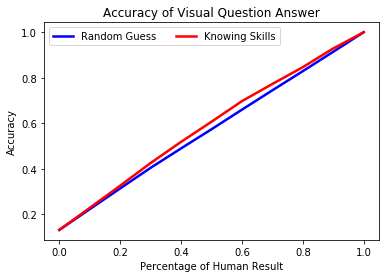

In [111]:
%matplotlib inline 
plt.xlabel('Percentage of Human Result')
plt.ylabel('Accuracy')

plt.plot(ranges,accuracies, label = "Random Guess",color="blue", linewidth=2.5, linestyle="-")  
plt.plot(ranges, accuraciesSorted, label = "Knowing Skills",color="red",  linewidth=2.5, linestyle="-")  

plt.legend(loc = 0, ncol = 2)  

plt.title('Accuracy of Visual Question Answer')

plt.show()
